# API EDA
- API Link:https://site.financialmodelingprep.com/
- API Documentation: https://site.financialmodelingprep.com/developer/docs

## Things to consider about the process carried out in this notebook!
- This EDA is the version of the original EDA without the data extraction process from a CSV, but directly all taken from the API. Something to keep in mind is that this EDA has more data from the beginning since there were no limitations when handling and saving the data provided by the entire extraction process in a CSV.

- There is another EDA that was worked with a CSV in another notebook, which is obtained at the end of the entire extraction process, so that the process of extracting more than 50,000 queries did not have to be repeated every time in that notebook was worked on. Of course, here you will find the complete extraction process as a result of a dataframe.

- The process carried out was first a query to the financialmodelng API in which we obtained a dataset with 6 fields with very general information. Therefore, we decided to complement this dataset with information from Yahoo Finance, being able to obtain high-value information with which to complement the dataset obtained from the API extraction, which was very limited. This additional process added significant value to the dataset with new fields and a lot of records.

- Let's remember that this data extraction process thanks to an API is done in order to add value to our learning that we obtained by analyzing our first dataset of tech layoffs. That's why we decided to approach information related to the financial market of companies and their sectors.


## Library Imports
- Requests: This library facilitates all the work of sending information requests to APIs, allowing us to access the information in this dataset.
- Pandas, Matplotlib, and Numpy: These libraries will help us throughout the process of analysis and deep cleaning of our data.
- Yfinance: This library helps us to access vital financial data in a simple and fast way, without having as many limitations as APIs can have for their queries.

In [1]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Initial API Extraction Process (Option for direct data extraction in this EDA)
- The code makes a query to the fields that, as a first layer, the API allows us to request without any limitation on the number of queries, thus obtaining a general list of available stocks for each company that the API has registered.

- As a second step, the code will seek to complement the dataset obtained with fields that the same API offers us but in a limited way per query. That's why we use the yfinance library as a powerful tool for financial analysts.

In [2]:
# Paso 1: Obtener la lista de acciones disponibles
api_url = "https://financialmodelingprep.com/api/v3/available-traded/list?apikey=7lZIU82kV1JVXJZP2zHFFlJLvdvsswj0"
response = requests.get(api_url)

if response.status_code == 200:
    stock_data = response.json()
    df = pd.DataFrame(stock_data)
    df = df[['symbol', 'name', 'price', 'exchange', 'exchangeShortName']]
else:
    print("Error en la solicitud:", response.status_code)
    raise Exception("No se pudo obtener los datos de la API.")

# Definir la función para obtener información financiera
def get_financial_info(symbol, index, total):
    try:
        ticker = yf.Ticker(symbol)
        info = ticker.info
        print(f"Procesando {index + 1}/{total}: {symbol}")
        return {
            'Industry': info.get('industry', 'Industria no disponible'),
            'Profit Margins': info.get('profitMargins', 'No disponible'),
            'PE Ratio': info.get('trailingPE', 'No disponible'),
            'Country': info.get('country', 'País no disponible'),
            'Full Time Employees': info.get('fullTimeEmployees', 'No disponible'),
            'City': info.get('city', 'Ciudad no disponible')
        }
    except Exception as e:
        print(f"Error al obtener la información de {symbol}: {e}")
        return {
            'Industry': 'Error',
            'Profit Margins': 'Error',
            'PE Ratio': 'Error',
            'Country': 'Error',
            'Full Time Employees': 'Error',
            'City': 'Error'
        }
    
    
# Paso 2: Obtener información financiera adicional para cada acción
info_list = []
total_symbols = len(df)
for index, symbol in enumerate(df['symbol']):
    info = get_financial_info(symbol, index, total_symbols)
    info_list.append(info)

df_info = pd.DataFrame(info_list)

# Combinar los DataFrames
df_final = pd.concat([df, df_info], axis=1)

# Mostrar el resultado
print(df_final.head())

Procesando 1/57525: NDBKY
Procesando 2/57525: NRRWF
Procesando 3/57525: 5309.KL
Procesando 4/57525: TQGEX
Procesando 5/57525: MEA.AX
Procesando 6/57525: BNP.PA
Procesando 7/57525: SLQT
Procesando 8/57525: 0298.HK
Procesando 9/57525: RAFL.BO
Procesando 10/57525: ANDE
Procesando 11/57525: KITL
Procesando 12/57525: BYOT.L
Procesando 13/57525: 001065.KS
Procesando 14/57525: JVTNX
Procesando 15/57525: VSL.NZ
Procesando 16/57525: 7076.KL
Procesando 17/57525: 0613.HK
Procesando 18/57525: 002732.SZ
Procesando 19/57525: GOVB
Procesando 20/57525: RYRIX
Procesando 21/57525: 000972.SZ
Procesando 22/57525: SWELECTES.NS
Procesando 23/57525: NGY.AX
Procesando 24/57525: SHUKJEW.BO
Procesando 25/57525: ERG.WA
Procesando 26/57525: 036530.KS
Procesando 27/57525: SSR.AX
Procesando 28/57525: ISOLF
Procesando 29/57525: 2445.KL
Procesando 30/57525: KCEA.SG
Procesando 31/57525: EOS
Procesando 32/57525: 3245.T
Procesando 33/57525: RAS.AX
Procesando 34/57525: 348370.KQ
Procesando 35/57525: MHK.AX
Procesando 36/

Procesando 280/57525: DSVSF
Procesando 281/57525: SIV.AX
Procesando 282/57525: WESNX
Procesando 283/57525: RAI.L
Procesando 284/57525: SANSERA.NS
Procesando 285/57525: GDMA
Procesando 286/57525: IQQ0.DE
Procesando 287/57525: 000050.SZ
Procesando 288/57525: FLUX
Procesando 289/57525: 600326.SS
Procesando 290/57525: SEMAC.BO
Procesando 291/57525: LHKG.DE
Procesando 292/57525: 1651.HK
Procesando 293/57525: 603005.SS
Procesando 294/57525: SBMO.AS
Procesando 295/57525: 003010.KS
Procesando 296/57525: 1351.HK
Procesando 297/57525: PNN.AX
Procesando 298/57525: EXN.PA
Procesando 299/57525: 6978.HK
Procesando 300/57525: SES.WA
Procesando 301/57525: 000156.SZ
Procesando 302/57525: EESE
Procesando 303/57525: WDC
Procesando 304/57525: 3321.T
Procesando 305/57525: UNIT
Procesando 306/57525: HTB.TO
Procesando 307/57525: LLC.AX
Procesando 308/57525: 7739.T
Procesando 309/57525: XLF
Procesando 310/57525: FLN.AX
Procesando 311/57525: FCVH.TO
Procesando 312/57525: TMG.AX
Procesando 313/57525: 377300.KS


Procesando 560/57525: UIMC.DE
Procesando 561/57525: ARSLF
Procesando 562/57525: BW
Procesando 563/57525: GOTU
Procesando 564/57525: WLN.PA
Procesando 565/57525: 000030.SZ
Procesando 566/57525: UDR
Procesando 567/57525: NECCLTD.BO
Procesando 568/57525: 603396.SS
Procesando 569/57525: 600801.SS
Procesando 570/57525: CBAV3.SA
Procesando 571/57525: PNCINFRA.NS
Procesando 572/57525: RBMNF
Procesando 573/57525: SANB11.SA
Procesando 574/57525: PES.DE
Procesando 575/57525: GRLRF
Procesando 576/57525: 2128.HK
Procesando 577/57525: KMSWF
Procesando 578/57525: 0089.HK
Procesando 579/57525: UNLYF
Procesando 580/57525: 8120.HK
Procesando 581/57525: POS.L
Procesando 582/57525: 7779.T
Procesando 583/57525: MGEE
Procesando 584/57525: FXG
Procesando 585/57525: SMTO3.SA
Procesando 586/57525: CLCGY
Procesando 587/57525: GOKUL.BO
Procesando 588/57525: 00088K.KS
Procesando 589/57525: RIGH
Procesando 590/57525: ESLA
Procesando 591/57525: 0331.HK
Procesando 592/57525: 3309.HK
Procesando 593/57525: UOVEF
Proc

Procesando 839/57525: 5148.KL
Procesando 840/57525: 300558.SZ
Procesando 841/57525: STLTECH.BO
Procesando 842/57525: TGP.AX
Procesando 843/57525: MEGASTAR.NS
Procesando 844/57525: ENZN
Procesando 845/57525: BNAIW
Procesando 846/57525: AGMJF
Procesando 847/57525: REZI
Procesando 848/57525: 008110.KS
Procesando 849/57525: AINN.DE
Procesando 850/57525: CRLA.PA
Procesando 851/57525: ALCYB.PA
Procesando 852/57525: STG
Procesando 853/57525: RICOY
Procesando 854/57525: C6L.SI
Procesando 855/57525: DISMX
Procesando 856/57525: BUR.L
Procesando 857/57525: DIM
Procesando 858/57525: PQVM.L
Procesando 859/57525: CVX
Procesando 860/57525: AIHL.BO
Procesando 861/57525: 600808.SS
Procesando 862/57525: 000655.SZ
Procesando 863/57525: BIDU
Procesando 864/57525: 1447.HK
Procesando 865/57525: ECDAW
Procesando 866/57525: 9633.T
Procesando 867/57525: 603869.SS
Procesando 868/57525: ANSALAPI.NS
Procesando 869/57525: DIS
Procesando 870/57525: 200541.SZ
Procesando 871/57525: 145A.T
Procesando 872/57525: CMRA
P

Procesando 1114/57525: VEE.DE
Procesando 1115/57525: FOVAX
Procesando 1116/57525: TROW
Procesando 1117/57525: ALIM
Procesando 1118/57525: XVIPY
Procesando 1119/57525: ORIENTELEC.BO
Procesando 1120/57525: KB
Procesando 1121/57525: 196030.KS
Procesando 1122/57525: CNGLU
Procesando 1123/57525: 8070.T
Procesando 1124/57525: 6963.T
Procesando 1125/57525: KIDS
Procesando 1126/57525: SPMV.L
Procesando 1127/57525: 5530.TWO
Procesando 1128/57525: 0929.HK
Procesando 1129/57525: EQUITASBNK.BO
Procesando 1130/57525: LGI
Procesando 1131/57525: 4539.T
Procesando 1132/57525: BIV10.CO
Procesando 1133/57525: VIPS
Procesando 1134/57525: SPCB
Procesando 1135/57525: 9034.T
Procesando 1136/57525: SURG
Procesando 1137/57525: CTSO
Procesando 1138/57525: SE.CN
Procesando 1139/57525: TBCG.L
Procesando 1140/57525: DEXSF
Procesando 1141/57525: GLDD
Procesando 1142/57525: MDRX
Procesando 1143/57525: 8241.HK
Procesando 1144/57525: ALANKIT.NS
Procesando 1145/57525: RCC
Procesando 1146/57525: KEGX
Procesando 1147/57

Procesando 1385/57525: BUCN.SW
Procesando 1386/57525: CGA
Procesando 1387/57525: D
Procesando 1388/57525: PBMWW
Procesando 1389/57525: 600875.SS
Procesando 1390/57525: CMP.AX
Procesando 1391/57525: TOVX
Procesando 1392/57525: VG0K.F
Procesando 1393/57525: ODD
Procesando 1394/57525: 605177.SS
Procesando 1395/57525: TLGAX
Procesando 1396/57525: 8225.HK
Procesando 1397/57525: DMB
Procesando 1398/57525: SAREGAMA.BO
Procesando 1399/57525: SVCTF
Procesando 1400/57525: PBIT.CN
Procesando 1401/57525: 068240.KQ
Procesando 1402/57525: ALCE
Procesando 1403/57525: 084370.KQ
Procesando 1404/57525: LEN.WA
Procesando 1405/57525: 300825.SZ
Procesando 1406/57525: UBER
Procesando 1407/57525: FZR.AX
Procesando 1408/57525: FLAU
Procesando 1409/57525: MRPLY
Procesando 1410/57525: BHVN
Procesando 1411/57525: GODREJPROP.BO
Procesando 1412/57525: 047050.KS
Procesando 1413/57525: WDFC
Procesando 1414/57525: YUM
Procesando 1415/57525: 1916.HK
Procesando 1416/57525: PERM.BK
Procesando 1417/57525: 605077.SS
Proce

Procesando 1656/57525: 1894.HK
Procesando 1657/57525: FDP
Procesando 1658/57525: PPSI
Procesando 1659/57525: 271980.KS
Procesando 1660/57525: 441270.KQ
Procesando 1661/57525: PLUG
Procesando 1662/57525: HRCR
Procesando 1663/57525: CORE.DE
Procesando 1664/57525: KRRGF
Procesando 1665/57525: UNIBAP.ST
Procesando 1666/57525: OVB.L
Procesando 1667/57525: DITTO-R.BK
Procesando 1668/57525: GREI
Procesando 1669/57525: IWGFF
Procesando 1670/57525: CNRIF
Procesando 1671/57525: 5CV.DE
Procesando 1672/57525: 214680.KQ
Procesando 1673/57525: RELINFRA.BO
Procesando 1674/57525: TCN.TO
Procesando 1675/57525: 9369.T
Procesando 1676/57525: VGLS
Procesando 1677/57525: LEKOF
Procesando 1678/57525: NSCR
Procesando 1679/57525: MASPTOP50.BO
Procesando 1680/57525: INN
Procesando 1681/57525: EQGPF
Procesando 1682/57525: ABDX.L
Procesando 1683/57525: JUEPX
Procesando 1684/57525: TMMA.MX
Procesando 1685/57525: LEAD.JK
Procesando 1686/57525: XEC.TO
Procesando 1687/57525: ECRD.MI
Procesando 1688/57525: NWSLV.AX
P

Procesando 1927/57525: 002446.SZ
Procesando 1928/57525: VER.VI
Procesando 1929/57525: 600960.SS
Procesando 1930/57525: SXS.L
Procesando 1931/57525: 0P0000KM1Z.L
Procesando 1932/57525: 8402.HK
Procesando 1933/57525: 6758.T
Procesando 1934/57525: ARTW
Procesando 1935/57525: BMRC
Procesando 1936/57525: SRMENERGY.BO
Procesando 1937/57525: 0104.HK
Procesando 1938/57525: MTRK.AS
Procesando 1939/57525: CRM.NE
Procesando 1940/57525: GL9.IR
Procesando 1941/57525: 2227.HK
Procesando 1942/57525: MEX.WA
Procesando 1943/57525: GEA.WA
Procesando 1944/57525: 002187.SZ
Procesando 1945/57525: 002871.SZ
Procesando 1946/57525: TRC
Procesando 1947/57525: 5958.T
Procesando 1948/57525: HSRT
Procesando 1949/57525: TSOI
Procesando 1950/57525: 0061.HK
Procesando 1951/57525: 003021.SZ
Procesando 1952/57525: MTU.PA
Procesando 1953/57525: DLEA.TA
Procesando 1954/57525: 2528.HK
Procesando 1955/57525: URCFF
Procesando 1956/57525: SNDVF
Procesando 1957/57525: 138A.T
Procesando 1958/57525: 3377.HK
Procesando 1959/575

Procesando 2197/57525: 605090.SS
Procesando 2198/57525: CEM.MI
Procesando 2199/57525: LIGHT.AS
Procesando 2200/57525: APOLLO.BO
Procesando 2201/57525: 002262.SZ
Procesando 2202/57525: 600530.SS
Procesando 2203/57525: LH
Procesando 2204/57525: 1930.T
Procesando 2205/57525: 003020.SZ
Procesando 2206/57525: 0809.HK
Procesando 2207/57525: MSV.TO
Procesando 2208/57525: SZLMY
Procesando 2209/57525: JQC
Procesando 2210/57525: ARRW
Procesando 2211/57525: 0533.HK
Procesando 2212/57525: PARADEEP.NS
Procesando 2213/57525: IKE.NZ
Procesando 2214/57525: BBRW
Procesando 2215/57525: YPFD.BA
Procesando 2216/57525: DVL.AX
Procesando 2217/57525: DNPCF
Procesando 2218/57525: CLA.PA
Procesando 2219/57525: TRAF.L
Procesando 2220/57525: SUPREMEENG.NS
Procesando 2221/57525: EXG
Procesando 2222/57525: PNR
Procesando 2223/57525: SMART.BK
Procesando 2224/57525: XRX
Procesando 2225/57525: ENDGF
Procesando 2226/57525: TAYS.JK
Procesando 2227/57525: SONACOMS.NS
Procesando 2228/57525: ADANIPORTS.BO
Procesando 2229/

Procesando 2465/57525: NNOX
Procesando 2466/57525: 217780.KS
Procesando 2467/57525: ADRT-UN
Procesando 2468/57525: EVGO
Procesando 2469/57525: 000803.SZ
Procesando 2470/57525: FQT.DE
Procesando 2471/57525: SVG.AX
Procesando 2472/57525: SNMRY
Procesando 2473/57525: SCKT
Procesando 2474/57525: QDVX.DE
Procesando 2475/57525: 6958.T
Procesando 2476/57525: CAPL
Procesando 2477/57525: PSHE.WA
Procesando 2478/57525: 078000.KS
Procesando 2479/57525: 082740.KS
Procesando 2480/57525: FTI.BK
Procesando 2481/57525: 600499.SS
Procesando 2482/57525: 002171.SZ
Procesando 2483/57525: BRBY.L
Procesando 2484/57525: 9511.T
Procesando 2485/57525: 000539.SZ
Procesando 2486/57525: PWCDF
Procesando 2487/57525: ZYME
Procesando 2488/57525: BBBIX
Procesando 2489/57525: IQV
Procesando 2490/57525: 0425.HK
Procesando 2491/57525: 3TSL.MI
Procesando 2492/57525: VCLN
Procesando 2493/57525: MAS
Procesando 2494/57525: 7970.T
Procesando 2495/57525: DEMCO.BK
Procesando 2496/57525: ETRN
Procesando 2497/57525: 601588.SS
Pr

Procesando 2736/57525: 001379.SZ
Procesando 2737/57525: CJPRY
Procesando 2738/57525: IOS.VI
Procesando 2739/57525: HCVIW
Procesando 2740/57525: ASAZF
Procesando 2741/57525: TMC.BK
Procesando 2742/57525: TKC
Procesando 2743/57525: 301587.SZ
Procesando 2744/57525: TVGN
Procesando 2745/57525: PSB.BO
Procesando 2746/57525: BGRIM-R.BK
Procesando 2747/57525: JUGRF
Procesando 2748/57525: 002036.SZ
Procesando 2749/57525: CDW
Procesando 2750/57525: 0991.HK
Procesando 2751/57525: VMIG.L
Procesando 2752/57525: 002524.SZ
Procesando 2753/57525: 1906.HK
Procesando 2754/57525: NUCLEUS.BO
Procesando 2755/57525: TU.BK
Procesando 2756/57525: 4547.T
Procesando 2757/57525: EQNR
Procesando 2758/57525: ESE
Procesando 2759/57525: IHG
Procesando 2760/57525: 688737.SS
Procesando 2761/57525: 0082.HK
Procesando 2762/57525: 6584.T
Procesando 2763/57525: FFIE
Procesando 2764/57525: 4973.T
Procesando 2765/57525: PARDX
Procesando 2766/57525: FPIEVO.CO
Procesando 2767/57525: IND.BK
Procesando 2768/57525: AUMN
Procesa

Procesando 3004/57525: ADY.AX
Procesando 3005/57525: 036930.KQ
Procesando 3006/57525: APHGX
Procesando 3007/57525: 5975.T
Procesando 3008/57525: HMTC
Procesando 3009/57525: 2380.SR
Procesando 3010/57525: 300085.SZ
Procesando 3011/57525: SMHI
Procesando 3012/57525: 7220.T
Procesando 3013/57525: 0QZS.L
Procesando 3014/57525: NWG
Procesando 3015/57525: 300801.SZ
Procesando 3016/57525: PSSA3.SA
Procesando 3017/57525: TKA.VI
Procesando 3018/57525: ASAL.BO
Procesando 3019/57525: 000020.SZ
Procesando 3020/57525: OPRX
Procesando 3021/57525: JFNAX
Procesando 3022/57525: DFSE
Procesando 3023/57525: 0H8T.L
Procesando 3024/57525: ODP
Procesando 3025/57525: TOEN.TA
Procesando 3026/57525: TTEC
Procesando 3027/57525: ELEZY
Procesando 3028/57525: 603348.SS
Procesando 3029/57525: SHNP.TA
Procesando 3030/57525: ENAT3.SA
Procesando 3031/57525: ETBB.PA
Procesando 3032/57525: 002398.SZ
Procesando 3033/57525: PTRUF
Procesando 3034/57525: BTPN.JK
Procesando 3035/57525: 0OPN.L
Procesando 3036/57525: ANO.AX
Pr

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HEO.TO?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HEO.TO&crumb=Fe%2FutyYQSJo


Procesando 3042/57525: HEO.TO
Procesando 3043/57525: FPILIM.CO
Procesando 3044/57525: PEHN.SW
Procesando 3045/57525: JKS
Procesando 3046/57525: TERN
Procesando 3047/57525: 300802.SZ
Procesando 3048/57525: WSO
Procesando 3049/57525: OPHC
Procesando 3050/57525: AHLUCONT.BO
Procesando 3051/57525: PSGCX
Procesando 3052/57525: 300039.SZ
Procesando 3053/57525: AOMR
Procesando 3054/57525: VVD.DE
Procesando 3055/57525: TRIP
Procesando 3056/57525: GLNLF
Procesando 3057/57525: HVO.L
Procesando 3058/57525: TRI.PA
Procesando 3059/57525: 6724.T
Procesando 3060/57525: AVDX
Procesando 3061/57525: HGTY
Procesando 3062/57525: 4548.T
Procesando 3063/57525: PH
Procesando 3064/57525: ALA.TO
Procesando 3065/57525: ARIS
Procesando 3066/57525: EGP
Procesando 3067/57525: ORBN
Procesando 3068/57525: DRMAW
Procesando 3069/57525: SLNCF
Procesando 3070/57525: KNOS
Procesando 3071/57525: BHIA3.SA
Procesando 3072/57525: USE5.MI
Procesando 3073/57525: CCET.BK
Procesando 3074/57525: 002386.SZ
Procesando 3075/57525: R

Procesando 3313/57525: RCL
Procesando 3314/57525: 2315.HK
Procesando 3315/57525: 0754.HK
Procesando 3316/57525: PEAB4.SA
Procesando 3317/57525: 0308.HK
Procesando 3318/57525: BAM
Procesando 3319/57525: 4249.T
Procesando 3320/57525: CPAY
Procesando 3321/57525: 1070.HK
Procesando 3322/57525: BEKB.BR
Procesando 3323/57525: ANSALBU.BO
Procesando 3324/57525: TRD.L
Procesando 3325/57525: 139240.KS
Procesando 3326/57525: LTFOODS.BO
Procesando 3327/57525: 300656.SZ
Procesando 3328/57525: 0363.HK
Procesando 3329/57525: 3319.HK
Procesando 3330/57525: 300065.SZ
Procesando 3331/57525: MRIN
Procesando 3332/57525: JYIOBAKKL.CO
Procesando 3333/57525: 001283.SZ
Procesando 3334/57525: CYTK
Procesando 3335/57525: HUBS
Procesando 3336/57525: ELET3.SA
Procesando 3337/57525: LYY5.DE
Procesando 3338/57525: 2327.HK
Procesando 3339/57525: DFIS
Procesando 3340/57525: 688626.SS
Procesando 3341/57525: CSBTF
Procesando 3342/57525: 1831.HK
Procesando 3343/57525: CWSRF
Procesando 3344/57525: NAVINFLUOR.BO
Procesand

Procesando 3583/57525: LGD.TO
Procesando 3584/57525: SUUIF
Procesando 3585/57525: LNSTY
Procesando 3586/57525: NATH
Procesando 3587/57525: SKYE
Procesando 3588/57525: PBX.WA
Procesando 3589/57525: DLTR
Procesando 3590/57525: NRDE
Procesando 3591/57525: XMAD.L
Procesando 3592/57525: 6611.HK
Procesando 3593/57525: QURT
Procesando 3594/57525: NBSE
Procesando 3595/57525: ELEC.PA
Procesando 3596/57525: MLNK
Procesando 3597/57525: 605388.SS
Procesando 3598/57525: THTX
Procesando 3599/57525: FLTR.L
Procesando 3600/57525: SRI
Procesando 3601/57525: BDX.WA
Procesando 3602/57525: VICR
Procesando 3603/57525: MOM100.NS
Procesando 3604/57525: 5009.TWO
Procesando 3605/57525: 4284.T
Procesando 3606/57525: MRPL.NS
Procesando 3607/57525: TES.MI
Procesando 3608/57525: SRRIX
Procesando 3609/57525: EURN.BR
Procesando 3610/57525: F1E.SI
Procesando 3611/57525: 0867.HK
Procesando 3612/57525: HZHI
Procesando 3613/57525: TEAMLEASE.NS
Procesando 3614/57525: SSGAX
Procesando 3615/57525: TRYPF
Procesando 3616/575

Procesando 3853/57525: PFIDKA.CO
Procesando 3854/57525: LIMAF
Procesando 3855/57525: 8657.HK
Procesando 3856/57525: YEXT
Procesando 3857/57525: 358570.KQ
Procesando 3858/57525: IONQ
Procesando 3859/57525: RGT.L
Procesando 3860/57525: CNLHP
Procesando 3861/57525: 002812.SZ
Procesando 3862/57525: TRTX
Procesando 3863/57525: 0EV1.L
Procesando 3864/57525: ABR
Procesando 3865/57525: 3867.KL
Procesando 3866/57525: 002455.SZ
Procesando 3867/57525: 3028.T
Procesando 3868/57525: IPG
Procesando 3869/57525: 6171.T
Procesando 3870/57525: BLUEDART.NS
Procesando 3871/57525: SKMEGGPROD.BO
Procesando 3872/57525: AIH
Procesando 3873/57525: 3540.TWO
Procesando 3874/57525: 0IH3.L
Procesando 3875/57525: 300666.SZ
Procesando 3876/57525: FCOR
Procesando 3877/57525: 0OPA.L
Procesando 3878/57525: 36B1.DE
Procesando 3879/57525: LDCVX
Procesando 3880/57525: 6451.TW
Procesando 3881/57525: GOOY
Procesando 3882/57525: ACLLF
Procesando 3883/57525: ITOS
Procesando 3884/57525: EFGSF
Procesando 3885/57525: RAT.VI
Proc

Procesando 4126/57525: ICUCW
Procesando 4127/57525: ANANDRATHI.BO
Procesando 4128/57525: ADVIKCA.BO
Procesando 4129/57525: 0861.HK
Procesando 4130/57525: CHEMBOND.NS
Procesando 4131/57525: TPVG
Procesando 4132/57525: 5TY.SI
Procesando 4133/57525: REPCOHOME.BO
Procesando 4134/57525: RNG
Procesando 4135/57525: NPV
Procesando 4136/57525: RDG.AX
Procesando 4137/57525: HONE
Procesando 4138/57525: 9757.T
Procesando 4139/57525: NWO.DE
Procesando 4140/57525: AMINTAN.BO
Procesando 4141/57525: AITRU
Procesando 4142/57525: HHH
Procesando 4143/57525: TD-PFA.TO
Procesando 4144/57525: 002057.SZ
Procesando 4145/57525: EPRT
Procesando 4146/57525: ZOM
Procesando 4147/57525: TMV.DE
Procesando 4148/57525: D7G.F
Procesando 4149/57525: 277630.KS
Procesando 4150/57525: 688112.SS
Procesando 4151/57525: 4577.T
Procesando 4152/57525: AKYA
Procesando 4153/57525: BIL
Procesando 4154/57525: 0HCK.L
Procesando 4155/57525: MAYUKH.BO
Procesando 4156/57525: 0RPZ.L
Procesando 4157/57525: HLOC
Procesando 4158/57525: ALW

Procesando 4398/57525: RPM
Procesando 4399/57525: WAC.DE
Procesando 4400/57525: BAR.BR
Procesando 4401/57525: BSL.DE
Procesando 4402/57525: UTTAMSUGAR.NS
Procesando 4403/57525: LCII
Procesando 4404/57525: TGEN
Procesando 4405/57525: 4090.SR
Procesando 4406/57525: ABMC
Procesando 4407/57525: RFK.WA
Procesando 4408/57525: AVNS
Procesando 4409/57525: FENG
Procesando 4410/57525: MMFL.NS
Procesando 4411/57525: 6138.HK
Procesando 4412/57525: HLN
Procesando 4413/57525: RMBI
Procesando 4414/57525: PXHI
Procesando 4415/57525: MOZ.AX
Procesando 4416/57525: ZBRA
Procesando 4417/57525: 688092.SS
Procesando 4418/57525: PABW.PA
Procesando 4419/57525: BJDX
Procesando 4420/57525: GOOD.JK
Procesando 4421/57525: XGN
Procesando 4422/57525: 3662.HK
Procesando 4423/57525: AVG.BO
Procesando 4424/57525: 688639.SS
Procesando 4425/57525: 300480.SZ
Procesando 4426/57525: ADRO.JK
Procesando 4427/57525: ALNSE.PA
Procesando 4428/57525: QLT.L
Procesando 4429/57525: 9627.T
Procesando 4430/57525: KRMA
Procesando 4431

Procesando 4671/57525: LIXTW
Procesando 4672/57525: FIGS
Procesando 4673/57525: 6104.T
Procesando 4674/57525: 093050.KS
Procesando 4675/57525: 2540.TW
Procesando 4676/57525: TJX
Procesando 4677/57525: FCPB
Procesando 4678/57525: 023350.KS
Procesando 4679/57525: HDIL.NS
Procesando 4680/57525: DGL.NZ
Procesando 4681/57525: CALTX.ST
Procesando 4682/57525: WAT.AX
Procesando 4683/57525: SB
Procesando 4684/57525: 3034.KL
Procesando 4685/57525: 600328.SS
Procesando 4686/57525: HEI
Procesando 4687/57525: FBND
Procesando 4688/57525: BAC-PE
Procesando 4689/57525: 009520.KQ
Procesando 4690/57525: BLUECHIPT.BO
Procesando 4691/57525: HSWYX
Procesando 4692/57525: MPBAX
Procesando 4693/57525: 603958.SS
Procesando 4694/57525: PLTH.CN
Procesando 4695/57525: L&E.BK
Procesando 4696/57525: XPO
Procesando 4697/57525: ACWU.L
Procesando 4698/57525: SHALBY.NS
Procesando 4699/57525: MDA.TO
Procesando 4700/57525: VBFC
Procesando 4701/57525: 600158.SS
Procesando 4702/57525: VSTO
Procesando 4703/57525: HSY
Proces

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/JXT.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=JXT.AX&crumb=Fe%2FutyYQSJo


Procesando 4723/57525: JXT.AX
Procesando 4724/57525: 3196.T
Procesando 4725/57525: MIDCAPIETF.BO
Procesando 4726/57525: VRDS.TA
Procesando 4727/57525: WFH
Procesando 4728/57525: LYG
Procesando 4729/57525: 603868.SS
Procesando 4730/57525: FTHCX
Procesando 4731/57525: FVRR
Procesando 4732/57525: BASE
Procesando 4733/57525: 4261.SR
Procesando 4734/57525: 603316.SS
Procesando 4735/57525: FNM.ST
Procesando 4736/57525: AIV.AX
Procesando 4737/57525: GSIW
Procesando 4738/57525: NMDC.NS
Procesando 4739/57525: MVSTW
Procesando 4740/57525: 8076.HK
Procesando 4741/57525: 5126.KL
Procesando 4742/57525: ZPAB.DE
Procesando 4743/57525: SENX.L
Procesando 4744/57525: CSAP.JK
Procesando 4745/57525: 8954.T
Procesando 4746/57525: VFS
Procesando 4747/57525: KLXE
Procesando 4748/57525: URNU.L
Procesando 4749/57525: RCN.L
Procesando 4750/57525: IBN
Procesando 4751/57525: COMBI.ST
Procesando 4752/57525: 1125.HK
Procesando 4753/57525: MSGL.HM
Procesando 4754/57525: XYL
Procesando 4755/57525: 9115.T
Procesando 4

Procesando 4994/57525: CCE.V
Procesando 4995/57525: HAPPSTMNDS.NS
Procesando 4996/57525: 0KDH.L
Procesando 4997/57525: 002675.SZ
Procesando 4998/57525: RIGL
Procesando 4999/57525: GOYALASS.BO
Procesando 5000/57525: 8361.T
Procesando 5001/57525: ITTAX
Procesando 5002/57525: PMT-PB
Procesando 5003/57525: 6753.T
Procesando 5004/57525: BKD
Procesando 5005/57525: O3P.DE
Procesando 5006/57525: EBTC
Procesando 5007/57525: 1959.HK
Procesando 5008/57525: FBP
Procesando 5009/57525: CW
Procesando 5010/57525: DUTRON.BO
Procesando 5011/57525: 3VTE.L
Procesando 5012/57525: 5236.KL
Procesando 5013/57525: PXXLF
Procesando 5014/57525: FTAI
Procesando 5015/57525: HROW
Procesando 5016/57525: 0OHK.L
Procesando 5017/57525: UTHR
Procesando 5018/57525: IJPA.L
Procesando 5019/57525: YPB.AX
Procesando 5020/57525: NBCC.BO
Procesando 5021/57525: CFWFF
Procesando 5022/57525: 5512.TWO
Procesando 5023/57525: ZTR
Procesando 5024/57525: LMB
Procesando 5025/57525: SVC
Procesando 5026/57525: IS3B.DE
Procesando 5027/575

Procesando 5266/57525: 1861.T
Procesando 5267/57525: 300630.SZ
Procesando 5268/57525: DDD
Procesando 5269/57525: MUSK.CN
Procesando 5270/57525: MDLRX
Procesando 5271/57525: ONCI
Procesando 5272/57525: DECA
Procesando 5273/57525: 0REK.L
Procesando 5274/57525: 0I0T.L
Procesando 5275/57525: WFSTF
Procesando 5276/57525: TTE.L
Procesando 5277/57525: OLPX
Procesando 5278/57525: 289220.KQ
Procesando 5279/57525: 8348.HK
Procesando 5280/57525: DOHOL.IS
Procesando 5281/57525: WPRT
Procesando 5282/57525: EWLD.PA
Procesando 5283/57525: VLID3.SA
Procesando 5284/57525: CTL.BO
Procesando 5285/57525: DELHIVERY.BO
Procesando 5286/57525: IDNT.TA
Procesando 5287/57525: STX.L
Procesando 5288/57525: 1447.T
Procesando 5289/57525: PRE
Procesando 5290/57525: 2483.TW
Procesando 5291/57525: RAMCOIND.BO
Procesando 5292/57525: CHRTEDCA.BO
Procesando 5293/57525: FHYS
Procesando 5294/57525: GHCL.NS
Procesando 5295/57525: F4DE.DE
Procesando 5296/57525: GUSH
Procesando 5297/57525: 2888.HK
Procesando 5298/57525: 00281

Procesando 5536/57525: ARRPY
Procesando 5537/57525: EVRG
Procesando 5538/57525: 0P0001OF1Z.L
Procesando 5539/57525: KFY
Procesando 5540/57525: ARBV
Procesando 5541/57525: 001260.KS
Procesando 5542/57525: SRZ.AX
Procesando 5543/57525: LOOP
Procesando 5544/57525: ALIT
Procesando 5545/57525: I50D.AS
Procesando 5546/57525: 0196.KL
Procesando 5547/57525: AASTAFIN.BO
Procesando 5548/57525: BBTC.NS
Procesando 5549/57525: 000002.SZ
Procesando 5550/57525: BRAX.CN
Procesando 5551/57525: LGEN.L
Procesando 5552/57525: ZWM.SW
Procesando 5553/57525: 2381.SR
Procesando 5554/57525: HRMY
Procesando 5555/57525: 688068.SS
Procesando 5556/57525: PNFPP
Procesando 5557/57525: COHN
Procesando 5558/57525: WPH.BK
Procesando 5559/57525: 0P00009WXM.L
Procesando 5560/57525: CBG.L
Procesando 5561/57525: UCOBANK.NS
Procesando 5562/57525: NC
Procesando 5563/57525: 9404.T
Procesando 5564/57525: SPSC
Procesando 5565/57525: 3064.T
Procesando 5566/57525: HDC.JO
Procesando 5567/57525: ENGINERSIN.BO
Procesando 5568/57525:

Procesando 5804/57525: 4022.T
Procesando 5805/57525: 600643.SS
Procesando 5806/57525: ECOB.L
Procesando 5807/57525: DXRX.L
Procesando 5808/57525: 4055.T
Procesando 5809/57525: JBHT
Procesando 5810/57525: 300647.SZ
Procesando 5811/57525: VYST
Procesando 5812/57525: IBS.WA
Procesando 5813/57525: 7093.T
Procesando 5814/57525: 002399.SZ
Procesando 5815/57525: CPJ1.L
Procesando 5816/57525: DKG.DE
Procesando 5817/57525: BIOS.BR
Procesando 5818/57525: 8037.HK
Procesando 5819/57525: ASML.AS
Procesando 5820/57525: FHZN.SW
Procesando 5821/57525: GMS.L
Procesando 5822/57525: SABS
Procesando 5823/57525: 6901.T
Procesando 5824/57525: 1222.HK
Procesando 5825/57525: SPTN
Procesando 5826/57525: FIBERWEB.BO
Procesando 5827/57525: 7705.T
Procesando 5828/57525: 9009.T
Procesando 5829/57525: APPF
Procesando 5830/57525: REGN
Procesando 5831/57525: CSGS
Procesando 5832/57525: SWP.PA
Procesando 5833/57525: 2611.HK
Procesando 5834/57525: STO3.DE
Procesando 5835/57525: AREBW
Procesando 5836/57525: 3909.T
Proce

Procesando 6074/57525: ANII.L
Procesando 6075/57525: BMBLF
Procesando 6076/57525: 7416.T
Procesando 6077/57525: 688981.SS
Procesando 6078/57525: CYN.L
Procesando 6079/57525: WIRE
Procesando 6080/57525: VNOM
Procesando 6081/57525: BGA.AX
Procesando 6082/57525: ORRCF
Procesando 6083/57525: BOY.L
Procesando 6084/57525: ERBB
Procesando 6085/57525: CYRX
Procesando 6086/57525: FTBYF
Procesando 6087/57525: 2489.HK
Procesando 6088/57525: PRM.TO
Procesando 6089/57525: JSCP
Procesando 6090/57525: 0HT4.L
Procesando 6091/57525: 084690.KS
Procesando 6092/57525: 3069.KL
Procesando 6093/57525: JTLIND.NS
Procesando 6094/57525: STX
Procesando 6095/57525: PSYCF
Procesando 6096/57525: FMHTX
Procesando 6097/57525: TIFS.L
Procesando 6098/57525: CTPE.L
Procesando 6099/57525: GOAU4.SA
Procesando 6100/57525: LGACU
Procesando 6101/57525: SANM
Procesando 6102/57525: DLO
Procesando 6103/57525: 5186.T
Procesando 6104/57525: 1137.HK
Procesando 6105/57525: 4979.T
Procesando 6106/57525: CBGZF
Procesando 6107/57525: 

Procesando 6347/57525: ZIMLAB.NS
Procesando 6348/57525: ULBI
Procesando 6349/57525: PLANET.BK
Procesando 6350/57525: EDIT
Procesando 6351/57525: HCC.NS
Procesando 6352/57525: ORLY
Procesando 6353/57525: DCMSX
Procesando 6354/57525: VGUARD.NS
Procesando 6355/57525: 077970.KS
Procesando 6356/57525: POST.VI
Procesando 6357/57525: CDNS
Procesando 6358/57525: AUQ.AX
Procesando 6359/57525: AMFG.JK
Procesando 6360/57525: PRAJIND.NS
Procesando 6361/57525: FEEXF
Procesando 6362/57525: TXN
Procesando 6363/57525: UAC.BK
Procesando 6364/57525: HYD.AX
Procesando 6365/57525: 035890.KQ
Procesando 6366/57525: CENTURYTEX.BO
Procesando 6367/57525: FFXSX
Procesando 6368/57525: RGLXY
Procesando 6369/57525: 6816.HK
Procesando 6370/57525: LMN.SW
Procesando 6371/57525: 603003.SS
Procesando 6372/57525: 6549.T
Procesando 6373/57525: DIVGIITTS.NS
Procesando 6374/57525: 7020.SR
Procesando 6375/57525: CRNX
Procesando 6376/57525: TIMKEN.BO
Procesando 6377/57525: 3501.T
Procesando 6378/57525: 8996.TW
Procesando 637

Procesando 6619/57525: CRML.TA
Procesando 6620/57525: 6505.TW
Procesando 6621/57525: 603331.SS
Procesando 6622/57525: SBIT
Procesando 6623/57525: 1538.TW
Procesando 6624/57525: YCBD-PA
Procesando 6625/57525: FILATEX.BO
Procesando 6626/57525: SCANA.OL
Procesando 6627/57525: HMVL.NS
Procesando 6628/57525: 7885.T
Procesando 6629/57525: 4342.SR
Procesando 6630/57525: BLIN
Procesando 6631/57525: TCAP.L
Procesando 6632/57525: 0467.HK
Procesando 6633/57525: FMGIX
Procesando 6634/57525: USVM
Procesando 6635/57525: KROS
Procesando 6636/57525: SCANPRO.BO
Procesando 6637/57525: BDC
Procesando 6638/57525: 3668.HK
Procesando 6639/57525: NEA
Procesando 6640/57525: SMARTLINK.BO
Procesando 6641/57525: 147970.KS
Procesando 6642/57525: 3822.HK
Procesando 6643/57525: 253840.KQ
Procesando 6644/57525: IBRX
Procesando 6645/57525: SGE.DE
Procesando 6646/57525: 8309.T
Procesando 6647/57525: PCEF
Procesando 6648/57525: GDOT
Procesando 6649/57525: 300255.SZ
Procesando 6650/57525: 5284.KL
Procesando 6651/57525: 

Procesando 6890/57525: MBLINFRA.NS
Procesando 6891/57525: PYBX
Procesando 6892/57525: FHN-PD
Procesando 6893/57525: UIM3.DE
Procesando 6894/57525: 603019.SS
Procesando 6895/57525: 002981.SZ
Procesando 6896/57525: PHOSPHATE.BO
Procesando 6897/57525: UBVSX
Procesando 6898/57525: FFOXF
Procesando 6899/57525: ROI.DE
Procesando 6900/57525: AZT.OL
Procesando 6901/57525: VIO.BR
Procesando 6902/57525: FMM-B.ST
Procesando 6903/57525: PDCO
Procesando 6904/57525: AUSI
Procesando 6905/57525: GJO
Procesando 6906/57525: 603128.SS
Procesando 6907/57525: HOCT
Procesando 6908/57525: BPOP
Procesando 6909/57525: SO
Procesando 6910/57525: GNLX
Procesando 6911/57525: ULKER.IS
Procesando 6912/57525: JCHAC.BO
Procesando 6913/57525: WDS
Procesando 6914/57525: HOWL
Procesando 6915/57525: MIDSELIETF.BO
Procesando 6916/57525: PCRX
Procesando 6917/57525: INRM.TA
Procesando 6918/57525: JPNH.DE
Procesando 6919/57525: 4762.T
Procesando 6920/57525: 0P0001BDXH.F
Procesando 6921/57525: KPT.TO
Procesando 6922/57525: NSE

Procesando 7160/57525: SURE.JK
Procesando 7161/57525: HIGJX
Procesando 7162/57525: R1B.F
Procesando 7163/57525: ATCO-PH
Procesando 7164/57525: NMRK
Procesando 7165/57525: 0353.HK
Procesando 7166/57525: GOGL.OL
Procesando 7167/57525: 5185.T
Procesando 7168/57525: ACC.NS
Procesando 7169/57525: 2291.HK
Procesando 7170/57525: DIOD
Procesando 7171/57525: BIMA.JK
Procesando 7172/57525: 0500.HK
Procesando 7173/57525: SMCI
Procesando 7174/57525: 300298.SZ
Procesando 7175/57525: KHNGF
Procesando 7176/57525: WBS
Procesando 7177/57525: SIS.BK
Procesando 7178/57525: SLIGR.AS
Procesando 7179/57525: 0040.HK
Procesando 7180/57525: GMED
Procesando 7181/57525: 064260.KQ
Procesando 7182/57525: NRL.NS
Procesando 7183/57525: LGCP
Procesando 7184/57525: 8349.T
Procesando 7185/57525: CMGIX
Procesando 7186/57525: 5292.KL
Procesando 7187/57525: TMPO.JK
Procesando 7188/57525: POS.VI
Procesando 7189/57525: DHRUV.BO
Procesando 7190/57525: BIRD.L
Procesando 7191/57525: JUBLPHARMA.BO
Procesando 7192/57525: SCHP.PA

Procesando 7431/57525: 079980.KS
Procesando 7432/57525: JTSIX
Procesando 7433/57525: GENCON.BO
Procesando 7434/57525: APTD.L
Procesando 7435/57525: FALABELLA.SN
Procesando 7436/57525: 8092.HK
Procesando 7437/57525: ALKYLAMINE.BO
Procesando 7438/57525: EME
Procesando 7439/57525: 4674.T
Procesando 7440/57525: MNSB
Procesando 7441/57525: BU.TO
Procesando 7442/57525: FDIG
Procesando 7443/57525: UVCR.JK
Procesando 7444/57525: 3042.KL
Procesando 7445/57525: VMTG
Procesando 7446/57525: 0AAW.L
Procesando 7447/57525: 168A.T
Procesando 7448/57525: OCA.AX
Procesando 7449/57525: PWON.JK
Procesando 7450/57525: ENLC
Procesando 7451/57525: IE00BMZ17W23.SG
Procesando 7452/57525: PRSCX
Procesando 7453/57525: ENTRINT.BO
Procesando 7454/57525: TRAW
Procesando 7455/57525: MDLZ
Procesando 7456/57525: CONN
Procesando 7457/57525: DRPRY
Procesando 7458/57525: GNX.AX
Procesando 7459/57525: BINERO.ST
Procesando 7460/57525: HOUS
Procesando 7461/57525: JEN.BR
Procesando 7462/57525: GDX.DE
Procesando 7463/57525: E

Procesando 7700/57525: TAK
Procesando 7701/57525: GEBRF
Procesando 7702/57525: 002401.SZ
Procesando 7703/57525: CTORX
Procesando 7704/57525: UDC.DE
Procesando 7705/57525: IOGP.L
Procesando 7706/57525: MAREL.AS
Procesando 7707/57525: AEL
Procesando 7708/57525: PAYS
Procesando 7709/57525: 2B79.DE
Procesando 7710/57525: 36B3.DE
Procesando 7711/57525: HAVI.OL
Procesando 7712/57525: FORTIS.NS
Procesando 7713/57525: BTEK
Procesando 7714/57525: VIKALPS.BO
Procesando 7715/57525: BRK-A
Procesando 7716/57525: SLYV
Procesando 7717/57525: 003007.SZ
Procesando 7718/57525: 473050.KQ
Procesando 7719/57525: VINDHYATEL.BO
Procesando 7720/57525: 603799.SS
Procesando 7721/57525: QFH.JO
Procesando 7722/57525: APEMY
Procesando 7723/57525: GAIA
Procesando 7724/57525: 600980.SS
Procesando 7725/57525: DBV.PA
Procesando 7726/57525: HLRTF
Procesando 7727/57525: E908.DE
Procesando 7728/57525: 002661.SZ
Procesando 7729/57525: GROW.L
Procesando 7730/57525: AWH
Procesando 7731/57525: 9070.T
Procesando 7732/57525: S

Procesando 7969/57525: JSWENERGY.NS
Procesando 7970/57525: ALFAICA.BO
Procesando 7971/57525: DUK
Procesando 7972/57525: 603178.SS
Procesando 7973/57525: RTC.DE
Procesando 7974/57525: BANX
Procesando 7975/57525: 601808.SS
Procesando 7976/57525: AARNAV.BO
Procesando 7977/57525: 8999.T
Procesando 7978/57525: JDT.ST
Procesando 7979/57525: FRO
Procesando 7980/57525: ETL.WA
Procesando 7981/57525: 605399.SS
Procesando 7982/57525: AETHER.NS
Procesando 7983/57525: SFE.DE
Procesando 7984/57525: CVS
Procesando 7985/57525: BGIP4.SA
Procesando 7986/57525: KULR
Procesando 7987/57525: KTHN
Procesando 7988/57525: SOUTHBANK.NS
Procesando 7989/57525: 9514.T
Procesando 7990/57525: SATIN.NS
Procesando 7991/57525: AGL.NZ
Procesando 7992/57525: 1877.HK
Procesando 7993/57525: DELTA.BO
Procesando 7994/57525: DRIO
Procesando 7995/57525: 4588.T
Procesando 7996/57525: 0LFS.L
Procesando 7997/57525: NOL.OL
Procesando 7998/57525: BUI.TO
Procesando 7999/57525: SCHN.SW
Procesando 8000/57525: SHUKRAPHAR.BO
Procesando 

Procesando 8238/57525: 5249.KL
Procesando 8239/57525: HSCL.BO
Procesando 8240/57525: 0690.HK
Procesando 8241/57525: 605289.SS
Procesando 8242/57525: WTIXMX
Procesando 8243/57525: BTTL.BO
Procesando 8244/57525: 6882.HK
Procesando 8245/57525: GIFAX
Procesando 8246/57525: 119650.KS
Procesando 8247/57525: PURVA.NS
Procesando 8248/57525: GEQZX
Procesando 8249/57525: ENQ.L
Procesando 8250/57525: 6669.TW
Procesando 8251/57525: PEAN.SW
Procesando 8252/57525: CUAN.JK
Procesando 8253/57525: 7628.T
Procesando 8254/57525: CSRNF
Procesando 8255/57525: MRPL.BO
Procesando 8256/57525: 002454.SZ
Procesando 8257/57525: HELO
Procesando 8258/57525: SUUN
Procesando 8259/57525: 1317.HK
Procesando 8260/57525: VELJAN.BO
Procesando 8261/57525: OMV.DE
Procesando 8262/57525: 0034.HK
Procesando 8263/57525: 1583.HK
Procesando 8264/57525: BCO.DE
Procesando 8265/57525: IBGS.L
Procesando 8266/57525: 600148.SS
Procesando 8267/57525: ITRI
Procesando 8268/57525: SDI.L
Procesando 8269/57525: CNZN.TA
Procesando 8270/57525

Procesando 8507/57525: VASGX
Procesando 8508/57525: MITTAL.NS
Procesando 8509/57525: SAIC
Procesando 8510/57525: RANEHOLDIN.NS
Procesando 8511/57525: HOTLSILV.BO
Procesando 8512/57525: RIRA.TO
Procesando 8513/57525: CMBM
Procesando 8514/57525: STBA
Procesando 8515/57525: MTO.L
Procesando 8516/57525: 1811.HK
Procesando 8517/57525: TAUG
Procesando 8518/57525: MGLD
Procesando 8519/57525: LGCF.L
Procesando 8520/57525: 1060.HK
Procesando 8521/57525: VEIGX
Procesando 8522/57525: WBX
Procesando 8523/57525: ELZ.MC
Procesando 8524/57525: NELCO.BO
Procesando 8525/57525: HLT
Procesando 8526/57525: 0123.HK
Procesando 8527/57525: VMUK.L
Procesando 8528/57525: FB2A.F
Procesando 8529/57525: HWDVX
Procesando 8530/57525: ADSL.BO
Procesando 8531/57525: IWDC.SW
Procesando 8532/57525: PALRX
Procesando 8533/57525: COST.NE
Procesando 8534/57525: 5019.T
Procesando 8535/57525: DTIL
Procesando 8536/57525: UVV
Procesando 8537/57525: AKER.OL
Procesando 8538/57525: ZDH.TO
Procesando 8539/57525: NVMI
Procesando 85

Procesando 8777/57525: MINT.TO
Procesando 8778/57525: WTFCP
Procesando 8779/57525: APW.AX
Procesando 8780/57525: IMEA.SW
Procesando 8781/57525: AEX.L
Procesando 8782/57525: BIIB
Procesando 8783/57525: 0RHU.L
Procesando 8784/57525: 601226.SS
Procesando 8785/57525: WPNDF
Procesando 8786/57525: KNDI
Procesando 8787/57525: ZZD.JO
Procesando 8788/57525: ICHN.AS
Procesando 8789/57525: 601326.SS
Procesando 8790/57525: RITM-PB
Procesando 8791/57525: FNCFX
Procesando 8792/57525: SEPC.NS
Procesando 8793/57525: OCUL
Procesando 8794/57525: WEIX
Procesando 8795/57525: AMSC
Procesando 8796/57525: TWCCX
Procesando 8797/57525: 600815.SS
Procesando 8798/57525: NXMR
Procesando 8799/57525: MSP.V
Procesando 8800/57525: 4280.SR
Procesando 8801/57525: INTC.NE
Procesando 8802/57525: SEBLX
Procesando 8803/57525: 300557.SZ
Procesando 8804/57525: 688136.SS
Procesando 8805/57525: RNWOX
Procesando 8806/57525: 8040.T
Procesando 8807/57525: ECC-B.ST
Procesando 8808/57525: KLDCF
Procesando 8809/57525: 064960.KS
Proc

Procesando 9046/57525: XXL.OL
Procesando 9047/57525: NEXN
Procesando 9048/57525: ARCC
Procesando 9049/57525: ZIGN.ST
Procesando 9050/57525: S61.SI
Procesando 9051/57525: PNTG
Procesando 9052/57525: KOSK
Procesando 9053/57525: PELAX
Procesando 9054/57525: 8182.T
Procesando 9055/57525: PJIZX
Procesando 9056/57525: 688007.SS
Procesando 9057/57525: 002629.SZ
Procesando 9058/57525: 0P0000SAVS.L
Procesando 9059/57525: OMEX
Procesando 9060/57525: 601921.SS
Procesando 9061/57525: 002799.SZ
Procesando 9062/57525: DAKT
Procesando 9063/57525: ARTNB
Procesando 9064/57525: 600188.SS
Procesando 9065/57525: HOLI
Procesando 9066/57525: RVCB
Procesando 9067/57525: 603871.SS
Procesando 9068/57525: 600125.SS
Procesando 9069/57525: NEOV
Procesando 9070/57525: PLUR.V
Procesando 9071/57525: 600718.SS
Procesando 9072/57525: ENDUR.OL
Procesando 9073/57525: VANTI.PA
Procesando 9074/57525: 600408.SS
Procesando 9075/57525: 688580.SS
Procesando 9076/57525: O39.SI
Procesando 9077/57525: 2329.HK
Procesando 9078/575

Procesando 9316/57525: 600566.SS
Procesando 9317/57525: UGARSUGAR.BO
Procesando 9318/57525: 2207.HK
Procesando 9319/57525: RS
Procesando 9320/57525: GTFBX
Procesando 9321/57525: 0XVU.L
Procesando 9322/57525: MACG.L
Procesando 9323/57525: AUUD
Procesando 9324/57525: ALTO.JK
Procesando 9325/57525: DE.V
Procesando 9326/57525: RRGSX
Procesando 9327/57525: NCTWX
Procesando 9328/57525: BAMPSL.BO
Procesando 9329/57525: DBPG.DE
Procesando 9330/57525: BIOX
Procesando 9331/57525: VERX
Procesando 9332/57525: 2B7D.DE
Procesando 9333/57525: FIASX
Procesando 9334/57525: 1652.HK
Procesando 9335/57525: LUPIN.BO
Procesando 9336/57525: INCY
Procesando 9337/57525: 6949.TW
Procesando 9338/57525: 603195.SS
Procesando 9339/57525: SHOO
Procesando 9340/57525: JFEN3.SA
Procesando 9341/57525: 7751.T
Procesando 9342/57525: TTRAK.IS
Procesando 9343/57525: NUVOCO.BO
Procesando 9344/57525: 300222.SZ
Procesando 9345/57525: 3159.T
Procesando 9346/57525: COF-PL
Procesando 9347/57525: AFEL.BO
Procesando 9348/57525: 3AB

Procesando 9586/57525: 603727.SS
Procesando 9587/57525: VAPO
Procesando 9588/57525: GMLA.TA
Procesando 9589/57525: 3395.T
Procesando 9590/57525: HRGG
Procesando 9591/57525: DL2P.L
Procesando 9592/57525: 1728.HK
Procesando 9593/57525: XXII
Procesando 9594/57525: ETLX.DE
Procesando 9595/57525: SPDN
Procesando 9596/57525: 0704.HK
Procesando 9597/57525: GRFS
Procesando 9598/57525: HPP
Procesando 9599/57525: TRENT.NS
Procesando 9600/57525: 603899.SS
Procesando 9601/57525: 6841.T
Procesando 9602/57525: TGI
Procesando 9603/57525: 0135.HK
Procesando 9604/57525: 600807.SS
Procesando 9605/57525: 688600.SS
Procesando 9606/57525: PANSARI.NS
Procesando 9607/57525: SSOF
Procesando 9608/57525: GPTINFRA.NS
Procesando 9609/57525: ESSARSHPNG.BO
Procesando 9610/57525: PUCZX
Procesando 9611/57525: 137A.T
Procesando 9612/57525: SUUMAYA.BO
Procesando 9613/57525: 600058.SS
Procesando 9614/57525: LGIQ
Procesando 9615/57525: BMR
Procesando 9616/57525: FCRX
Procesando 9617/57525: 600900.SS
Procesando 9618/57525

Procesando 9853/57525: KLNG
Procesando 9854/57525: RWODW
Procesando 9855/57525: UPBD
Procesando 9856/57525: 603196.SS
Procesando 9857/57525: 0234.HK
Procesando 9858/57525: HOOTX
Procesando 9859/57525: 5012.KL
Procesando 9860/57525: EMCGR
Procesando 9861/57525: HOMB
Procesando 9862/57525: FELDVR.NS
Procesando 9863/57525: KSB.DE
Procesando 9864/57525: NKL.V
Procesando 9865/57525: TUB.BR
Procesando 9866/57525: PHRX.CN
Procesando 9867/57525: 9588.SR
Procesando 9868/57525: CAE
Procesando 9869/57525: 1619.KL
Procesando 9870/57525: ELYS
Procesando 9871/57525: HINDALCO.BO
Procesando 9872/57525: 605100.SS
Procesando 9873/57525: CNS
Procesando 9874/57525: RPAD3.SA
Procesando 9875/57525: 6998.HK
Procesando 9876/57525: 600714.SS
Procesando 9877/57525: EUNT.DE
Procesando 9878/57525: VLY
Procesando 9879/57525: RVSB
Procesando 9880/57525: PATH
Procesando 9881/57525: WCC
Procesando 9882/57525: TOPS.TA
Procesando 9883/57525: SNLK.JK
Procesando 9884/57525: KAYPOWR.BO
Procesando 9885/57525: PXE
Procesand

Procesando 10120/57525: CCRN
Procesando 10121/57525: BKSW.JK
Procesando 10122/57525: KALV
Procesando 10123/57525: 300181.SZ
Procesando 10124/57525: 200505.SZ
Procesando 10125/57525: 0677.HK
Procesando 10126/57525: INA.BO
Procesando 10127/57525: 2X0.DE
Procesando 10128/57525: 8908.T
Procesando 10129/57525: 601788.SS
Procesando 10130/57525: ZIC.TO
Procesando 10131/57525: FCID.TO
Procesando 10132/57525: FORR
Procesando 10133/57525: DWAS
Procesando 10134/57525: 005965.KS
Procesando 10135/57525: FSTA.L
Procesando 10136/57525: 300067.SZ
Procesando 10137/57525: BEEM
Procesando 10138/57525: 603963.SS
Procesando 10139/57525: ARCEEIN.BO
Procesando 10140/57525: CLE.MI
Procesando 10141/57525: BE
Procesando 10142/57525: 6448.T
Procesando 10143/57525: PXSIX
Procesando 10144/57525: 9386.T
Procesando 10145/57525: NWFL
Procesando 10146/57525: ALGN
Procesando 10147/57525: THM
Procesando 10148/57525: FEDF.L
Procesando 10149/57525: 1961.KL
Procesando 10150/57525: IDL.PA
Procesando 10151/57525: KALD.IC
Pro

Procesando 10381/57525: CEG.CN
Procesando 10382/57525: KALU
Procesando 10383/57525: 688246.SS
Procesando 10384/57525: NTML.TA
Procesando 10385/57525: VLPNY
Procesando 10386/57525: FLM.CN
Procesando 10387/57525: 4530.T
Procesando 10388/57525: PTY.L
Procesando 10389/57525: PCRIX
Procesando 10390/57525: INDOAMIN.NS
Procesando 10391/57525: 3457.T
Procesando 10392/57525: OMI
Procesando 10393/57525: MTEL.JK
Procesando 10394/57525: 0JSC.L
Procesando 10395/57525: NWF.L
Procesando 10396/57525: IMOS
Procesando 10397/57525: ILDC.TA
Procesando 10398/57525: VYX
Procesando 10399/57525: SPINX
Procesando 10400/57525: AVALON.BO
Procesando 10401/57525: 002490.SZ
Procesando 10402/57525: GDIGA.CO
Procesando 10403/57525: INDIACEM.NS
Procesando 10404/57525: RBCP
Procesando 10405/57525: 461030.KQ
Procesando 10406/57525: 7588.HK
Procesando 10407/57525: 0392.HK
Procesando 10408/57525: CLGN
Procesando 10409/57525: INSE
Procesando 10410/57525: 058730.KS
Procesando 10411/57525: 034120.KS
Procesando 10412/57525: G

Procesando 10643/57525: PRISMMEDI.BO
Procesando 10644/57525: 0P0000OQRG
Procesando 10645/57525: PECOS.BO
Procesando 10646/57525: SUNDRMFAST.BO
Procesando 10647/57525: ALR.WA
Procesando 10648/57525: 300068.SZ
Procesando 10649/57525: GREENPOWER.BO
Procesando 10650/57525: ENENTO.HE
Procesando 10651/57525: XFN.TO
Procesando 10652/57525: NXN
Procesando 10653/57525: HLGN
Procesando 10654/57525: IS0Z.DE
Procesando 10655/57525: 015260.KS
Procesando 10656/57525: 1097.HK
Procesando 10657/57525: RGUS
Procesando 10658/57525: 5216.KL
Procesando 10659/57525: TSU.TO
Procesando 10660/57525: LNXSF
Procesando 10661/57525: HALFF
Procesando 10662/57525: 0320.HK
Procesando 10663/57525: AUTOIND.BO
Procesando 10664/57525: MMMM
Procesando 10665/57525: NAIL
Procesando 10666/57525: AON
Procesando 10667/57525: NBGIF
Procesando 10668/57525: 1720.HK
Procesando 10669/57525: BMO-PF.TO
Procesando 10670/57525: OCI.L
Procesando 10671/57525: MTW
Procesando 10672/57525: 1752.HK
Procesando 10673/57525: MEDICAMEQ.BO
Proces

Procesando 10901/57525: ESNT
Procesando 10902/57525: SHILPAMED.BO
Procesando 10903/57525: 9837.T
Procesando 10904/57525: TLX.DE
Procesando 10905/57525: RF-PC
Procesando 10906/57525: A2ZINFRA.NS
Procesando 10907/57525: MMWL.BO
Procesando 10908/57525: CEZYY
Procesando 10909/57525: AIO
Procesando 10910/57525: 950210.KS
Procesando 10911/57525: VNT.NZ
Procesando 10912/57525: HELE
Procesando 10913/57525: ZFCVINDIA.BO
Procesando 10914/57525: LASLY
Procesando 10915/57525: 4396.T
Procesando 10916/57525: DCBO.TO
Procesando 10917/57525: 603095.SS
Procesando 10918/57525: 8613.T
Procesando 10919/57525: CLSK
Procesando 10920/57525: GESHIP.NS
Procesando 10921/57525: ASM
Procesando 10922/57525: TIPA.L
Procesando 10923/57525: TLTW
Procesando 10924/57525: 1858.HK
Procesando 10925/57525: AL-PA
Procesando 10926/57525: 002719.SZ
Procesando 10927/57525: LCRDX
Procesando 10928/57525: ORI
Procesando 10929/57525: 5159.KL
Procesando 10930/57525: 002516.SZ
Procesando 10931/57525: U06.SI
Procesando 10932/57525: P

Procesando 11163/57525: FCRIX
Procesando 11164/57525: BEP
Procesando 11165/57525: RHIM.BO
Procesando 11166/57525: 1675.HK
Procesando 11167/57525: WNGRF
Procesando 11168/57525: TCELL.IS
Procesando 11169/57525: FCSDX
Procesando 11170/57525: ACC.OL
Procesando 11171/57525: MTD
Procesando 11172/57525: IAS
Procesando 11173/57525: MFGI
Procesando 11174/57525: 5112.KL
Procesando 11175/57525: BTCY
Procesando 11176/57525: 3529.T
Procesando 11177/57525: GLOP-PB
Procesando 11178/57525: 8194.T
Procesando 11179/57525: ENPH
Procesando 11180/57525: MAZAYA.KW
Procesando 11181/57525: XELAP
Procesando 11182/57525: ALNFL.PA
Procesando 11183/57525: PPL-PC.TO
Procesando 11184/57525: 0IC9.L
Procesando 11185/57525: 8052.T
Procesando 11186/57525: AGNCL
Procesando 11187/57525: 2546.TW
Procesando 11188/57525: HUMANSOFT.KW
Procesando 11189/57525: 603008.SS
Procesando 11190/57525: SAVE
Procesando 11191/57525: 600435.SS
Procesando 11192/57525: SIGMA.BO
Procesando 11193/57525: BUR.PA
Procesando 11194/57525: 6262.T
P

Procesando 11424/57525: VISVEN.BO
Procesando 11425/57525: UVE
Procesando 11426/57525: NAKSH.BO
Procesando 11427/57525: 601615.SS
Procesando 11428/57525: ENJSA.IS
Procesando 11429/57525: SXYAY
Procesando 11430/57525: 006220.KS
Procesando 11431/57525: MAYURFL.BO
Procesando 11432/57525: JECC.JK
Procesando 11433/57525: ANUP.BO
Procesando 11434/57525: INNOCORP.BO
Procesando 11435/57525: 0535.HK
Procesando 11436/57525: 3301.KL
Procesando 11437/57525: WISE.L
Procesando 11438/57525: IIDDY
Procesando 11439/57525: 3295.T
Procesando 11440/57525: CGRE.TO
Procesando 11441/57525: 600956.SS
Procesando 11442/57525: 0IVR.L
Procesando 11443/57525: SOLB.BR
Procesando 11444/57525: AC.PA
Procesando 11445/57525: JVA
Procesando 11446/57525: 005500.KS
Procesando 11447/57525: KARRX
Procesando 11448/57525: CARM.PA
Procesando 11449/57525: 5992.T
Procesando 11450/57525: 1499.HK
Procesando 11451/57525: PTC.NS
Procesando 11452/57525: ALPL30IETF.BO
Procesando 11453/57525: IBIG
Procesando 11454/57525: 006280.KS
Proce

Procesando 11685/57525: PHUN
Procesando 11686/57525: 690D.DE
Procesando 11687/57525: DLPN
Procesando 11688/57525: 2120.HK
Procesando 11689/57525: PARKX
Procesando 11690/57525: SUPREMEIND.BO
Procesando 11691/57525: 0563.HK
Procesando 11692/57525: Z59.SI
Procesando 11693/57525: TRH1V.HE
Procesando 11694/57525: SRU-UN.TO
Procesando 11695/57525: 7035.T
Procesando 11696/57525: IMMR
Procesando 11697/57525: HKIT
Procesando 11698/57525: FASTAT.ST
Procesando 11699/57525: DOPIX
Procesando 11700/57525: 0008.KL
Procesando 11701/57525: EVMT
Procesando 11702/57525: SOLARA.NS
Procesando 11703/57525: 323990.KQ
Procesando 11704/57525: LQWD.V
Procesando 11705/57525: SAL.L
Procesando 11706/57525: 2777.HK
Procesando 11707/57525: MDPR.TA
Procesando 11708/57525: LYY8.DE
Procesando 11709/57525: HSEF.L
Procesando 11710/57525: KVACW
Procesando 11711/57525: 300637.SZ
Procesando 11712/57525: JIRE
Procesando 11713/57525: ICL
Procesando 11714/57525: TORNTPOWER.NS
Procesando 11715/57525: GENESYS.NS
Procesando 11716

Procesando 11946/57525: METR.L
Procesando 11947/57525: CUAEF
Procesando 11948/57525: 298040.KS
Procesando 11949/57525: WOWS.JK
Procesando 11950/57525: ELEEF
Procesando 11951/57525: RBLX
Procesando 11952/57525: LGFRY
Procesando 11953/57525: EMGYX
Procesando 11954/57525: PIIND.NS
Procesando 11955/57525: BIRLACABLE.BO
Procesando 11956/57525: 090370.KS
Procesando 11957/57525: AU.V
Procesando 11958/57525: 1464.TW
Procesando 11959/57525: 348210.KQ
Procesando 11960/57525: 8793.T
Procesando 11961/57525: 123890.KS
Procesando 11962/57525: VMS.AX
Procesando 11963/57525: RAMGOPOLY.BO
Procesando 11964/57525: 600990.SS
Procesando 11965/57525: XPRTX
Procesando 11966/57525: ABA.F
Procesando 11967/57525: 300978.SZ
Procesando 11968/57525: 227840.KS
Procesando 11969/57525: HILS.L
Procesando 11970/57525: 030530.KQ
Procesando 11971/57525: ARYD
Procesando 11972/57525: 005430.KS
Procesando 11973/57525: GEHC
Procesando 11974/57525: HINDCOMPOS.BO
Procesando 11975/57525: 004415.KS
Procesando 11976/57525: VAISHA

Procesando 12205/57525: 7237.KL
Procesando 12206/57525: 688256.SS
Procesando 12207/57525: 2836.HK
Procesando 12208/57525: 6226.TW
Procesando 12209/57525: MVEC.SW
Procesando 12210/57525: 003550.KS
Procesando 12211/57525: RNPGX
Procesando 12212/57525: WCP.TO
Procesando 12213/57525: PDGR3.SA
Procesando 12214/57525: MELSTAR.BO
Procesando 12215/57525: 084990.KQ
Procesando 12216/57525: LVE.AX
Procesando 12217/57525: 3480.T
Procesando 12218/57525: IRIS.BO
Procesando 12219/57525: JRVR
Procesando 12220/57525: KSL.BO
Procesando 12221/57525: LQDE.L
Procesando 12222/57525: SOMA.V
Procesando 12223/57525: 047040.KS
Procesando 12224/57525: RN70.F
Procesando 12225/57525: 8156.HK
Procesando 12226/57525: CDM1.DE
Procesando 12227/57525: GMT.WA
Procesando 12228/57525: LNK.AX
Procesando 12229/57525: 096775.KS
Procesando 12230/57525: IDTC.SW
Procesando 12231/57525: COIN.V
Procesando 12232/57525: ALCLS.PA
Procesando 12233/57525: GLQ
Procesando 12234/57525: ENRO.ST
Procesando 12235/57525: 2354.TW
Procesando 1

Procesando 12465/57525: 2688.HK
Procesando 12466/57525: NDINASTKL1.CO
Procesando 12467/57525: 002340.SZ
Procesando 12468/57525: 138490.KS
Procesando 12469/57525: INRLF
Procesando 12470/57525: 300471.SZ
Procesando 12471/57525: MEDIF
Procesando 12472/57525: PSFD
Procesando 12473/57525: 4368.T
Procesando 12474/57525: PTAL.L
Procesando 12475/57525: WCIG
Procesando 12476/57525: GV
Procesando 12477/57525: SSM.AX
Procesando 12478/57525: CU2U.L
Procesando 12479/57525: TCIIND.BO
Procesando 12480/57525: 688601.SS
Procesando 12481/57525: NTWK
Procesando 12482/57525: 6199.HK
Procesando 12483/57525: BBRYF
Procesando 12484/57525: 007570.KS
Procesando 12485/57525: PHIL.MI
Procesando 12486/57525: TRIDENT.BO
Procesando 12487/57525: 008260.KS
Procesando 12488/57525: 0YB1.L
Procesando 12489/57525: 263750.KQ
Procesando 12490/57525: 214330.KS
Procesando 12491/57525: 008040.KS
Procesando 12492/57525: NVS.JO
Procesando 12493/57525: UEC.BK
Procesando 12494/57525: VIMTALABS.NS
Procesando 12495/57525: PECN.VI
P

Procesando 12724/57525: MFSINTRCRP.BO
Procesando 12725/57525: RUS.TO
Procesando 12726/57525: DAN.V
Procesando 12727/57525: SCCO.JK
Procesando 12728/57525: INTS
Procesando 12729/57525: INGN
Procesando 12730/57525: 0LI9.L
Procesando 12731/57525: 066570.KS
Procesando 12732/57525: EUO
Procesando 12733/57525: RBGLY
Procesando 12734/57525: 003580.KS
Procesando 12735/57525: 281820.KS
Procesando 12736/57525: 5184.KL
Procesando 12737/57525: IHAK
Procesando 12738/57525: BPO-PI.TO
Procesando 12739/57525: HTA.TO
Procesando 12740/57525: 241560.KS
Procesando 12741/57525: BELFA
Procesando 12742/57525: BGT
Procesando 12743/57525: 007390.KQ
Procesando 12744/57525: AEI
Procesando 12745/57525: GLOF
Procesando 12746/57525: PRAY.JK
Procesando 12747/57525: SDXEF
Procesando 12748/57525: IUSA.L
Procesando 12749/57525: SIX3.BE
Procesando 12750/57525: 170900.KS
Procesando 12751/57525: HPG.AX
Procesando 12752/57525: 037460.KQ
Procesando 12753/57525: XCS4.L
Procesando 12754/57525: 006260.KS
Procesando 12755/57525

Procesando 12983/57525: 1488.HK
Procesando 12984/57525: OMH
Procesando 12985/57525: 6873.TW
Procesando 12986/57525: TSYHY
Procesando 12987/57525: 002040.SZ
Procesando 12988/57525: DFY.TO
Procesando 12989/57525: 4743.TWO
Procesando 12990/57525: TLS
Procesando 12991/57525: 0HW0.L
Procesando 12992/57525: SREMF
Procesando 12993/57525: NDGL.NS
Procesando 12994/57525: 000983.SZ
Procesando 12995/57525: 7427.T
Procesando 12996/57525: 600517.SS
Procesando 12997/57525: 300837.SZ
Procesando 12998/57525: DGR.DE
Procesando 12999/57525: ATCOL
Procesando 13000/57525: CGGO
Procesando 13001/57525: PBB.DE
Procesando 13002/57525: ALISP.PA
Procesando 13003/57525: PSA-PS
Procesando 13004/57525: JAYKAY.BO
Procesando 13005/57525: 0VQA.L
Procesando 13006/57525: URBN.JK
Procesando 13007/57525: MEC.AX
Procesando 13008/57525: RVPHW
Procesando 13009/57525: FTPM
Procesando 13010/57525: 300283.SZ
Procesando 13011/57525: CHLL.L
Procesando 13012/57525: SKYX
Procesando 13013/57525: FBCV
Procesando 13014/57525: FULO
Pr

Procesando 13244/57525: 0JUZ.L
Procesando 13245/57525: 300173.SZ
Procesando 13246/57525: PGINX
Procesando 13247/57525: 2449.TW
Procesando 13248/57525: AQN
Procesando 13249/57525: IG
Procesando 13250/57525: 5482.T
Procesando 13251/57525: SHTCX
Procesando 13252/57525: 7480.T
Procesando 13253/57525: REVBW
Procesando 13254/57525: TIXT
Procesando 13255/57525: UIS
Procesando 13256/57525: CVGW
Procesando 13257/57525: ALVIV.PA
Procesando 13258/57525: HAA1.F
Procesando 13259/57525: BBL-R.BK
Procesando 13260/57525: 7702.T
Procesando 13261/57525: 3580.T
Procesando 13262/57525: TAC
Procesando 13263/57525: ITSA3.SA
Procesando 13264/57525: ULC.DE
Procesando 13265/57525: AZO
Procesando 13266/57525: KALA
Procesando 13267/57525: MSSV
Procesando 13268/57525: IRAA
Procesando 13269/57525: CRSR
Procesando 13270/57525: JREG.L
Procesando 13271/57525: MG.TO
Procesando 13272/57525: PPIE
Procesando 13273/57525: SKFRY
Procesando 13274/57525: 3712.TW
Procesando 13275/57525: WMMAX
Procesando 13276/57525: 8153.T
Pr

Procesando 13508/57525: 7420.T
Procesando 13509/57525: ABDP.L
Procesando 13510/57525: 1959.T
Procesando 13511/57525: DXB.AX
Procesando 13512/57525: TT
Procesando 13513/57525: 600582.SS
Procesando 13514/57525: MMAX.CN
Procesando 13515/57525: 2269.T
Procesando 13516/57525: XYP1.DE
Procesando 13517/57525: 007070.KS
Procesando 13518/57525: ASEP.CN
Procesando 13519/57525: PLDGP
Procesando 13520/57525: 2891.TW
Procesando 13521/57525: REAI
Procesando 13522/57525: FEMI.L
Procesando 13523/57525: VISHWARAJ.NS
Procesando 13524/57525: ELO.TO
Procesando 13525/57525: 688036.SS
Procesando 13526/57525: GWOX
Procesando 13527/57525: 000075.KS
Procesando 13528/57525: 4829.T
Procesando 13529/57525: ACBA
Procesando 13530/57525: 3086.T
Procesando 13531/57525: WTI2.DE
Procesando 13532/57525: UEPEP
Procesando 13533/57525: AMKR
Procesando 13534/57525: BRDCF
Procesando 13535/57525: 6586.T
Procesando 13536/57525: 0379.HK
Procesando 13537/57525: 4432.T
Procesando 13538/57525: TNLIY
Procesando 13539/57525: 2492.T


Procesando 13769/57525: 9735.T
Procesando 13770/57525: JPEX
Procesando 13771/57525: NTOIY
Procesando 13772/57525: LCJG.L
Procesando 13773/57525: RENUKA.BO
Procesando 13774/57525: TUO.V
Procesando 13775/57525: SHARDACROP.NS
Procesando 13776/57525: 4521.T
Procesando 13777/57525: CSQ
Procesando 13778/57525: USG
Procesando 13779/57525: AROGRANITE.BO
Procesando 13780/57525: PACOX
Procesando 13781/57525: INTR
Procesando 13782/57525: ECDP
Procesando 13783/57525: 6274.TWO
Procesando 13784/57525: BPSO.MI
Procesando 13785/57525: 3669.TW
Procesando 13786/57525: XVIPF
Procesando 13787/57525: MOLT.CN
Procesando 13788/57525: 5607.TW
Procesando 13789/57525: PBTHF
Procesando 13790/57525: JRAIX
Procesando 13791/57525: 086900.KQ
Procesando 13792/57525: 4578.T
Procesando 13793/57525: PKIUF
Procesando 13794/57525: RAAJMEDI.BO
Procesando 13795/57525: EWIND.OL
Procesando 13796/57525: TSL2.L
Procesando 13797/57525: 277810.KQ
Procesando 13798/57525: 0224.HK
Procesando 13799/57525: THG.L
Procesando 13800/57525

Procesando 14030/57525: 000596.SZ
Procesando 14031/57525: 2487.T
Procesando 14032/57525: LEHLQ
Procesando 14033/57525: 603912.SS
Procesando 14034/57525: 688622.SS
Procesando 14035/57525: 4026.T
Procesando 14036/57525: MPTI
Procesando 14037/57525: 603897.SS
Procesando 14038/57525: 2846.HK
Procesando 14039/57525: 2270.T
Procesando 14040/57525: LEDIBOND.CO
Procesando 14041/57525: DSNY
Procesando 14042/57525: 6118.HK
Procesando 14043/57525: QHAL.AX
Procesando 14044/57525: EWJ
Procesando 14045/57525: 6821.HK
Procesando 14046/57525: HEXA.JK
Procesando 14047/57525: COFB.BR
Procesando 14048/57525: AVW.AX
Procesando 14049/57525: LSCC
Procesando 14050/57525: AAUKF
Procesando 14051/57525: 4816.T
Procesando 14052/57525: TTCL.BK
Procesando 14053/57525: 6666.HK
Procesando 14054/57525: 3053.T
Procesando 14055/57525: 300857.SZ
Procesando 14056/57525: ERIC
Procesando 14057/57525: ISSP.JK
Procesando 14058/57525: 004840.KS
Procesando 14059/57525: PRFD.L
Procesando 14060/57525: CSCO.NE
Procesando 14061/57

Procesando 14293/57525: 9075.T
Procesando 14294/57525: RPIEX
Procesando 14295/57525: 011810.KS
Procesando 14296/57525: WP.BK
Procesando 14297/57525: TYFG
Procesando 14298/57525: SAZ
Procesando 14299/57525: 600035.SS
Procesando 14300/57525: FQT.VI
Procesando 14301/57525: MARK
Procesando 14302/57525: VYGVQ
Procesando 14303/57525: RYVPX
Procesando 14304/57525: 6964.T
Procesando 14305/57525: 6393.T
Procesando 14306/57525: MANINFRA.BO
Procesando 14307/57525: PBX.V
Procesando 14308/57525: 1265.HK
Procesando 14309/57525: ITDC.NS
Procesando 14310/57525: 7035.KL
Procesando 14311/57525: 6206.TW
Procesando 14312/57525: SCFFX
Procesando 14313/57525: ASCGX
Procesando 14314/57525: CDZI
Procesando 14315/57525: FDVA
Procesando 14316/57525: KTEL
Procesando 14317/57525: CALT
Procesando 14318/57525: FGB
Procesando 14319/57525: WSBCP
Procesando 14320/57525: 000544.SZ
Procesando 14321/57525: MXE
Procesando 14322/57525: XMOV.SW
Procesando 14323/57525: AURX
Procesando 14324/57525: IFFF.SW
Procesando 14325/57

Procesando 14555/57525: 006805.KS
Procesando 14556/57525: KIGRY
Procesando 14557/57525: BIRG.L
Procesando 14558/57525: NBRFX
Procesando 14559/57525: 3316.HK
Procesando 14560/57525: 1578.HK
Procesando 14561/57525: AVADHSUGAR.NS
Procesando 14562/57525: 0QLQ.L
Procesando 14563/57525: AEZS
Procesando 14564/57525: GGG.V
Procesando 14565/57525: 300772.SZ
Procesando 14566/57525: IGOT
Procesando 14567/57525: MARVF
Procesando 14568/57525: NEXCF
Procesando 14569/57525: 3663.T
Procesando 14570/57525: SUN.SW
Procesando 14571/57525: PHASQ
Procesando 14572/57525: LRCX.BA
Procesando 14573/57525: 4203.T
Procesando 14574/57525: DATAMATICS.NS
Procesando 14575/57525: 7213.T
Procesando 14576/57525: BNZIW
Procesando 14577/57525: 5471.T
Procesando 14578/57525: CRZBY
Procesando 14579/57525: DRIV
Procesando 14580/57525: 9968.HK
Procesando 14581/57525: BCEL
Procesando 14582/57525: 003680.KS
Procesando 14583/57525: SXRG.DE
Procesando 14584/57525: 3LSQ.L
Procesando 14585/57525: 5976.T
Procesando 14586/57525: 600

Procesando 14819/57525: 3702.TW
Procesando 14820/57525: TCOM
Procesando 14821/57525: TTKOM.IS
Procesando 14822/57525: 3673.TW
Procesando 14823/57525: EADSY
Procesando 14824/57525: 1519.TW
Procesando 14825/57525: SNBH
Procesando 14826/57525: BRNL.NS
Procesando 14827/57525: GGRM.JK
Procesando 14828/57525: KNW
Procesando 14829/57525: WELN.DE
Procesando 14830/57525: HAIO80AKK.CO
Procesando 14831/57525: LVH.AX
Procesando 14832/57525: 6871.T
Procesando 14833/57525: NOTE.ST
Procesando 14834/57525: 6986.T
Procesando 14835/57525: RFEM
Procesando 14836/57525: NWTT
Procesando 14837/57525: 9273.T
Procesando 14838/57525: WMA.CO
Procesando 14839/57525: AJL.AX
Procesando 14840/57525: 7832.T
Procesando 14841/57525: UPM.HE
Procesando 14842/57525: GEECF
Procesando 14843/57525: MEFCOMCAP.BO
Procesando 14844/57525: XDG6.MI
Procesando 14845/57525: 228760.KQ
Procesando 14846/57525: SUPRIYA.BO
Procesando 14847/57525: SMDR.JK
Procesando 14848/57525: EDSRI.MI
Procesando 14849/57525: DLHC
Procesando 14850/57525

Procesando 15080/57525: ZUARIIND.NS
Procesando 15081/57525: SUNPHARMA.NS
Procesando 15082/57525: 2209.T
Procesando 15083/57525: MOUR.BR
Procesando 15084/57525: HEAD.L
Procesando 15085/57525: 002372.SZ
Procesando 15086/57525: 6186.HK
Procesando 15087/57525: HAVISHA.BO
Procesando 15088/57525: VENUSPIPES.BO
Procesando 15089/57525: GWO-PI.TO
Procesando 15090/57525: RAJGASES.BO
Procesando 15091/57525: CPXGF
Procesando 15092/57525: H2O.F
Procesando 15093/57525: 1435.T
Procesando 15094/57525: AGR
Procesando 15095/57525: 254490.KQ
Procesando 15096/57525: 2918.T
Procesando 15097/57525: SRMCL.BO
Procesando 15098/57525: 000776.SZ
Procesando 15099/57525: SERI.MI
Procesando 15100/57525: 9414.T
Procesando 15101/57525: LCPE.L
Procesando 15102/57525: ASAN
Procesando 15103/57525: KONYA.IS
Procesando 15104/57525: ITUB
Procesando 15105/57525: CCOEY
Procesando 15106/57525: DH2O.L
Procesando 15107/57525: INET.BK
Procesando 15108/57525: PEP.BA
Procesando 15109/57525: 0769.HK
Procesando 15110/57525: NUTX
Pro

Procesando 15340/57525: PHIO
Procesando 15341/57525: BRCHF
Procesando 15342/57525: 688596.SS
Procesando 15343/57525: ARZZ3.SA
Procesando 15344/57525: MDRNF
Procesando 15345/57525: BOXE.L
Procesando 15346/57525: HFY.AX
Procesando 15347/57525: 300839.SZ
Procesando 15348/57525: KOTMY
Procesando 15349/57525: 7037.T
Procesando 15350/57525: 0QYR.L
Procesando 15351/57525: FEPI
Procesando 15352/57525: HLMIX
Procesando 15353/57525: 4972.T
Procesando 15354/57525: CSSEP
Procesando 15355/57525: SHTDY
Procesando 15356/57525: UNTC
Procesando 15357/57525: AISPW
Procesando 15358/57525: 3105.TWO
Procesando 15359/57525: NS-PC
Procesando 15360/57525: FOJCY
Procesando 15361/57525: JEPG.L
Procesando 15362/57525: 5384.T
Procesando 15363/57525: 6961.T
Procesando 15364/57525: XDTE
Procesando 15365/57525: 8237.T
Procesando 15366/57525: 000153.SZ
Procesando 15367/57525: 5803.T
Procesando 15368/57525: VICI
Procesando 15369/57525: 82318.HK
Procesando 15370/57525: EIDPARRY.BO
Procesando 15371/57525: 605005.SS
Proc

Procesando 15603/57525: HZD.TO
Procesando 15604/57525: SPI
Procesando 15605/57525: 8416.HK
Procesando 15606/57525: SMAYX
Procesando 15607/57525: IIIN
Procesando 15608/57525: GWRE
Procesando 15609/57525: ARMP
Procesando 15610/57525: 0A0H.IL
Procesando 15611/57525: 0131.HK
Procesando 15612/57525: IFHI
Procesando 15613/57525: 2333.HK
Procesando 15614/57525: INDIACEM.BO
Procesando 15615/57525: 3968.T
Procesando 15616/57525: XP
Procesando 15617/57525: WABAG.NS
Procesando 15618/57525: SCIE
Procesando 15619/57525: YZCAY
Procesando 15620/57525: BTBIF
Procesando 15621/57525: RLF.SW
Procesando 15622/57525: 8093.T
Procesando 15623/57525: BITTF
Procesando 15624/57525: RXT
Procesando 15625/57525: BBB.V
Procesando 15626/57525: CEE
Procesando 15627/57525: SFR.L
Procesando 15628/57525: SOTGY
Procesando 15629/57525: LIDRW
Procesando 15630/57525: 4832.T
Procesando 15631/57525: GVCAX
Procesando 15632/57525: DRX.L
Procesando 15633/57525: EKAMLEA.BO
Procesando 15634/57525: NB2.F
Procesando 15635/57525: FTH

Procesando 15866/57525: PTAIY
Procesando 15867/57525: C38U.SI
Procesando 15868/57525: NBST
Procesando 15869/57525: ALC.TO
Procesando 15870/57525: SURGW
Procesando 15871/57525: SLNH
Procesando 15872/57525: 9535.T
Procesando 15873/57525: ATH.TO
Procesando 15874/57525: EGFIX
Procesando 15875/57525: 3728.HK
Procesando 15876/57525: RIDGX
Procesando 15877/57525: 018670.KS
Procesando 15878/57525: 3866.HK
Procesando 15879/57525: 0432.HK
Procesando 15880/57525: 3660.T
Procesando 15881/57525: XDEM.L
Procesando 15882/57525: ALIDS.PA
Procesando 15883/57525: FAN.L
Procesando 15884/57525: COD.AX
Procesando 15885/57525: ACR.F
Procesando 15886/57525: RBHEX
Procesando 15887/57525: IVOG
Procesando 15888/57525: MHGVY
Procesando 15889/57525: MMSMY
Procesando 15890/57525: 0230.KL
Procesando 15891/57525: 3USL.MI
Procesando 15892/57525: IONKF
Procesando 15893/57525: 6141.TW
Procesando 15894/57525: EP1.AX
Procesando 15895/57525: AYI
Procesando 15896/57525: DTLE.L
Procesando 15897/57525: VIJAYA.NS
Procesando 1

Procesando 16132/57525: EPY.AX
Procesando 16133/57525: EQQD.L
Procesando 16134/57525: GJNSY
Procesando 16135/57525: MTSFY
Procesando 16136/57525: BOOT
Procesando 16137/57525: FR.TO
Procesando 16138/57525: 5940.T
Procesando 16139/57525: TIJARIA.BO
Procesando 16140/57525: 3636.T
Procesando 16141/57525: ALICON.BO
Procesando 16142/57525: BTLCY
Procesando 16143/57525: LFIC.NS
Procesando 16144/57525: 243880.KS
Procesando 16145/57525: GRW.IR
Procesando 16146/57525: IBTK
Procesando 16147/57525: ITAN
Procesando 16148/57525: ISOFOL.ST
Procesando 16149/57525: SBSAA
Procesando 16150/57525: CNR.L
Procesando 16151/57525: AF.PA
Procesando 16152/57525: BRKR
Procesando 16153/57525: 0493.HK
Procesando 16154/57525: PFC.L
Procesando 16155/57525: 8147.T
Procesando 16156/57525: SYNSAM.ST
Procesando 16157/57525: 1211.HK
Procesando 16158/57525: 5921.T
Procesando 16159/57525: 1964.T
Procesando 16160/57525: 688107.SS
Procesando 16161/57525: IWFV.L
Procesando 16162/57525: LU1834985845.SG
Procesando 16163/57525: 

Procesando 16394/57525: HBP.TO
Procesando 16395/57525: WMPN
Procesando 16396/57525: SBIU.L
Procesando 16397/57525: CAGS.TO
Procesando 16398/57525: DLN
Procesando 16399/57525: HIX
Procesando 16400/57525: RVVTF
Procesando 16401/57525: ALBBY
Procesando 16402/57525: TRIL.NS
Procesando 16403/57525: 9550.SR
Procesando 16404/57525: IDYA
Procesando 16405/57525: 002258.SZ
Procesando 16406/57525: 6194.T
Procesando 16407/57525: AEGXF
Procesando 16408/57525: EBGEF
Procesando 16409/57525: 9788.T
Procesando 16410/57525: PLUS.AX
Procesando 16411/57525: APLI.TO
Procesando 16412/57525: ERF
Procesando 16413/57525: SNCAF
Procesando 16414/57525: EMAMIREAL.NS
Procesando 16415/57525: 4HW.F
Procesando 16416/57525: IBDSF
Procesando 16417/57525: REVG
Procesando 16418/57525: EWBC
Procesando 16419/57525: BACPHAR.BO
Procesando 16420/57525: 214450.KQ
Procesando 16421/57525: CDNAF
Procesando 16422/57525: 1612.TW
Procesando 16423/57525: 688019.SS
Procesando 16424/57525: XDEW.DE
Procesando 16425/57525: PEN.L
Procesan

Procesando 16656/57525: REP.DE
Procesando 16657/57525: 2399.HK
Procesando 16658/57525: FIRUX
Procesando 16659/57525: 7914.T
Procesando 16660/57525: NETTF
Procesando 16661/57525: MITEF
Procesando 16662/57525: GLTL.TA
Procesando 16663/57525: HTG.L
Procesando 16664/57525: DODLA.BO
Procesando 16665/57525: U1DA.F
Procesando 16666/57525: MAAL
Procesando 16667/57525: SSMXF
Procesando 16668/57525: 1982.HK
Procesando 16669/57525: 002942.SZ
Procesando 16670/57525: 6810.T
Procesando 16671/57525: FBRT.L
Procesando 16672/57525: IMBBF
Procesando 16673/57525: 4450.T
Procesando 16674/57525: NBI.MC
Procesando 16675/57525: HPQ.V
Procesando 16676/57525: NETLINK.BO
Procesando 16677/57525: ORBIA.MX
Procesando 16678/57525: LPA.L
Procesando 16679/57525: CBOBA
Procesando 16680/57525: CMR.BK
Procesando 16681/57525: CE
Procesando 16682/57525: IE00BP2C1V62.SG
Procesando 16683/57525: PAB.AX
Procesando 16684/57525: IMTX
Procesando 16685/57525: AROGRANITE.NS
Procesando 16686/57525: DSKYF
Procesando 16687/57525: SCH

Procesando 16919/57525: 6556.T
Procesando 16920/57525: NVR
Procesando 16921/57525: NREN.SW
Procesando 16922/57525: FCIC
Procesando 16923/57525: PRTC.L
Procesando 16924/57525: 1402.TW
Procesando 16925/57525: ALLE
Procesando 16926/57525: IFIN
Procesando 16927/57525: 600192.SS
Procesando 16928/57525: GOVH.PA
Procesando 16929/57525: RAYMOND.NS
Procesando 16930/57525: 7987.T
Procesando 16931/57525: 002093.SZ
Procesando 16932/57525: 6748.T
Procesando 16933/57525: NATHBIOGEN.NS
Procesando 16934/57525: 9621.T
Procesando 16935/57525: SBGI
Procesando 16936/57525: 2337.T
Procesando 16937/57525: 7774.T
Procesando 16938/57525: VADILALIND.NS
Procesando 16939/57525: 4295.T
Procesando 16940/57525: SRH.AX
Procesando 16941/57525: CKHUF
Procesando 16942/57525: 600133.SS
Procesando 16943/57525: INOD
Procesando 16944/57525: SBFG
Procesando 16945/57525: PRM.BK
Procesando 16946/57525: JSPR
Procesando 16947/57525: NRSNW
Procesando 16948/57525: 0265.KL
Procesando 16949/57525: 7204.SR
Procesando 16950/57525: SA

Procesando 17180/57525: 7172.T
Procesando 17181/57525: SIA.TO
Procesando 17182/57525: STNG
Procesando 17183/57525: 0596.HK
Procesando 17184/57525: COTN.L
Procesando 17185/57525: GCLX.L
Procesando 17186/57525: SOBHA.NS
Procesando 17187/57525: 300936.SZ
Procesando 17188/57525: UBR3.L
Procesando 17189/57525: 7013.T
Procesando 17190/57525: BUI.BK
Procesando 17191/57525: 0369.HK
Procesando 17192/57525: 7266.T
Procesando 17193/57525: 5076.T
Procesando 17194/57525: NRSH
Procesando 17195/57525: SARLAPOLY.NS
Procesando 17196/57525: ADAP
Procesando 17197/57525: LAND
Procesando 17198/57525: PGHH.NS
Procesando 17199/57525: PCFBY
Procesando 17200/57525: S
Procesando 17201/57525: 7912.T
Procesando 17202/57525: CMG
Procesando 17203/57525: 3LMO.PA
Procesando 17204/57525: IINNW
Procesando 17205/57525: 8169.HK
Procesando 17206/57525: 0K3B.L
Procesando 17207/57525: 8250.SR
Procesando 17208/57525: MNDO
Procesando 17209/57525: LMT.MX
Procesando 17210/57525: SOLARINDS.NS
Procesando 17211/57525: LTH
Procesan

Procesando 17441/57525: ITIETF.BO
Procesando 17442/57525: MCON.L
Procesando 17443/57525: MCP.LS
Procesando 17444/57525: IUKP.L
Procesando 17445/57525: OPOF
Procesando 17446/57525: AFG
Procesando 17447/57525: MLFMV.LS
Procesando 17448/57525: 300126.SZ
Procesando 17449/57525: 6381.T
Procesando 17450/57525: KNBHF
Procesando 17451/57525: GTEH
Procesando 17452/57525: 603815.SS
Procesando 17453/57525: HSUD.MI
Procesando 17454/57525: 6902.T
Procesando 17455/57525: 0J50.L
Procesando 17456/57525: 0ZNF.L
Procesando 17457/57525: IPSC
Procesando 17458/57525: RF-PB
Procesando 17459/57525: 4091.T
Procesando 17460/57525: 7012.T
Procesando 17461/57525: ESALF
Procesando 17462/57525: WOT.AX
Procesando 17463/57525: EPR-PC
Procesando 17464/57525: TH
Procesando 17465/57525: 5906.TW
Procesando 17466/57525: 300436.SZ
Procesando 17467/57525: AP4.SI
Procesando 17468/57525: IE2A.F
Procesando 17469/57525: 6503.T
Procesando 17470/57525: 7196.T
Procesando 17471/57525: 002092.SZ
Procesando 17472/57525: NVMI.TA
Proc

Procesando 17702/57525: 600505.SS
Procesando 17703/57525: NIBL.NS
Procesando 17704/57525: TWIN
Procesando 17705/57525: BIKAJI.NS
Procesando 17706/57525: PTWO
Procesando 17707/57525: SEQUENT.NS
Procesando 17708/57525: RADL3.SA
Procesando 17709/57525: FIW
Procesando 17710/57525: ALD.AX
Procesando 17711/57525: PIXTRANS.BO
Procesando 17712/57525: FLR
Procesando 17713/57525: JACTX
Procesando 17714/57525: 0KF5.L
Procesando 17715/57525: 0JYW.L
Procesando 17716/57525: TVSELECT.NS
Procesando 17717/57525: COPM.SW
Procesando 17718/57525: 4183.T
Procesando 17719/57525: INWI.ST
Procesando 17720/57525: SABINA.BK
Procesando 17721/57525: AFMC
Procesando 17722/57525: VLTO
Procesando 17723/57525: GNENY
Procesando 17724/57525: 3MINDIA.NS
Procesando 17725/57525: SITHAI.BK
Procesando 17726/57525: JBAXY
Procesando 17727/57525: BUI
Procesando 17728/57525: XRSU.L
Procesando 17729/57525: C06.SI
Procesando 17730/57525: 0JTM.L
Procesando 17731/57525: SWARAJENG.NS
Procesando 17732/57525: ENLT.TA
Procesando 17733/

Procesando 17961/57525: GGGAX
Procesando 17962/57525: MANAKSIA.NS
Procesando 17963/57525: OXM
Procesando 17964/57525: 6101.T
Procesando 17965/57525: USHAMART.BO
Procesando 17966/57525: APTECHT.NS
Procesando 17967/57525: ILTY.MI
Procesando 17968/57525: 9769.T
Procesando 17969/57525: CTA-PB
Procesando 17970/57525: RAJTV.NS
Procesando 17971/57525: GASX.V
Procesando 17972/57525: COM7.BK
Procesando 17973/57525: TRNO
Procesando 17974/57525: EXCOF
Procesando 17975/57525: 140570.KS
Procesando 17976/57525: METV
Procesando 17977/57525: TSLP
Procesando 17978/57525: PON1V.HE
Procesando 17979/57525: CRR-UN.TO
Procesando 17980/57525: BKQNY
Procesando 17981/57525: MOB
Procesando 17982/57525: AEROFLEX.BO
Procesando 17983/57525: ESTAR.BK
Procesando 17984/57525: ALU.AX
Procesando 17985/57525: 9101.T
Procesando 17986/57525: ELANTAS.BO
Procesando 17987/57525: TSHTY
Procesando 17988/57525: 6376.T
Procesando 17989/57525: 0J8Z.L
Procesando 17990/57525: 1799.T
Procesando 17991/57525: BEPL.NS
Procesando 17992/

Procesando 18219/57525: 4574.T
Procesando 18220/57525: 9992.HK
Procesando 18221/57525: 4324.T
Procesando 18222/57525: 4771.T
Procesando 18223/57525: 002992.SZ
Procesando 18224/57525: BTTX
Procesando 18225/57525: R1VL.L
Procesando 18226/57525: 6198.HK
Procesando 18227/57525: EHC
Procesando 18228/57525: GLL.AX
Procesando 18229/57525: WALCHANNAG.NS
Procesando 18230/57525: L4K3.DE
Procesando 18231/57525: MARUF
Procesando 18232/57525: LOKESHMACH.NS
Procesando 18233/57525: 5UX.SI
Procesando 18234/57525: 8109.TWO
Procesando 18235/57525: NTG.CO
Procesando 18236/57525: MCA.AX
Procesando 18237/57525: ALOT
Procesando 18238/57525: RWICX
Procesando 18239/57525: ONEPOINT.NS
Procesando 18240/57525: GFPT.BK
Procesando 18241/57525: MALLCOM.NS
Procesando 18242/57525: 3STS.L
Procesando 18243/57525: 3678.T
Procesando 18244/57525: TTNDY
Procesando 18245/57525: RRTS
Procesando 18246/57525: FSV.L
Procesando 18247/57525: GOLDTECH.NS
Procesando 18248/57525: LIFZF
Procesando 18249/57525: LTIM.NS
Procesando 1825

Procesando 18478/57525: FC.TO
Procesando 18479/57525: LXFR
Procesando 18480/57525: HLT.PA
Procesando 18481/57525: COLOR.BK
Procesando 18482/57525: AOGOW
Procesando 18483/57525: NLFSK.CO
Procesando 18484/57525: FTF.L
Procesando 18485/57525: BTW.BK
Procesando 18486/57525: ZG
Procesando 18487/57525: W5.ST
Procesando 18488/57525: HOTEL.MX
Procesando 18489/57525: OBK
Procesando 18490/57525: DJW.AX
Procesando 18491/57525: EAAS.L
Procesando 18492/57525: ZODIACLOTH.NS
Procesando 18493/57525: FPLSF
Procesando 18494/57525: WSNAF
Procesando 18495/57525: 9684.T
Procesando 18496/57525: ORIENTCER.BO
Procesando 18497/57525: 1822.T
Procesando 18498/57525: UIME.DE
Procesando 18499/57525: CGNT
Procesando 18500/57525: GULPOLY.NS
Procesando 18501/57525: KRRO
Procesando 18502/57525: FVSJ.DE
Procesando 18503/57525: EL4L.DE
Procesando 18504/57525: 0K4T.L
Procesando 18505/57525: AXFO.ST
Procesando 18506/57525: 8623.HK
Procesando 18507/57525: MONT.BR
Procesando 18508/57525: KOPN
Procesando 18509/57525: STE-R.S

Procesando 18735/57525: FING-B.ST
Procesando 18736/57525: CONSUMBEES.NS
Procesando 18737/57525: GCI.AX
Procesando 18738/57525: BEIA-B.ST
Procesando 18739/57525: 0IC7.L
Procesando 18740/57525: 1234.HK
Procesando 18741/57525: 9571.SR
Procesando 18742/57525: TRIS3.SA
Procesando 18743/57525: 1114.HK
Procesando 18744/57525: 0J3K.L
Procesando 18745/57525: TIP5.L
Procesando 18746/57525: AHL.NS
Procesando 18747/57525: NCBDY
Procesando 18748/57525: HRI.L
Procesando 18749/57525: AFRY.ST
Procesando 18750/57525: RSWM.NS
Procesando 18751/57525: AJINY
Procesando 18752/57525: 600713.SS
Procesando 18753/57525: KKPLASTICK.BO
Procesando 18754/57525: 300823.SZ
Procesando 18755/57525: SOMMY
Procesando 18756/57525: MONTECARLO.NS
Procesando 18757/57525: 0RPW.L
Procesando 18758/57525: MELE.BR
Procesando 18759/57525: CONTROLPR.NS
Procesando 18760/57525: IMXI
Procesando 18761/57525: EVEX-WT
Procesando 18762/57525: IIPR
Procesando 18763/57525: SOWG
Procesando 18764/57525: IG6.AX
Procesando 18765/57525: CEYRX
Pr

Procesando 18995/57525: GERHSP.CO
Procesando 18996/57525: MMC.AX
Procesando 18997/57525: 688020.SS
Procesando 18998/57525: MCX.NS
Procesando 18999/57525: XDUS.L
Procesando 19000/57525: ARM
Procesando 19001/57525: 0K36.L
Procesando 19002/57525: CLIME-B.ST
Procesando 19003/57525: EVAL.L
Procesando 19004/57525: TVFDX
Procesando 19005/57525: INDOTECH.NS
Procesando 19006/57525: 0RP0.L
Procesando 19007/57525: 600012.SS
Procesando 19008/57525: HLVX
Procesando 19009/57525: NWI.CN
Procesando 19010/57525: INTENTECH.NS
Procesando 19011/57525: 0IIW.L
Procesando 19012/57525: LEVIX
Procesando 19013/57525: CAPMAN.HE
Procesando 19014/57525: TRNS
Procesando 19015/57525: IGPK
Procesando 19016/57525: 601919.SS
Procesando 19017/57525: SHL.AX
Procesando 19018/57525: GB00BMTP1733.SG
Procesando 19019/57525: KNOW.ST
Procesando 19020/57525: CAT.AX
Procesando 19021/57525: 0HVD.L
Procesando 19022/57525: 8103.HK
Procesando 19023/57525: JAYUSH.BO
Procesando 19024/57525: GAU.TO
Procesando 19025/57525: IWEL.NS
Proce

Procesando 19252/57525: CRSU.PA
Procesando 19253/57525: TMFG
Procesando 19254/57525: 0HQP.L
Procesando 19255/57525: FLT.V
Procesando 19256/57525: MPSLTD.NS
Procesando 19257/57525: 9380.T
Procesando 19258/57525: 0F4O.L
Procesando 19259/57525: 605336.SS
Procesando 19260/57525: TR9.DE
Procesando 19261/57525: PPERF
Procesando 19262/57525: U11.SI
Procesando 19263/57525: 300458.SZ
Procesando 19264/57525: PAVE.L
Procesando 19265/57525: WHTCF
Procesando 19266/57525: THD
Procesando 19267/57525: 688138.SS
Procesando 19268/57525: BRE.TO
Procesando 19269/57525: 0P0000YX0K.L
Procesando 19270/57525: BNPQY
Procesando 19271/57525: S63.SI
Procesando 19272/57525: 603583.SS
Procesando 19273/57525: 0M58.L
Procesando 19274/57525: AGRO.JK
Procesando 19275/57525: 0QQE.L
Procesando 19276/57525: K71U.SI
Procesando 19277/57525: 0HFN.L
Procesando 19278/57525: 269540.KS
Procesando 19279/57525: 300088.SZ
Procesando 19280/57525: EMTK.JK
Procesando 19281/57525: GLGDF
Procesando 19282/57525: FINGF
Procesando 19283/57

Procesando 19511/57525: IMM.AX
Procesando 19512/57525: 300136.SZ
Procesando 19513/57525: RIC.AX
Procesando 19514/57525: NETEL.ST
Procesando 19515/57525: FNX.AX
Procesando 19516/57525: 300135.SZ
Procesando 19517/57525: AUBANK.BO
Procesando 19518/57525: MNSO
Procesando 19519/57525: 002107.SZ
Procesando 19520/57525: 2478.TW
Procesando 19521/57525: DIXON.BO
Procesando 19522/57525: JCTCF
Procesando 19523/57525: 0728.HK
Procesando 19524/57525: NMEHF
Procesando 19525/57525: MCPH
Procesando 19526/57525: 1150.SR
Procesando 19527/57525: QHOP.BK
Procesando 19528/57525: 300128.SZ
Procesando 19529/57525: INFY.BO
Procesando 19530/57525: HSTXF
Procesando 19531/57525: MGX.AX
Procesando 19532/57525: 0LHL.L
Procesando 19533/57525: APX.AX
Procesando 19534/57525: BANDHANBNK.BO
Procesando 19535/57525: 300800.SZ
Procesando 19536/57525: TGVRX
Procesando 19537/57525: 2812.HK
Procesando 19538/57525: VTMNX
Procesando 19539/57525: 3040.SR
Procesando 19540/57525: 002212.SZ
Procesando 19541/57525: PHR
Procesando 1

Procesando 19769/57525: GABI.L
Procesando 19770/57525: 300462.SZ
Procesando 19771/57525: BEEZ
Procesando 19772/57525: 002864.SZ
Procesando 19773/57525: SUUFF
Procesando 19774/57525: 0QZ5.L
Procesando 19775/57525: 688065.SS
Procesando 19776/57525: 3689.KL
Procesando 19777/57525: FIKQX
Procesando 19778/57525: 002548.SZ
Procesando 19779/57525: RNWH.L
Procesando 19780/57525: 0267.KL
Procesando 19781/57525: 0194.HK
Procesando 19782/57525: NWH.AX
Procesando 19783/57525: ONWD.BR
Procesando 19784/57525: QIP.AX
Procesando 19785/57525: 300083.SZ
Procesando 19786/57525: EML.L
Procesando 19787/57525: 002603.SZ
Procesando 19788/57525: FMAGX
Procesando 19789/57525: NFRFX
Procesando 19790/57525: MVNC
Procesando 19791/57525: GOD.OL
Procesando 19792/57525: TRJ.AX
Procesando 19793/57525: WDFCF
Procesando 19794/57525: 300950.SZ
Procesando 19795/57525: USB-PH
Procesando 19796/57525: 2597.TW
Procesando 19797/57525: 7287.T
Procesando 19798/57525: 0Y5C.L
Procesando 19799/57525: VODI.DE
Procesando 19800/57525

Procesando 20027/57525: SHP.JO
Procesando 20028/57525: 300807.SZ
Procesando 20029/57525: GSVR.V
Procesando 20030/57525: 002633.SZ
Procesando 20031/57525: ARSMF
Procesando 20032/57525: 300723.SZ
Procesando 20033/57525: HUB.AX
Procesando 20034/57525: NATIONALUM.BO
Procesando 20035/57525: 600608.SS
Procesando 20036/57525: 183190.KS
Procesando 20037/57525: 1120.SR
Procesando 20038/57525: KMDA
Procesando 20039/57525: CQE.AX
Procesando 20040/57525: AGS
Procesando 20041/57525: DAPP.MI
Procesando 20042/57525: ICCT
Procesando 20043/57525: RWI.AS
Procesando 20044/57525: 0HQ3.L
Procesando 20045/57525: MUV2.DE
Procesando 20046/57525: PV1.AX
Procesando 20047/57525: EGF
Procesando 20048/57525: 300735.SZ
Procesando 20049/57525: 688616.SS
Procesando 20050/57525: FZILX
Procesando 20051/57525: TSRMF
Procesando 20052/57525: STO.AX
Procesando 20053/57525: MXC.WA
Procesando 20054/57525: VT
Procesando 20055/57525: 0HWG.L
Procesando 20056/57525: CBUJ.DE
Procesando 20057/57525: TRS3.L
Procesando 20058/57525: 

Procesando 20285/57525: 4050.SR
Procesando 20286/57525: UX.CN
Procesando 20287/57525: 002195.SZ
Procesando 20288/57525: 0HF7.L
Procesando 20289/57525: KRN.DE
Procesando 20290/57525: 002696.SZ
Procesando 20291/57525: 1009.HK
Procesando 20292/57525: PVL
Procesando 20293/57525: FMAN.V
Procesando 20294/57525: KPITTECH.BO
Procesando 20295/57525: MEIL
Procesando 20296/57525: 1793.HK
Procesando 20297/57525: 0EDD.L
Procesando 20298/57525: NVT.WA
Procesando 20299/57525: HDFCNIFBAN.BO
Procesando 20300/57525: BWMG
Procesando 20301/57525: ABCGAS.BO
Procesando 20302/57525: 3L7A.F
Procesando 20303/57525: GSR.AX
Procesando 20304/57525: 035760.KQ
Procesando 20305/57525: PERF
Procesando 20306/57525: CUF.AX
Procesando 20307/57525: PAANF
Procesando 20308/57525: SHIVAEXPO.BO
Procesando 20309/57525: RKFORGE.BO
Procesando 20310/57525: FSM
Procesando 20311/57525: 3BBE.L
Procesando 20312/57525: SFL.MI
Procesando 20313/57525: 0RFX.L
Procesando 20314/57525: 0U8N.L
Procesando 20315/57525: POLX.L
Procesando 20316

Procesando 20544/57525: 3SMH.L
Procesando 20545/57525: CTS
Procesando 20546/57525: 1214.SR
Procesando 20547/57525: ROX.V
Procesando 20548/57525: CTRA
Procesando 20549/57525: WIPKF
Procesando 20550/57525: ETUGF
Procesando 20551/57525: 0YQA.L
Procesando 20552/57525: 200468.SZ
Procesando 20553/57525: 071090.KS
Procesando 20554/57525: 5LA1.F
Procesando 20555/57525: CNLPL
Procesando 20556/57525: IBE.MC
Procesando 20557/57525: FED.CO
Procesando 20558/57525: 9987.HK
Procesando 20559/57525: 2270.SR
Procesando 20560/57525: SEAG.CN
Procesando 20561/57525: MKTAY
Procesando 20562/57525: NILIF
Procesando 20563/57525: SONATSOFTW.BO
Procesando 20564/57525: 300238.SZ
Procesando 20565/57525: BEPL.BO
Procesando 20566/57525: BRIM.IC
Procesando 20567/57525: MASTEK.BO
Procesando 20568/57525: CMOP.L
Procesando 20569/57525: SBIO.MI
Procesando 20570/57525: MTM.AX
Procesando 20571/57525: 002511.SZ
Procesando 20572/57525: ET
Procesando 20573/57525: CHP.JO
Procesando 20574/57525: AENA.MC
Procesando 20575/57525: 

Procesando 20801/57525: ADANIGREEN.BO
Procesando 20802/57525: FLEXITUFF.BO
Procesando 20803/57525: 000925.SZ
Procesando 20804/57525: DHANFAB.BO
Procesando 20805/57525: EVD.DE
Procesando 20806/57525: SJVN.BO
Procesando 20807/57525: 011155.KS
Procesando 20808/57525: 0JXQ.L
Procesando 20809/57525: 300383.SZ
Procesando 20810/57525: NBRI
Procesando 20811/57525: HINDZINC.BO
Procesando 20812/57525: BREE.L
Procesando 20813/57525: POST
Procesando 20814/57525: WFC-PC
Procesando 20815/57525: KPIL.BO
Procesando 20816/57525: 0R86.L
Procesando 20817/57525: WALCHANNAG.BO
Procesando 20818/57525: FPI
Procesando 20819/57525: 0TIQ.L
Procesando 20820/57525: 3NIO.AS
Procesando 20821/57525: 002285.SZ
Procesando 20822/57525: MMMW
Procesando 20823/57525: OTRK
Procesando 20824/57525: USDR
Procesando 20825/57525: NNAX
Procesando 20826/57525: 002615.SZ
Procesando 20827/57525: 0KJQ.L
Procesando 20828/57525: 002649.SZ
Procesando 20829/57525: IRT
Procesando 20830/57525: 000969.SZ
Procesando 20831/57525: PFGC
Proces

Procesando 21059/57525: 0L3C.L
Procesando 21060/57525: VERT.V
Procesando 21061/57525: TEND3.SA
Procesando 21062/57525: LBTYK
Procesando 21063/57525: MB.MI
Procesando 21064/57525: FUSIX
Procesando 21065/57525: BTLLF
Procesando 21066/57525: 300375.SZ
Procesando 21067/57525: ABEO
Procesando 21068/57525: VOLTAS.BO
Procesando 21069/57525: AMBER.BO
Procesando 21070/57525: 3533.TW
Procesando 21071/57525: RAYMOND.BO
Procesando 21072/57525: 6139.KL
Procesando 21073/57525: 1413.TW
Procesando 21074/57525: 300369.SZ
Procesando 21075/57525: 6180.TWO
Procesando 21076/57525: 6257.TW
Procesando 21077/57525: PDPR
Procesando 21078/57525: SWANENERGY.NS
Procesando 21079/57525: ZENSARTECH.BO
Procesando 21080/57525: RCF.BO
Procesando 21081/57525: SSUN.F
Procesando 21082/57525: 1723.TW
Procesando 21083/57525: 0RKK.L
Procesando 21084/57525: HLMAF
Procesando 21085/57525: 600371.SS
Procesando 21086/57525: IDBI.BO
Procesando 21087/57525: EYE
Procesando 21088/57525: 301163.SZ
Procesando 21089/57525: CTTAF
Procesa

Procesando 21314/57525: SCVFF
Procesando 21315/57525: BFSA.DE
Procesando 21316/57525: JAM.L
Procesando 21317/57525: 002577.SZ
Procesando 21318/57525: CLN.SW
Procesando 21319/57525: BBN.SW
Procesando 21320/57525: GVKPIL.NS
Procesando 21321/57525: MEAR
Procesando 21322/57525: 2171.HK
Procesando 21323/57525: COLPAL.NS
Procesando 21324/57525: 300629.SZ
Procesando 21325/57525: SUV.AX
Procesando 21326/57525: 0Y9S.L
Procesando 21327/57525: AWCA
Procesando 21328/57525: KELLTONTEC.BO
Procesando 21329/57525: 300212.SZ
Procesando 21330/57525: MDC
Procesando 21331/57525: BIOF
Procesando 21332/57525: MANGCHEFER.NS
Procesando 21333/57525: RSWM.BO
Procesando 21334/57525: IE00BHXMHL11.SG
Procesando 21335/57525: ADEN.SW
Procesando 21336/57525: HOLN.SW
Procesando 21337/57525: 688355.SS
Procesando 21338/57525: 002081.SZ
Procesando 21339/57525: 4440.TW
Procesando 21340/57525: 200030.SZ
Procesando 21341/57525: NBCC.NS
Procesando 21342/57525: BAJAJHIND.BO
Procesando 21343/57525: 0PMJ.L
Procesando 21344/5752

Procesando 21567/57525: 0G68.L
Procesando 21568/57525: 0HA8.L
Procesando 21569/57525: 600887.SS
Procesando 21570/57525: SVBL
Procesando 21571/57525: 2206.TW
Procesando 21572/57525: 000810.SZ
Procesando 21573/57525: 6215.TW
Procesando 21574/57525: TORNTPHARM.NS
Procesando 21575/57525: 0QT0.L
Procesando 21576/57525: SAREGAMA.NS
Procesando 21577/57525: 3189.TW
Procesando 21578/57525: 5398.TWO
Procesando 21579/57525: 8099.TWO
Procesando 21580/57525: AIE.L
Procesando 21581/57525: 4167.TWO
Procesando 21582/57525: EBC
Procesando 21583/57525: 9944.TW
Procesando 21584/57525: 600790.SS
Procesando 21585/57525: 1229.TW
Procesando 21586/57525: 5491.T
Procesando 21587/57525: TATACHEM.NS
Procesando 21588/57525: 6202.TW
Procesando 21589/57525: 3030.TW
Procesando 21590/57525: 2464.TW
Procesando 21591/57525: JBEM.PA
Procesando 21592/57525: LMNR
Procesando 21593/57525: SIEMENS.NS
Procesando 21594/57525: 4174.TWO
Procesando 21595/57525: PARACABLES.NS
Procesando 21596/57525: 2535.TW
Procesando 21597/57525:

Procesando 21820/57525: HEFT.L
Procesando 21821/57525: MNST
Procesando 21822/57525: HTMW.DE
Procesando 21823/57525: ECS.AX
Procesando 21824/57525: 3149.TW
Procesando 21825/57525: IRB.NS
Procesando 21826/57525: GALD.SW
Procesando 21827/57525: FCL.BO
Procesando 21828/57525: 2611.TW
Procesando 21829/57525: AVO
Procesando 21830/57525: CEC.V
Procesando 21831/57525: KEI.NS
Procesando 21832/57525: 301198.SZ
Procesando 21833/57525: 3059.TW
Procesando 21834/57525: TATAPOWER.NS
Procesando 21835/57525: 8436.TWO
Procesando 21836/57525: 4536.TW
Procesando 21837/57525: BDPT
Procesando 21838/57525: POWERGRID.NS
Procesando 21839/57525: 2383.TW
Procesando 21840/57525: 1717.TW
Procesando 21841/57525: OCCL.NS
Procesando 21842/57525: ARVIND.NS
Procesando 21843/57525: SXR6.DE
Procesando 21844/57525: 5258.TW
Procesando 21845/57525: 1471.TW
Procesando 21846/57525: 0R3E.L
Procesando 21847/57525: 3588.TW
Procesando 21848/57525: ONGC.NS
Procesando 21849/57525: 000638.SZ
Procesando 21850/57525: VCDAX
Procesando 

Procesando 22075/57525: 301004.SZ
Procesando 22076/57525: FRSX
Procesando 22077/57525: STEELXIND.BO
Procesando 22078/57525: 271050.KS
Procesando 22079/57525: BHEEMACEM.BO
Procesando 22080/57525: 0IF3.L
Procesando 22081/57525: ORIENTELEC.NS
Procesando 22082/57525: FYL.V
Procesando 22083/57525: ORTINLAB.NS
Procesando 22084/57525: JAN
Procesando 22085/57525: 090430.KS
Procesando 22086/57525: 0GXK.L
Procesando 22087/57525: STL.BO
Procesando 22088/57525: WCMK.DE
Procesando 22089/57525: KARURVYSYA.BO
Procesando 22090/57525: 0HR3.L
Procesando 22091/57525: NOC
Procesando 22092/57525: VASCONEQ.NS
Procesando 22093/57525: TEXMOPIPES.NS
Procesando 22094/57525: 0JRR.L
Procesando 22095/57525: GHT.L
Procesando 22096/57525: S2M.ST
Procesando 22097/57525: BFUTILITIE.NS
Procesando 22098/57525: CYIENTDLM.NS
Procesando 22099/57525: GMIN.TO
Procesando 22100/57525: GSBC
Procesando 22101/57525: EYPT
Procesando 22102/57525: 0643.HK
Procesando 22103/57525: CHOLAFIN.BO
Procesando 22104/57525: TUF.V
Procesando 2

Procesando 22337/57525: BEM.L
Procesando 22338/57525: AVCR.V
Procesando 22339/57525: SOBA.DE
Procesando 22340/57525: STX.WA
Procesando 22341/57525: SQU.DE
Procesando 22342/57525: NTH.DE
Procesando 22343/57525: S3CO.L
Procesando 22344/57525: LAR.DE
Procesando 22345/57525: AMD.DE
Procesando 22346/57525: USX1.DE
Procesando 22347/57525: 002855.SZ
Procesando 22348/57525: 4PN.DE
Procesando 22349/57525: NOA3.DE
Procesando 22350/57525: 002655.SZ
Procesando 22351/57525: ERT.DE
Procesando 22352/57525: TGR.DE
Procesando 22353/57525: MSF.DE
Procesando 22354/57525: EUNO.MI
Procesando 22355/57525: CRI.WA
Procesando 22356/57525: 0P00006XPO.F
Procesando 22357/57525: SFIX
Procesando 22358/57525: BAC.DE
Procesando 22359/57525: 1FC.DE
Procesando 22360/57525: FPMB.DE
Procesando 22361/57525: RDEB.DE
Procesando 22362/57525: 603006.SS
Procesando 22363/57525: 2FE.DE
Procesando 22364/57525: UIND.L
Procesando 22365/57525: BSP.DE
Procesando 22366/57525: 639.DE
Procesando 22367/57525: FREN.SW
Procesando 22368/575

Procesando 22597/57525: 3683.T
Procesando 22598/57525: 0V9N.L
Procesando 22599/57525: PNRG.TA
Procesando 22600/57525: IQEPY
Procesando 22601/57525: 002949.SZ
Procesando 22602/57525: IVT.JO
Procesando 22603/57525: CAT.JO
Procesando 22604/57525: DRCSYSTEMS.BO
Procesando 22605/57525: PREMIER.BO
Procesando 22606/57525: 688579.SS
Procesando 22607/57525: 301183.SZ
Procesando 22608/57525: MANGLMCEM.BO
Procesando 22609/57525: 023590.KS
Procesando 22610/57525: LSCO.TA
Procesando 22611/57525: 4224.T
Procesando 22612/57525: FBR.JO
Procesando 22613/57525: SYIEF
Procesando 22614/57525: ZMT.WA
Procesando 22615/57525: CEMAT.CO
Procesando 22616/57525: PAYD
Procesando 22617/57525: IXJ
Procesando 22618/57525: WNC
Procesando 22619/57525: 0RH8.L
Procesando 22620/57525: BRK.L
Procesando 22621/57525: AZPN
Procesando 22622/57525: 0J9P.L
Procesando 22623/57525: THLEF
Procesando 22624/57525: 28ID.PA
Procesando 22625/57525: COGT
Procesando 22626/57525: STSBF
Procesando 22627/57525: OPTER.ST
Procesando 22628/575

Procesando 22859/57525: KAVL
Procesando 22860/57525: 0JPB.L
Procesando 22861/57525: DSY.V
Procesando 22862/57525: P40U.SI
Procesando 22863/57525: ERII
Procesando 22864/57525: VHC
Procesando 22865/57525: MPC.TO
Procesando 22866/57525: ADCINDIA.BO
Procesando 22867/57525: STAL
Procesando 22868/57525: YORUF
Procesando 22869/57525: CCZ
Procesando 22870/57525: EGYF
Procesando 22871/57525: 0P00007083.TO
Procesando 22872/57525: TDSGF
Procesando 22873/57525: ZV.MI
Procesando 22874/57525: HARDWYN.BO
Procesando 22875/57525: DKDRF
Procesando 22876/57525: ATXI
Procesando 22877/57525: HEXATRADEX.NS
Procesando 22878/57525: 3950.T
Procesando 22879/57525: DCLT
Procesando 22880/57525: LIFX
Procesando 22881/57525: 0QYZ.L
Procesando 22882/57525: 300490.SZ
Procesando 22883/57525: NETTLINX.BO
Procesando 22884/57525: REI-UN.TO
Procesando 22885/57525: CMCZ
Procesando 22886/57525: AMEN
Procesando 22887/57525: THCT
Procesando 22888/57525: ALV
Procesando 22889/57525: GCSSF
Procesando 22890/57525: FFXXF
Procesand

Procesando 23116/57525: AXISCADES.BO
Procesando 23117/57525: RJF.MC
Procesando 23118/57525: NVAC
Procesando 23119/57525: PKI.TO
Procesando 23120/57525: UNIENTER.NS
Procesando 23121/57525: OBRN.CN
Procesando 23122/57525: TPBI.BK
Procesando 23123/57525: 002426.SZ
Procesando 23124/57525: CLEN.VI
Procesando 23125/57525: DALBHARAT.BO
Procesando 23126/57525: ORIENTLTD.BO
Procesando 23127/57525: XUFN.DE
Procesando 23128/57525: TPAY.TO
Procesando 23129/57525: 000915.SZ
Procesando 23130/57525: ISV.TO
Procesando 23131/57525: MRLLF
Procesando 23132/57525: 002106.SZ
Procesando 23133/57525: 002519.SZ
Procesando 23134/57525: ALM.AX
Procesando 23135/57525: AVSD
Procesando 23136/57525: P52.SI
Procesando 23137/57525: 3941.T
Procesando 23138/57525: 002515.SZ
Procesando 23139/57525: JAGJANANI.BO
Procesando 23140/57525: TK
Procesando 23141/57525: TPST
Procesando 23142/57525: ATH-PE
Procesando 23143/57525: 2305.TW
Procesando 23144/57525: ORA.AX
Procesando 23145/57525: SIMP.JK
Procesando 23146/57525: 300074

Procesando 23368/57525: 000009.SZ
Procesando 23369/57525: FAAR
Procesando 23370/57525: GAS.AX
Procesando 23371/57525: 002065.SZ
Procesando 23372/57525: PXLW
Procesando 23373/57525: CABO
Procesando 23374/57525: PURA.JK
Procesando 23375/57525: VNV.ST
Procesando 23376/57525: 300042.SZ
Procesando 23377/57525: PSTL
Procesando 23378/57525: LDEU.L
Procesando 23379/57525: 0P0000PTZO.F
Procesando 23380/57525: DPZ
Procesando 23381/57525: JUMBO.BO
Procesando 23382/57525: 300474.SZ
Procesando 23383/57525: SC04.DE
Procesando 23384/57525: 003037.SZ
Procesando 23385/57525: GTY
Procesando 23386/57525: VBN.CN
Procesando 23387/57525: 001965.SZ
Procesando 23388/57525: 000766.SZ
Procesando 23389/57525: LOCO
Procesando 23390/57525: FINIETF.BO
Procesando 23391/57525: QTOC
Procesando 23392/57525: MODIPON.BO
Procesando 23393/57525: INTL
Procesando 23394/57525: ULTRACEMCO.NS
Procesando 23395/57525: 200020.SZ
Procesando 23396/57525: NFX.L
Procesando 23397/57525: 000785.SZ
Procesando 23398/57525: APTPACK.BO
Proc

Procesando 23627/57525: 603530.SS
Procesando 23628/57525: RDY
Procesando 23629/57525: 603755.SS
Procesando 23630/57525: 605178.SS
Procesando 23631/57525: SPICEISL.BO
Procesando 23632/57525: 603966.SS
Procesando 23633/57525: 600289.SS
Procesando 23634/57525: KHC
Procesando 23635/57525: ZMID.TO
Procesando 23636/57525: 603010.SS
Procesando 23637/57525: AMAT
Procesando 23638/57525: BIRLACORPN.NS
Procesando 23639/57525: FBF.V
Procesando 23640/57525: ICICIGI.BO
Procesando 23641/57525: 600353.SS
Procesando 23642/57525: 9577.SR
Procesando 23643/57525: 603826.SS
Procesando 23644/57525: 601700.SS
Procesando 23645/57525: PVIVX
Procesando 23646/57525: VSTS
Procesando 23647/57525: 600798.SS
Procesando 23648/57525: ALAR.TA
Procesando 23649/57525: BHILSPIN.BO
Procesando 23650/57525: AGNCO
Procesando 23651/57525: ASWA.DE
Procesando 23652/57525: CSSEN
Procesando 23653/57525: FAGI
Procesando 23654/57525: CEMA.L
Procesando 23655/57525: 603787.SS
Procesando 23656/57525: AMDIND.BO
Procesando 23657/57525: 0

Procesando 23884/57525: FXZ
Procesando 23885/57525: NAN.AX
Procesando 23886/57525: EUZ.L
Procesando 23887/57525: GIL
Procesando 23888/57525: THS.L
Procesando 23889/57525: RGXTF
Procesando 23890/57525: 019170.KS
Procesando 23891/57525: FNGR
Procesando 23892/57525: TGH-PB
Procesando 23893/57525: PAAS.TO
Procesando 23894/57525: BCIM
Procesando 23895/57525: SLFIF
Procesando 23896/57525: CEI
Procesando 23897/57525: 8957.T
Procesando 23898/57525: CTCL.BO
Procesando 23899/57525: NEXI.MI
Procesando 23900/57525: 002612.SZ
Procesando 23901/57525: SRCL
Procesando 23902/57525: 2462.TW
Procesando 23903/57525: PHVS
Procesando 23904/57525: DE000A0Q4R69.SG
Procesando 23905/57525: ITAB.ST
Procesando 23906/57525: 002638.SZ
Procesando 23907/57525: 600235.SS
Procesando 23908/57525: NPK
Procesando 23909/57525: ATLA-DKK.CO
Procesando 23910/57525: CPLSX
Procesando 23911/57525: ZZ-B.ST
Procesando 23912/57525: 002393.SZ
Procesando 23913/57525: ORGN.CN
Procesando 23914/57525: YNGN.L
Procesando 23915/57525: 1699

Procesando 24145/57525: 600620.SS
Procesando 24146/57525: ARTG.V
Procesando 24147/57525: SVFFX
Procesando 24148/57525: PETZ
Procesando 24149/57525: PRIMOF.CO
Procesando 24150/57525: CDB.V
Procesando 24151/57525: ATS.TO
Procesando 24152/57525: NRN.V
Procesando 24153/57525: PTNDF
Procesando 24154/57525: 002738.SZ
Procesando 24155/57525: COCP
Procesando 24156/57525: RML.BO
Procesando 24157/57525: SAMINDUS.BO
Procesando 24158/57525: VNRA.DE
Procesando 24159/57525: LNG
Procesando 24160/57525: 0570.HK
Procesando 24161/57525: DBVT
Procesando 24162/57525: AGNCN
Procesando 24163/57525: BGTTF
Procesando 24164/57525: SSNT
Procesando 24165/57525: OCCIO
Procesando 24166/57525: ICNM
Procesando 24167/57525: IVREF
Procesando 24168/57525: ARKD
Procesando 24169/57525: ASCCY
Procesando 24170/57525: ADEN.TO
Procesando 24171/57525: CNNC
Procesando 24172/57525: PFFOF
Procesando 24173/57525: 3836.HK
Procesando 24174/57525: BTHM
Procesando 24175/57525: CAT1.DE
Procesando 24176/57525: SND.DE
Procesando 24177/5

Procesando 24408/57525: GXSFF
Procesando 24409/57525: WFCF
Procesando 24410/57525: GFM.L
Procesando 24411/57525: 002558.SZ
Procesando 24412/57525: MYTE
Procesando 24413/57525: MFLINDIA.BO
Procesando 24414/57525: ETX.L
Procesando 24415/57525: 002555.SZ
Procesando 24416/57525: ALMDG.PA
Procesando 24417/57525: SWYDF
Procesando 24418/57525: SL.MI
Procesando 24419/57525: PSQ.F
Procesando 24420/57525: 259960.KS
Procesando 24421/57525: 1498.HK
Procesando 24422/57525: V46.F
Procesando 24423/57525: JHD.L
Procesando 24424/57525: AIEQ
Procesando 24425/57525: OERLF
Procesando 24426/57525: JLL.BO
Procesando 24427/57525: CPWR
Procesando 24428/57525: ALKS
Procesando 24429/57525: INRE.PA
Procesando 24430/57525: 0862.HK
Procesando 24431/57525: 3635.T
Procesando 24432/57525: 300047.SZ
Procesando 24433/57525: GILCX
Procesando 24434/57525: CFA
Procesando 24435/57525: USM
Procesando 24436/57525: NETW.L
Procesando 24437/57525: SAVAW
Procesando 24438/57525: KGL.AX
Procesando 24439/57525: MTVX
Procesando 2444

Procesando 24673/57525: AMT
Procesando 24674/57525: SVRE.TA
Procesando 24675/57525: 002699.SZ
Procesando 24676/57525: VSNGX
Procesando 24677/57525: RUL.AX
Procesando 24678/57525: BNRUDY.BO
Procesando 24679/57525: USCU.V
Procesando 24680/57525: CQR.AX
Procesando 24681/57525: GOPAIST.BO
Procesando 24682/57525: MEL.AX
Procesando 24683/57525: 0731.HK
Procesando 24684/57525: AFJK
Procesando 24685/57525: CRPOF
Procesando 24686/57525: BRN.AX
Procesando 24687/57525: 688101.SS
Procesando 24688/57525: GSSQX
Procesando 24689/57525: 5031.KL
Procesando 24690/57525: AISF.F
Procesando 24691/57525: TCL.AX
Procesando 24692/57525: MARUY
Procesando 24693/57525: 6541.TW
Procesando 24694/57525: NVRO.CN
Procesando 24695/57525: 3322.HK
Procesando 24696/57525: 603950.SS
Procesando 24697/57525: FSRFX
Procesando 24698/57525: YALA
Procesando 24699/57525: DYFI
Procesando 24700/57525: MTEKW
Procesando 24701/57525: IDM.BO
Procesando 24702/57525: SPLIL.NS
Procesando 24703/57525: OMAB.MX
Procesando 24704/57525: XDWU.

Procesando 24934/57525: 5SPY.AS
Procesando 24935/57525: UNMA
Procesando 24936/57525: SAGA-D.ST
Procesando 24937/57525: MSSMY
Procesando 24938/57525: RGHYX
Procesando 24939/57525: QCCUF
Procesando 24940/57525: MIR.V
Procesando 24941/57525: UJUL
Procesando 24942/57525: FWRG
Procesando 24943/57525: HERD
Procesando 24944/57525: ALNPY
Procesando 24945/57525: KWS.DE
Procesando 24946/57525: FPIBWG.CO
Procesando 24947/57525: MKGAF
Procesando 24948/57525: GAHC
Procesando 24949/57525: MHLA
Procesando 24950/57525: HXGBY
Procesando 24951/57525: JD3.L
Procesando 24952/57525: AFGD
Procesando 24953/57525: FBLG
Procesando 24954/57525: QSEP
Procesando 24955/57525: NGRD3.SA
Procesando 24956/57525: SKX
Procesando 24957/57525: MPDL.BO
Procesando 24958/57525: 002395.SZ
Procesando 24959/57525: SPCX
Procesando 24960/57525: EDBLW
Procesando 24961/57525: 300577.SZ
Procesando 24962/57525: 6526.T
Procesando 24963/57525: 019180.KS
Procesando 24964/57525: SBGSF
Procesando 24965/57525: POLYLINK.BO
Procesando 24966/

Procesando 25194/57525: L6EW.L
Procesando 25195/57525: AZASF
Procesando 25196/57525: 8176.HK
Procesando 25197/57525: NUVB-WT
Procesando 25198/57525: 4319.T
Procesando 25199/57525: 6197.TW
Procesando 25200/57525: SWSOLAR.BO
Procesando 25201/57525: 0P000185SZ.L
Procesando 25202/57525: 8VI.AX
Procesando 25203/57525: SKIN
Procesando 25204/57525: COE
Procesando 25205/57525: PDBC
Procesando 25206/57525: 1765.HK
Procesando 25207/57525: 600661.SS
Procesando 25208/57525: 600802.SS
Procesando 25209/57525: HNRGX
Procesando 25210/57525: 0382.HK
Procesando 25211/57525: WK
Procesando 25212/57525: VAL-WT
Procesando 25213/57525: 5714.T
Procesando 25214/57525: 3978.HK
Procesando 25215/57525: 2823.HK
Procesando 25216/57525: BSEFY
Procesando 25217/57525: EASCX
Procesando 25218/57525: KOSCF
Procesando 25219/57525: UG
Procesando 25220/57525: 1817.TW
Procesando 25221/57525: CAWW
Procesando 25222/57525: WXF.VI
Procesando 25223/57525: SDL.NZ
Procesando 25224/57525: AZ
Procesando 25225/57525: SVTNF
Procesando 

Procesando 25456/57525: IAU
Procesando 25457/57525: ARDM.TA
Procesando 25458/57525: 8IH.AX
Procesando 25459/57525: DRV
Procesando 25460/57525: DRFD.TO
Procesando 25461/57525: JFLEX
Procesando 25462/57525: CYBU.AS
Procesando 25463/57525: MLAAH.PA
Procesando 25464/57525: 000659.SZ
Procesando 25465/57525: 0133.HK
Procesando 25466/57525: XGLD.L
Procesando 25467/57525: UMAEXPORTS.BO
Procesando 25468/57525: ENR
Procesando 25469/57525: UB32.L
Procesando 25470/57525: AMBO
Procesando 25471/57525: 1565.HK
Procesando 25472/57525: DUNI.ST
Procesando 25473/57525: 8841.T
Procesando 25474/57525: FEUI.L
Procesando 25475/57525: 6205.TW
Procesando 25476/57525: ALCOI.PA
Procesando 25477/57525: EPU
Procesando 25478/57525: 301116.SZ
Procesando 25479/57525: SDIA.L
Procesando 25480/57525: 1935.HK
Procesando 25481/57525: 7818.T
Procesando 25482/57525: 6169.HK
Procesando 25483/57525: ASPU
Procesando 25484/57525: MSR.V
Procesando 25485/57525: SANWARIA.NS
Procesando 25486/57525: 0839.HK
Procesando 25487/57525: N

Procesando 25714/57525: HINKF
Procesando 25715/57525: 0LTG.L
Procesando 25716/57525: FEX.L
Procesando 25717/57525: IPRINGLTD.BO
Procesando 25718/57525: NAPL.BO
Procesando 25719/57525: 300625.SZ
Procesando 25720/57525: WQDS.L
Procesando 25721/57525: 688103.SS
Procesando 25722/57525: STBFY
Procesando 25723/57525: CCU.SN
Procesando 25724/57525: QEBH.TO
Procesando 25725/57525: 688030.SS
Procesando 25726/57525: SPPD.DE
Procesando 25727/57525: 7189.T
Procesando 25728/57525: BOBR4.SA
Procesando 25729/57525: KAL.JO
Procesando 25730/57525: TVRVX
Procesando 25731/57525: TRPIX
Procesando 25732/57525: 603609.SS
Procesando 25733/57525: SEIESCP.CO
Procesando 25734/57525: 002461.SZ
Procesando 25735/57525: 0842.HK
Procesando 25736/57525: 300642.SZ
Procesando 25737/57525: 3USS.L
Procesando 25738/57525: CARL-A.CO
Procesando 25739/57525: 605499.SS
Procesando 25740/57525: AGRI
Procesando 25741/57525: FFARMS.CO
Procesando 25742/57525: 600257.SS
Procesando 25743/57525: 3SBE.L
Procesando 25744/57525: 002665.

Procesando 25973/57525: AITA.MU
Procesando 25974/57525: INSURE.BK
Procesando 25975/57525: TRIOMERC.BO
Procesando 25976/57525: CONFINT.BO
Procesando 25977/57525: CADLR.OL
Procesando 25978/57525: INTCAPL.BO
Procesando 25979/57525: 600288.SS
Procesando 25980/57525: NES.AX
Procesando 25981/57525: 8050.SR
Procesando 25982/57525: SRAMSET.BO
Procesando 25983/57525: SWVLW
Procesando 25984/57525: PIONRINV.BO
Procesando 25985/57525: STEM.L
Procesando 25986/57525: SAPPHIRE.NS
Procesando 25987/57525: RRTNX
Procesando 25988/57525: SUSA
Procesando 25989/57525: IE00B1XNH568.SG
Procesando 25990/57525: MENYX
Procesando 25991/57525: PPCCY
Procesando 25992/57525: ACIC
Procesando 25993/57525: INSG.L
Procesando 25994/57525: CNA
Procesando 25995/57525: FBH.L
Procesando 25996/57525: 3090.TW
Procesando 25997/57525: FUFUW
Procesando 25998/57525: HRPK.DE
Procesando 25999/57525: QBIEY
Procesando 26000/57525: 300112.SZ
Procesando 26001/57525: BFSI.BO
Procesando 26002/57525: DGICA
Procesando 26003/57525: HCI
Proce

Procesando 26233/57525: LGVCW
Procesando 26234/57525: DECAW
Procesando 26235/57525: EMLD
Procesando 26236/57525: XPHG.L
Procesando 26237/57525: 283580.KS
Procesando 26238/57525: EOSEW
Procesando 26239/57525: PEPLW
Procesando 26240/57525: PGDC.V
Procesando 26241/57525: INAQ
Procesando 26242/57525: SHIVACEM.BO
Procesando 26243/57525: WANT
Procesando 26244/57525: KBWR
Procesando 26245/57525: PGI-UN.TO
Procesando 26246/57525: NETD
Procesando 26247/57525: BEMHY.BO
Procesando 26248/57525: 4934.T
Procesando 26249/57525: SCRM
Procesando 26250/57525: GTACW
Procesando 26251/57525: 600725.SS
Procesando 26252/57525: BPSCX
Procesando 26253/57525: EVGR
Procesando 26254/57525: MHUBF
Procesando 26255/57525: 0RHV.L
Procesando 26256/57525: KCGI-UN
Procesando 26257/57525: XSEN.L
Procesando 26258/57525: TMOR.L
Procesando 26259/57525: 2CUREX.ST
Procesando 26260/57525: 0L45.L
Procesando 26261/57525: 0R6M.L
Procesando 26262/57525: MCAA
Procesando 26263/57525: 0OQ0.L
Procesando 26264/57525: TPDKY
Procesando 2

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ENERR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ENERR&crumb=Fe%2FutyYQSJo


Procesando 26378/57525: ENERR
Procesando 26379/57525: 603722.SS
Procesando 26380/57525: SPTE
Procesando 26381/57525: GNCL.TA
Procesando 26382/57525: 115160.KQ
Procesando 26383/57525: EIMT.MI
Procesando 26384/57525: HEES
Procesando 26385/57525: AEHL
Procesando 26386/57525: GWH-WT
Procesando 26387/57525: EUCH.MI
Procesando 26388/57525: 1206.HK
Procesando 26389/57525: GATX
Procesando 26390/57525: 1848.HK
Procesando 26391/57525: PUS3.L
Procesando 26392/57525: KIOCL.NS
Procesando 26393/57525: HTZ
Procesando 26394/57525: EFN.TO
Procesando 26395/57525: BILL
Procesando 26396/57525: POLA
Procesando 26397/57525: 2588.HK
Procesando 26398/57525: ALTG-PA
Procesando 26399/57525: BPP.AX
Procesando 26400/57525: AER
Procesando 26401/57525: 3877.HK
Procesando 26402/57525: WLFC
Procesando 26403/57525: 002042.SZ
Procesando 26404/57525: NNAGU
Procesando 26405/57525: JHBIX
Procesando 26406/57525: TRTN-PB
Procesando 26407/57525: TWSIX
Procesando 26408/57525: DNA3.L
Procesando 26409/57525: 9678.T
Procesando 2

Procesando 26642/57525: SKY
Procesando 26643/57525: XG7G.SW
Procesando 26644/57525: 1911.T
Procesando 26645/57525: AEGG.L
Procesando 26646/57525: LEGH
Procesando 26647/57525: 6807.T
Procesando 26648/57525: LIND
Procesando 26649/57525: 0P0001AF7U.SI
Procesando 26650/57525: 000888.SZ
Procesando 26651/57525: ONVC
Procesando 26652/57525: 000796.SZ
Procesando 26653/57525: MHO
Procesando 26654/57525: KEYW.BR
Procesando 26655/57525: NCLH
Procesando 26656/57525: HLO.AX
Procesando 26657/57525: 9961.HK
Procesando 26658/57525: GVR.IR
Procesando 26659/57525: 300657.SZ
Procesando 26660/57525: TUI1.DE
Procesando 26661/57525: 002137.SZ
Procesando 26662/57525: CPDIX
Procesando 26663/57525: EXPE
Procesando 26664/57525: RTFL.BO
Procesando 26665/57525: TRN.L
Procesando 26666/57525: LAOPALA.NS
Procesando 26667/57525: 040910.KQ
Procesando 26668/57525: 1745.HK
Procesando 26669/57525: ERD.AX
Procesando 26670/57525: IVCBW
Procesando 26671/57525: 002276.SZ
Procesando 26672/57525: 0L5N.L
Procesando 26673/57525:

Procesando 26901/57525: MNTN
Procesando 26902/57525: VPER
Procesando 26903/57525: HOOT4.SA
Procesando 26904/57525: JJOFF
Procesando 26905/57525: 009470.KS
Procesando 26906/57525: POAHY
Procesando 26907/57525: LU1834986900.SG
Procesando 26908/57525: AGBA
Procesando 26909/57525: AUS.DE
Procesando 26910/57525: PPL.NS
Procesando 26911/57525: 8968.T
Procesando 26912/57525: ERMAF
Procesando 26913/57525: TSI.AX
Procesando 26914/57525: UNITDSPR.BO
Procesando 26915/57525: 8136.HK
Procesando 26916/57525: 9923.HK
Procesando 26917/57525: 2301.T
Procesando 26918/57525: QUAN
Procesando 26919/57525: SSTY.L
Procesando 26920/57525: UNIABEXAL.BO
Procesando 26921/57525: 2334.T
Procesando 26922/57525: STH.V
Procesando 26923/57525: WH
Procesando 26924/57525: 0042.HK
Procesando 26925/57525: 0IF4.L
Procesando 26926/57525: MPCF.TO
Procesando 26927/57525: IAUX
Procesando 26928/57525: LZFOX
Procesando 26929/57525: ALSA
Procesando 26930/57525: 000589.SZ
Procesando 26931/57525: 5706.TW
Procesando 26932/57525: ZLS

Procesando 27161/57525: GLTO
Procesando 27162/57525: CNER
Procesando 27163/57525: PUCKU
Procesando 27164/57525: PNE.TO
Procesando 27165/57525: LGBFORGE.BO
Procesando 27166/57525: FTRS
Procesando 27167/57525: DULL
Procesando 27168/57525: ASIAPAK.BO
Procesando 27169/57525: 8328.HK
Procesando 27170/57525: 688006.SS
Procesando 27171/57525: YGT.V
Procesando 27172/57525: ALAGO.PA
Procesando 27173/57525: DNG.TO
Procesando 27174/57525: VASUPRADA.BO
Procesando 27175/57525: PANAENERG.BO
Procesando 27176/57525: GANDHITUBE.NS
Procesando 27177/57525: ELD.TO
Procesando 27178/57525: DAY
Procesando 27179/57525: BNTC
Procesando 27180/57525: MNO.TO
Procesando 27181/57525: GMNI
Procesando 27182/57525: RAJPUTANA.BO
Procesando 27183/57525: 1YD.DE
Procesando 27184/57525: NLFL.BO
Procesando 27185/57525: 7539.T
Procesando 27186/57525: BOCNW
Procesando 27187/57525: GTACU
Procesando 27188/57525: ERA.AX
Procesando 27189/57525: WIGG.L
Procesando 27190/57525: 293940.KS
Procesando 27191/57525: RVLGF
Procesando 2719

Procesando 27423/57525: 1002.HK
Procesando 27424/57525: 002897.SZ
Procesando 27425/57525: JIBG.L
Procesando 27426/57525: PGEL.BO
Procesando 27427/57525: DOUG
Procesando 27428/57525: 002313.SZ
Procesando 27429/57525: FCRDX
Procesando 27430/57525: RRKABEL.BO
Procesando 27431/57525: VMEO
Procesando 27432/57525: 3SAP.L
Procesando 27433/57525: TRA.TA
Procesando 27434/57525: TFESX
Procesando 27435/57525: 2385.T
Procesando 27436/57525: SIGACHI.NS
Procesando 27437/57525: 600072.SS
Procesando 27438/57525: TWSCX
Procesando 27439/57525: DUET
Procesando 27440/57525: VCI.V
Procesando 27441/57525: G5EN.ST
Procesando 27442/57525: SCE.DE
Procesando 27443/57525: LCCINFOTEC.BO
Procesando 27444/57525: RVYL
Procesando 27445/57525: COSIX
Procesando 27446/57525: FEGOX
Procesando 27447/57525: VEVRX
Procesando 27448/57525: BOND
Procesando 27449/57525: 688618.SS
Procesando 27450/57525: NNBR
Procesando 27451/57525: JBFRX
Procesando 27452/57525: JAOSX
Procesando 27453/57525: J1X.F
Procesando 27454/57525: JMUEX
P

Procesando 27683/57525: KORE.V
Procesando 27684/57525: PRD.L
Procesando 27685/57525: PVRS
Procesando 27686/57525: SHG.WA
Procesando 27687/57525: 2613.TW
Procesando 27688/57525: APDGX
Procesando 27689/57525: QQMG
Procesando 27690/57525: 4901.T
Procesando 27691/57525: TNUIX
Procesando 27692/57525: KWIK
Procesando 27693/57525: MARZ
Procesando 27694/57525: FTAIO
Procesando 27695/57525: PHOENIXLTD.NS
Procesando 27696/57525: EQCHX
Procesando 27697/57525: GMPL.BO


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATAKR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATAKR&crumb=Fe%2FutyYQSJo


Procesando 27698/57525: ATAKR
Procesando 27699/57525: CSRSX
Procesando 27700/57525: BHAGYANGR.NS
Procesando 27701/57525: URJA.NS
Procesando 27702/57525: 0DYQ.L
Procesando 27703/57525: 603989.SS
Procesando 27704/57525: DRX.AX
Procesando 27705/57525: VLUD.PA
Procesando 27706/57525: SURANASOL.NS
Procesando 27707/57525: JWSM-UN
Procesando 27708/57525: 300626.SZ
Procesando 27709/57525: 058650.KS
Procesando 27710/57525: FDBL
Procesando 27711/57525: FCA
Procesando 27712/57525: 0P00012I6E.F
Procesando 27713/57525: BGRSX
Procesando 27714/57525: YCA.L
Procesando 27715/57525: SES.AX
Procesando 27716/57525: HDPBX
Procesando 27717/57525: VIMCX
Procesando 27718/57525: PGHL.BO
Procesando 27719/57525: PPWLO
Procesando 27720/57525: XST.TO
Procesando 27721/57525: SVARTCORP.BO
Procesando 27722/57525: 8976.T
Procesando 27723/57525: 605050.SS
Procesando 27724/57525: STHINPA.BO
Procesando 27725/57525: 6444.T
Procesando 27726/57525: ALALO.PA
Procesando 27727/57525: 688793.SS
Procesando 27728/57525: JERNX
Pro

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HWEL?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HWEL&crumb=Fe%2FutyYQSJo


Procesando 27741/57525: HWEL
Procesando 27742/57525: FRNKX
Procesando 27743/57525: SINNAR.BO
Procesando 27744/57525: ONTTF
Procesando 27745/57525: BIK.JO
Procesando 27746/57525: VIDI
Procesando 27747/57525: 603586.SS
Procesando 27748/57525: GACIX
Procesando 27749/57525: GREN.CN
Procesando 27750/57525: YOYO.CO
Procesando 27751/57525: WSI.NS
Procesando 27752/57525: CLIS.TA
Procesando 27753/57525: LUN.TO
Procesando 27754/57525: CPFE3.SA
Procesando 27755/57525: 1686.HK
Procesando 27756/57525: 3049.TW
Procesando 27757/57525: EMAMIPAP.BO
Procesando 27758/57525: 8042.HK
Procesando 27759/57525: AMRAAGRI.BO
Procesando 27760/57525: 3558.TWO
Procesando 27761/57525: HHGCR
Procesando 27762/57525: TORIX
Procesando 27763/57525: 688001.SS
Procesando 27764/57525: DODIX
Procesando 27765/57525: 3686.TW
Procesando 27766/57525: SPAL.NS
Procesando 27767/57525: 4142.SR
Procesando 27768/57525: OBEMX
Procesando 27769/57525: SRUUF
Procesando 27770/57525: MAPPX
Procesando 27771/57525: 002573.SZ
Procesando 27772/

Procesando 28002/57525: BYIT.L
Procesando 28003/57525: 603811.SS
Procesando 28004/57525: GTLIX
Procesando 28005/57525: 3893.HK
Procesando 28006/57525: FCM.L
Procesando 28007/57525: PASVX
Procesando 28008/57525: EUNY.DE
Procesando 28009/57525: AJG
Procesando 28010/57525: SYRMA.BO
Procesando 28011/57525: BRP
Procesando 28012/57525: 0ITL.L
Procesando 28013/57525: MSPTX
Procesando 28014/57525: SENCX
Procesando 28015/57525: 013890.KS
Procesando 28016/57525: FMFTX
Procesando 28017/57525: 3008.TW
Procesando 28018/57525: VEMRX
Procesando 28019/57525: ULTI.OL
Procesando 28020/57525: SWYHX
Procesando 28021/57525: G.MI
Procesando 28022/57525: ETLS.DE
Procesando 28023/57525: BATRB
Procesando 28024/57525: HUIZ
Procesando 28025/57525: MSF.F
Procesando 28026/57525: 8023.T
Procesando 28027/57525: ADYEY
Procesando 28028/57525: TSBIX
Procesando 28029/57525: CAVA
Procesando 28030/57525: SEAB.DE
Procesando 28031/57525: MFCIX
Procesando 28032/57525: GOLKONDA.BO
Procesando 28033/57525: QATI.QA
Procesando 28

Procesando 28263/57525: PDS
Procesando 28264/57525: GSDE.DE
Procesando 28265/57525: 200130.KQ
Procesando 28266/57525: 2382.SR
Procesando 28267/57525: RYES
Procesando 28268/57525: STRR
Procesando 28269/57525: RES.WA
Procesando 28270/57525: MKTW
Procesando 28271/57525: 8179.T
Procesando 28272/57525: FIXIX
Procesando 28273/57525: MAITHANALL.BO
Procesando 28274/57525: WCAT.L
Procesando 28275/57525: HBLN.SW
Procesando 28276/57525: VERX.DE
Procesando 28277/57525: APH
Procesando 28278/57525: NBRWF
Procesando 28279/57525: 603037.SS
Procesando 28280/57525: ENC.MC
Procesando 28281/57525: AMAL.L
Procesando 28282/57525: 0QM5.L
Procesando 28283/57525: 233740.KS
Procesando 28284/57525: ITRX
Procesando 28285/57525: TWF.NZ
Procesando 28286/57525: 8521.HK
Procesando 28287/57525: TAIFX
Procesando 28288/57525: QFE.AX
Procesando 28289/57525: NWX.V
Procesando 28290/57525: 455900.KQ
Procesando 28291/57525: 0HLQ.L
Procesando 28292/57525: 0HQN.L
Procesando 28293/57525: 0QLD.L
Procesando 28294/57525: 603882.SS

Procesando 28522/57525: STWD
Procesando 28523/57525: ANP.L
Procesando 28524/57525: 6AX.F
Procesando 28525/57525: 001270.KS
Procesando 28526/57525: KBRA.V
Procesando 28527/57525: AHASOLAR.BO
Procesando 28528/57525: AAUC.TO
Procesando 28529/57525: DHMIX
Procesando 28530/57525: TRIM.JK
Procesando 28531/57525: SQMI.JK
Procesando 28532/57525: HARYNACAP.BO
Procesando 28533/57525: FUN
Procesando 28534/57525: NUTECGLOB.BO
Procesando 28535/57525: LOTUSCHO.BO
Procesando 28536/57525: 000783.SZ
Procesando 28537/57525: 0127.HK
Procesando 28538/57525: 0381.HK
Procesando 28539/57525: 000017.SZ
Procesando 28540/57525: TRFM
Procesando 28541/57525: 000728.SZ
Procesando 28542/57525: 600988.SS
Procesando 28543/57525: NPRFIN.BO
Procesando 28544/57525: VHVE.L
Procesando 28545/57525: XCS5.DE
Procesando 28546/57525: 0975.HK
Procesando 28547/57525: PRIMEURB.BO
Procesando 28548/57525: PUCCF
Procesando 28549/57525: 6742.T
Procesando 28550/57525: MOX.V
Procesando 28551/57525: HWAUF
Procesando 28552/57525: 2488.TW

Procesando 28779/57525: COGNY
Procesando 28780/57525: 3SRI.L
Procesando 28781/57525: 9921.TW
Procesando 28782/57525: 7816.T
Procesando 28783/57525: 1102.TW
Procesando 28784/57525: 0KOD.L
Procesando 28785/57525: GEEKAYWIRE.NS
Procesando 28786/57525: IMCG
Procesando 28787/57525: 002520.SZ
Procesando 28788/57525: LPEN.TO
Procesando 28789/57525: 600609.SS
Procesando 28790/57525: PTHRF
Procesando 28791/57525: PSMO
Procesando 28792/57525: 7283.T
Procesando 28793/57525: 310960.KS
Procesando 28794/57525: PAYG.L
Procesando 28795/57525: 152870.KS
Procesando 28796/57525: EDVMF
Procesando 28797/57525: HOVS.NS
Procesando 28798/57525: 002960.SZ
Procesando 28799/57525: GLL
Procesando 28800/57525: UNICHEMLAB.NS
Procesando 28801/57525: CWW.TO
Procesando 28802/57525: 3LSE.PA
Procesando 28803/57525: ADN.TO
Procesando 28804/57525: BAYN.SG
Procesando 28805/57525: ENSU.OL
Procesando 28806/57525: 6581.TW
Procesando 28807/57525: LCUA.DE
Procesando 28808/57525: ETHI.TO
Procesando 28809/57525: PPIL.TA
Procesand

Procesando 29039/57525: NURPF
Procesando 29040/57525: FCSG.L
Procesando 29041/57525: ALPH.L
Procesando 29042/57525: LSIDBA.CO
Procesando 29043/57525: 8098.HK
Procesando 29044/57525: MCT.AX
Procesando 29045/57525: BAMI.MI
Procesando 29046/57525: FLMFX
Procesando 29047/57525: POLYSPIN.BO
Procesando 29048/57525: TSLL
Procesando 29049/57525: CAZ.BK
Procesando 29050/57525: AAU.AX
Procesando 29051/57525: IRV.CN
Procesando 29052/57525: OVO.WA
Procesando 29053/57525: SBT
Procesando 29054/57525: 0RE6.L
Procesando 29055/57525: TRZBF
Procesando 29056/57525: PREB.BK
Procesando 29057/57525: 600919.SS
Procesando 29058/57525: SEA.JO
Procesando 29059/57525: KTN.DE
Procesando 29060/57525: YATRA.BO
Procesando 29061/57525: 2368.TW
Procesando 29062/57525: SSIAX
Procesando 29063/57525: ADANIENT.BO
Procesando 29064/57525: 6183.TW
Procesando 29065/57525: TOR.AX
Procesando 29066/57525: PSCH
Procesando 29067/57525: X1GD.PA
Procesando 29068/57525: ZODIACVEN.BO
Procesando 29069/57525: 2140.SR
Procesando 29070/57

Procesando 29301/57525: 1086.HK
Procesando 29302/57525: POONAWALLA.BO
Procesando 29303/57525: 6080.T
Procesando 29304/57525: EXIDEIND.BO
Procesando 29305/57525: MADHUDIN.BO
Procesando 29306/57525: MODIRUBBER.BO
Procesando 29307/57525: 0P00017K5W.BO
Procesando 29308/57525: SOAG.OL
Procesando 29309/57525: 688262.SS
Procesando 29310/57525: RWT-PA
Procesando 29311/57525: VEMY
Procesando 29312/57525: FLYN.V
Procesando 29313/57525: ILCB
Procesando 29314/57525: NIKKIGL.BO
Procesando 29315/57525: RYTFX
Procesando 29316/57525: FFND
Procesando 29317/57525: PSWW
Procesando 29318/57525: UUGRY
Procesando 29319/57525: ACGL.BO
Procesando 29320/57525: MTLFX
Procesando 29321/57525: ION
Procesando 29322/57525: UTI.PA
Procesando 29323/57525: NDIGLENHKL1.CO
Procesando 29324/57525: EMIRATESNBD.AE
Procesando 29325/57525: 601890.SS
Procesando 29326/57525: AGRITECH.BO
Procesando 29327/57525: AGBVX
Procesando 29328/57525: 002041.SZ
Procesando 29329/57525: ATM.L
Procesando 29330/57525: SAPR11.SA
Procesando 2933

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NYMX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NYMX&crumb=Fe%2FutyYQSJo


Procesando 29545/57525: NYMX
Procesando 29546/57525: CARV
Procesando 29547/57525: 059090.KQ
Procesando 29548/57525: LSGLX
Procesando 29549/57525: COLINZ.BO
Procesando 29550/57525: CGEM
Procesando 29551/57525: 002361.SZ
Procesando 29552/57525: RSIGX
Procesando 29553/57525: 688268.SS
Procesando 29554/57525: COGO.L
Procesando 29555/57525: 7952.T
Procesando 29556/57525: CEUU.AS
Procesando 29557/57525: TP05.L
Procesando 29558/57525: PRFO.ST
Procesando 29559/57525: PASARI.BO
Procesando 29560/57525: GFIOF
Procesando 29561/57525: GALAXYSURF.BO
Procesando 29562/57525: ADR.JO
Procesando 29563/57525: PJIO
Procesando 29564/57525: IDFCFIRSTB.NS
Procesando 29565/57525: DHYG.L
Procesando 29566/57525: EGMCF
Procesando 29567/57525: SIKOZY.BO
Procesando 29568/57525: STANPACK.BO
Procesando 29569/57525: TRUP
Procesando 29570/57525: RYLD
Procesando 29571/57525: POXEL.PA
Procesando 29572/57525: HBFE.TO
Procesando 29573/57525: JAYSREETEA.NS
Procesando 29574/57525: TMB.AX
Procesando 29575/57525: GRAVISSHO.BO


Procesando 29804/57525: BTR.AX
Procesando 29805/57525: 600303.SS
Procesando 29806/57525: CGFL.BO
Procesando 29807/57525: 002060.SZ
Procesando 29808/57525: GALACTICO.BO
Procesando 29809/57525: 138520.KS
Procesando 29810/57525: DCNSF
Procesando 29811/57525: NAYSAA.BO
Procesando 29812/57525: PHOTON.BO
Procesando 29813/57525: ZVIA
Procesando 29814/57525: SFS.WA
Procesando 29815/57525: 2418.HK
Procesando 29816/57525: 8386.T
Procesando 29817/57525: ZPHYF
Procesando 29818/57525: UETMF
Procesando 29819/57525: VTWV
Procesando 29820/57525: RFX.L
Procesando 29821/57525: MVL.AX
Procesando 29822/57525: BREB.BR
Procesando 29823/57525: FRTY
Procesando 29824/57525: TNIE.DE
Procesando 29825/57525: ETL2.DE
Procesando 29826/57525: BXSL
Procesando 29827/57525: ADVENZYMES.BO
Procesando 29828/57525: ATT.L
Procesando 29829/57525: USIC.L
Procesando 29830/57525: TEAM.BK
Procesando 29831/57525: SPYC
Procesando 29832/57525: SBM.AX
Procesando 29833/57525: MGRD
Procesando 29834/57525: 3RAC.L
Procesando 29835/57525

Procesando 30067/57525: DOL
Procesando 30068/57525: 36B5.DE
Procesando 30069/57525: ONEX.TO
Procesando 30070/57525: MLM.NE
Procesando 30071/57525: NWXPF
Procesando 30072/57525: BGRWX
Procesando 30073/57525: MUNI.L
Procesando 30074/57525: OSA
Procesando 30075/57525: 0QV6.L
Procesando 30076/57525: 148070.KS
Procesando 30077/57525: SENS.SW
Procesando 30078/57525: 0JDB.L
Procesando 30079/57525: HRMVX
Procesando 30080/57525: HECOF
Procesando 30081/57525: TUNITEX.BO
Procesando 30082/57525: IXI.AX
Procesando 30083/57525: 7261.HK
Procesando 30084/57525: 002208.SZ
Procesando 30085/57525: EAT.L
Procesando 30086/57525: A4N.AX
Procesando 30087/57525: PRPD.TA
Procesando 30088/57525: TANAA.BO
Procesando 30089/57525: RVG.V
Procesando 30090/57525: BRNE
Procesando 30091/57525: TIG.AX
Procesando 30092/57525: SAND
Procesando 30093/57525: GFI
Procesando 30094/57525: BAPACK.BO
Procesando 30095/57525: MOAEF
Procesando 30096/57525: FIRST-B.ST
Procesando 30097/57525: 603303.SS
Procesando 30098/57525: LCCN.L
P

Procesando 30329/57525: AEM
Procesando 30330/57525: MJDLF
Procesando 30331/57525: BEES4.SA
Procesando 30332/57525: CONTICON.BO
Procesando 30333/57525: 2185.T
Procesando 30334/57525: TRCS.L
Procesando 30335/57525: EMSF
Procesando 30336/57525: CGV
Procesando 30337/57525: STCB
Procesando 30338/57525: 603920.SS
Procesando 30339/57525: LDTC
Procesando 30340/57525: 300446.SZ
Procesando 30341/57525: ELNET.BO
Procesando 30342/57525: RML.AX
Procesando 30343/57525: MGAFF
Procesando 30344/57525: JECTX
Procesando 30345/57525: 2207.T
Procesando 30346/57525: NWAU
Procesando 30347/57525: RAGHUSYN.BO
Procesando 30348/57525: ATS.AX
Procesando 30349/57525: 8935.T
Procesando 30350/57525: 688299.SS
Procesando 30351/57525: RRCOX
Procesando 30352/57525: BTCS
Procesando 30353/57525: ALVER.PA
Procesando 30354/57525: 001470.KS
Procesando 30355/57525: SA.BK
Procesando 30356/57525: MYR.AX
Procesando 30357/57525: 9541.SR
Procesando 30358/57525: BIGBLOC.BO
Procesando 30359/57525: SMH.L
Procesando 30360/57525: BGN.

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NSTB-WT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NSTB-WT&crumb=Fe%2FutyYQSJo


Procesando 30510/57525: NSTB-WT
Procesando 30511/57525: 3LRR.L
Procesando 30512/57525: 3LST.PA
Procesando 30513/57525: PRIJ.L
Procesando 30514/57525: 4636.T
Procesando 30515/57525: NVDD
Procesando 30516/57525: 601138.SS
Procesando 30517/57525: RFGTX
Procesando 30518/57525: DNZOY
Procesando 30519/57525: ISBA
Procesando 30520/57525: FMHI
Procesando 30521/57525: VLK.AS
Procesando 30522/57525: 603377.SS
Procesando 30523/57525: EMI.JO
Procesando 30524/57525: PYLD
Procesando 30525/57525: EQ
Procesando 30526/57525: UNTY
Procesando 30527/57525: CMMB
Procesando 30528/57525: 0Y3O.L
Procesando 30529/57525: ALKEM.BO
Procesando 30530/57525: EMOR
Procesando 30531/57525: GOLF
Procesando 30532/57525: SOM.L
Procesando 30533/57525: VFAIX
Procesando 30534/57525: TTT
Procesando 30535/57525: 001316.SZ
Procesando 30536/57525: 688680.SS
Procesando 30537/57525: IUCB.L
Procesando 30538/57525: ST1.AX
Procesando 30539/57525: 8928.T
Procesando 30540/57525: 003000.SZ
Procesando 30541/57525: 2373.TW
Procesando 3054

Procesando 30770/57525: 3679.TW
Procesando 30771/57525: IE.MI
Procesando 30772/57525: SGRL.BO
Procesando 30773/57525: MMDEX
Procesando 30774/57525: QNBFB.IS
Procesando 30775/57525: JKPAPER.NS
Procesando 30776/57525: AMECX
Procesando 30777/57525: XJUN
Procesando 30778/57525: GIGRX
Procesando 30779/57525: EMB
Procesando 30780/57525: 133690.KS
Procesando 30781/57525: GENT.OL
Procesando 30782/57525: HARISH.BO
Procesando 30783/57525: SDBL.NS
Procesando 30784/57525: SHAK
Procesando 30785/57525: HELN.SW
Procesando 30786/57525: ESEE.DE
Procesando 30787/57525: XDAP
Procesando 30788/57525: BTTC
Procesando 30789/57525: 0689.HK
Procesando 30790/57525: 0970.HK
Procesando 30791/57525: SDOW
Procesando 30792/57525: VGEK.DE
Procesando 30793/57525: TOW.WA
Procesando 30794/57525: KPG.NZ
Procesando 30795/57525: CSNDX.SW
Procesando 30796/57525: IPO.TO
Procesando 30797/57525: 2438.TW
Procesando 30798/57525: SQY
Procesando 30799/57525: 0EAQ.L
Procesando 30800/57525: FEOPX
Procesando 30801/57525: 2439.TW
Proc

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MEB.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MEB.AX&crumb=Fe%2FutyYQSJo


Procesando 30874/57525: MEB.AX
Procesando 30875/57525: 003030.KS
Procesando 30876/57525: SMCRT.OL
Procesando 30877/57525: 1419.TW
Procesando 30878/57525: EDOC.L
Procesando 30879/57525: GVDNY
Procesando 30880/57525: COSMOFE.BO
Procesando 30881/57525: HPAC.L
Procesando 30882/57525: INTLCOMBQ.BO
Procesando 30883/57525: SHREYANIND.NS
Procesando 30884/57525: SCHV
Procesando 30885/57525: SATIA.BO
Procesando 30886/57525: 029460.KS
Procesando 30887/57525: NSB.AX
Procesando 30888/57525: CVCG.L
Procesando 30889/57525: LHTC.DE
Procesando 30890/57525: 0788.HK
Procesando 30891/57525: CZBS
Procesando 30892/57525: NLY-PG
Procesando 30893/57525: GGC.CN
Procesando 30894/57525: ORIENTPPR.BO
Procesando 30895/57525: JABCX
Procesando 30896/57525: STEW
Procesando 30897/57525: AMMS.JK
Procesando 30898/57525: DINRF
Procesando 30899/57525: 600132.SS
Procesando 30900/57525: LEG.SG
Procesando 30901/57525: GLB.AX
Procesando 30902/57525: KIMS.BO
Procesando 30903/57525: SHYAMTEL.BO
Procesando 30904/57525: FUSR.L
Pr

Procesando 31134/57525: WAG.AX
Procesando 31135/57525: EXPLICITFIN.BO
Procesando 31136/57525: FNMIX
Procesando 31137/57525: KFBL.BO
Procesando 31138/57525: GLUG.L
Procesando 31139/57525: EEMMF
Procesando 31140/57525: LGEU.L
Procesando 31141/57525: 013700.KS
Procesando 31142/57525: BFCFX
Procesando 31143/57525: CHIQ
Procesando 31144/57525: 3880.T
Procesando 31145/57525: SPKKY
Procesando 31146/57525: ANPMF
Procesando 31147/57525: RFG.MI
Procesando 31148/57525: 7313.T
Procesando 31149/57525: LYSDY
Procesando 31150/57525: FCFWX
Procesando 31151/57525: VDC
Procesando 31152/57525: IE00BDF12W49.SG
Procesando 31153/57525: 8572.T
Procesando 31154/57525: 6823.HK
Procesando 31155/57525: GLOP-PA
Procesando 31156/57525: 063080.KQ
Procesando 31157/57525: NMIH
Procesando 31158/57525: AGXPF
Procesando 31159/57525: NBB.L
Procesando 31160/57525: CR9.AX
Procesando 31161/57525: TDSB
Procesando 31162/57525: LCORX
Procesando 31163/57525: SAYAJIIND.BO
Procesando 31164/57525: GENG.L
Procesando 31165/57525: IM

Procesando 31392/57525: BCX.WA
Procesando 31393/57525: SGR-UN.TO
Procesando 31394/57525: 00279K.KS
Procesando 31395/57525: NME.AX
Procesando 31396/57525: XIG.TO
Procesando 31397/57525: 601696.SS
Procesando 31398/57525: 1442.TW
Procesando 31399/57525: 2130.SR
Procesando 31400/57525: MXFS.L
Procesando 31401/57525: FUISPA.CO
Procesando 31402/57525: PFI.MI
Procesando 31403/57525: FCRU.L
Procesando 31404/57525: FOSECOIND.BO
Procesando 31405/57525: 1708.TW
Procesando 31406/57525: AR9.AX
Procesando 31407/57525: HARSHILAGR.BO
Procesando 31408/57525: MDLV
Procesando 31409/57525: BNOR.OL
Procesando 31410/57525: SGDLX
Procesando 31411/57525: PRME
Procesando 31412/57525: CMNWX
Procesando 31413/57525: ILYDA.AT
Procesando 31414/57525: STXDIV.JO
Procesando 31415/57525: JSCGX
Procesando 31416/57525: YVIT.MC
Procesando 31417/57525: 1530.HK
Procesando 31418/57525: 8TRA.ST
Procesando 31419/57525: BNZ.AX
Procesando 31420/57525: MADCX
Procesando 31421/57525: ATL.BO
Procesando 31422/57525: LOTWW
Procesando 

Procesando 31651/57525: YAFIX
Procesando 31652/57525: 0RG5.L
Procesando 31653/57525: EQQQ.MI
Procesando 31654/57525: PRMFF
Procesando 31655/57525: 000686.SZ
Procesando 31656/57525: SOPAX
Procesando 31657/57525: SWITCHTE.BO
Procesando 31658/57525: XLPS.L
Procesando 31659/57525: ASPIRA.BO
Procesando 31660/57525: DNAMEDIA.NS
Procesando 31661/57525: BAIDKAA.CO
Procesando 31662/57525: WPM.L
Procesando 31663/57525: CFTN
Procesando 31664/57525: GUJALKALI.NS
Procesando 31665/57525: OPL.WA
Procesando 31666/57525: 3865.T
Procesando 31667/57525: 3156.T
Procesando 31668/57525: BRSIX
Procesando 31669/57525: SNW.DE
Procesando 31670/57525: ETLH.DE
Procesando 31671/57525: AMRK.TA
Procesando 31672/57525: 8200.T
Procesando 31673/57525: 4476.T
Procesando 31674/57525: 3758.T
Procesando 31675/57525: RERGX
Procesando 31676/57525: GETALONG.BO
Procesando 31677/57525: RICHAIND.BO
Procesando 31678/57525: KUANTUM.NS
Procesando 31679/57525: PIGDX
Procesando 31680/57525: HGCPF
Procesando 31681/57525: THYAO.IS
Proc

Procesando 31910/57525: CO2P.L
Procesando 31911/57525: FFIU
Procesando 31912/57525: S5SD.L
Procesando 31913/57525: GRNH
Procesando 31914/57525: 3665.T
Procesando 31915/57525: GAYAPROJ.BO
Procesando 31916/57525: 02826K.KS
Procesando 31917/57525: 600419.SS
Procesando 31918/57525: IB28.MI
Procesando 31919/57525: CG1.PA
Procesando 31920/57525: SHG.L
Procesando 31921/57525: NYIBKO.CO
Procesando 31922/57525: BONXF
Procesando 31923/57525: OISVX
Procesando 31924/57525: RHE-PA
Procesando 31925/57525: NEXA
Procesando 31926/57525: WSI.AX
Procesando 31927/57525: MEG.TO
Procesando 31928/57525: KRWL.L
Procesando 31929/57525: LGEG.L
Procesando 31930/57525: DOV1V.HE
Procesando 31931/57525: 300979.SZ
Procesando 31932/57525: URND.L
Procesando 31933/57525: LOG.MC
Procesando 31934/57525: 0P0000KM24.L
Procesando 31935/57525: 300421.SZ
Procesando 31936/57525: BDSKX
Procesando 31937/57525: NABZY
Procesando 31938/57525: DB
Procesando 31939/57525: GUER
Procesando 31940/57525: RLMD
Procesando 31941/57525: UUU
P

Procesando 32173/57525: 1456.HK
Procesando 32174/57525: 0JVV.L
Procesando 32175/57525: QPRC
Procesando 32176/57525: LUXU.L
Procesando 32177/57525: BNJ
Procesando 32178/57525: YKBNK.IS
Procesando 32179/57525: DILRX
Procesando 32180/57525: BLZ.AX
Procesando 32181/57525: OZM.AX
Procesando 32182/57525: 002211.SZ
Procesando 32183/57525: LIMFF
Procesando 32184/57525: YDEC
Procesando 32185/57525: CPITX
Procesando 32186/57525: BGLUX
Procesando 32187/57525: QCE.TO
Procesando 32188/57525: FEMACX
Procesando 32189/57525: PNBGILTS.NS
Procesando 32190/57525: 600642.SS
Procesando 32191/57525: SONAMLTD.NS
Procesando 32192/57525: HLQD.L
Procesando 32193/57525: 000601.SZ
Procesando 32194/57525: 8377.T
Procesando 32195/57525: LCEFX
Procesando 32196/57525: TIGR.MI
Procesando 32197/57525: XVV
Procesando 32198/57525: BTRMF
Procesando 32199/57525: SRIW.L
Procesando 32200/57525: CBB.MI
Procesando 32201/57525: SRIND.BO
Procesando 32202/57525: 6122.HK
Procesando 32203/57525: CBLT.V
Procesando 32204/57525: 30081

Procesando 32433/57525: CKNQP
Procesando 32434/57525: WAMFX
Procesando 32435/57525: PCTIX
Procesando 32436/57525: AAPS.L
Procesando 32437/57525: 0289.KL
Procesando 32438/57525: EJAN
Procesando 32439/57525: 326030.KS
Procesando 32440/57525: 603033.SS
Procesando 32441/57525: RBW.WA
Procesando 32442/57525: MCM.MC
Procesando 32443/57525: FNBGX
Procesando 32444/57525: ACOR
Procesando 32445/57525: XLI
Procesando 32446/57525: 603009.SS
Procesando 32447/57525: UEQ3.DE
Procesando 32448/57525: VTXB
Procesando 32449/57525: FMG.AX
Procesando 32450/57525: 603701.SS
Procesando 32451/57525: VUL.AX
Procesando 32452/57525: INV.L
Procesando 32453/57525: PICB
Procesando 32454/57525: 0NL1.L
Procesando 32455/57525: LQEE.L
Procesando 32456/57525: SPIC.BO
Procesando 32457/57525: CJ1.PA
Procesando 32458/57525: SUJD.AS
Procesando 32459/57525: DISVX
Procesando 32460/57525: JUST
Procesando 32461/57525: 0P0000KM22.L
Procesando 32462/57525: 82828.HK
Procesando 32463/57525: NRIIX
Procesando 32464/57525: CUBI-PE
Pro

Procesando 32695/57525: CSSE
Procesando 32696/57525: PPS.AX
Procesando 32697/57525: QMC.V
Procesando 32698/57525: LEG.AX
Procesando 32699/57525: 0HJO.L
Procesando 32700/57525: CPM.AX
Procesando 32701/57525: FDEV
Procesando 32702/57525: SKE
Procesando 32703/57525: KRM.L
Procesando 32704/57525: CPN.AX
Procesando 32705/57525: MEG.AX
Procesando 32706/57525: FMFEX
Procesando 32707/57525: XDWI.L
Procesando 32708/57525: 8033.TW
Procesando 32709/57525: DELX.V
Procesando 32710/57525: MAH.AX
Procesando 32711/57525: BIVORA.CO
Procesando 32712/57525: ALI.AX
Procesando 32713/57525: PNBGILTS.BO
Procesando 32714/57525: ARKQ
Procesando 32715/57525: N4G.DE
Procesando 32716/57525: 000070.KS
Procesando 32717/57525: LM8.AX
Procesando 32718/57525: 8591.T
Procesando 32719/57525: BPM.AX
Procesando 32720/57525: LGM.AX
Procesando 32721/57525: BIG.L
Procesando 32722/57525: 600018.SS
Procesando 32723/57525: VRC.AX
Procesando 32724/57525: BLOK.L
Procesando 32725/57525: 7288.HK
Procesando 32726/57525: SUH.AX
Proce

Procesando 32956/57525: AUROW
Procesando 32957/57525: AURI
Procesando 32958/57525: STARDELTA.BO
Procesando 32959/57525: OBDC
Procesando 32960/57525: OIBZQ
Procesando 32961/57525: HTHIF
Procesando 32962/57525: PEEL.L
Procesando 32963/57525: HL.L
Procesando 32964/57525: PHP.L
Procesando 32965/57525: NIESSPJ.BO
Procesando 32966/57525: 8725.T
Procesando 32967/57525: OOMA
Procesando 32968/57525: GRI.L
Procesando 32969/57525: 9943.TW
Procesando 32970/57525: 0905.HK
Procesando 32971/57525: 071055.KS
Procesando 32972/57525: ZESG.TO
Procesando 32973/57525: AAKASH.NS
Procesando 32974/57525: SEZL
Procesando 32975/57525: MRNOW
Procesando 32976/57525: TQI.DE
Procesando 32977/57525: GTLINFRA.NS
Procesando 32978/57525: TNBMX
Procesando 32979/57525: PICTUREHS.BO
Procesando 32980/57525: FAB
Procesando 32981/57525: OPAL.TA
Procesando 32982/57525: BTCW.V
Procesando 32983/57525: PCWLF
Procesando 32984/57525: HINDZINC.NS
Procesando 32985/57525: ANBEX
Procesando 32986/57525: SDTTU
Procesando 32987/57525: PV

Procesando 33216/57525: RAJSREESUG.NS
Procesando 33217/57525: 600266.SS
Procesando 33218/57525: MLPB
Procesando 33219/57525: 0U6C.L
Procesando 33220/57525: AXDDF
Procesando 33221/57525: SPAL.L
Procesando 33222/57525: SSB
Procesando 33223/57525: 603688.SS
Procesando 33224/57525: PFESX
Procesando 33225/57525: SYIMEGADKK.CO
Procesando 33226/57525: EXS1.DE
Procesando 33227/57525: WVE
Procesando 33228/57525: PFRL
Procesando 33229/57525: EXMT
Procesando 33230/57525: NRJU.L
Procesando 33231/57525: 0QYM.L
Procesando 33232/57525: 0JCB.L
Procesando 33233/57525: ABBV.BA
Procesando 33234/57525: FMB
Procesando 33235/57525: 1384.T
Procesando 33236/57525: AIRI
Procesando 33237/57525: 0111.HK
Procesando 33238/57525: IGG.L
Procesando 33239/57525: 3639.T
Procesando 33240/57525: BTGOF
Procesando 33241/57525: SPES.L
Procesando 33242/57525: IHYU.L
Procesando 33243/57525: AMP
Procesando 33244/57525: BFCH
Procesando 33245/57525: WM.TO
Procesando 33246/57525: 000807.SZ
Procesando 33247/57525: TGFNX
Procesando

Procesando 33478/57525: HDOGX
Procesando 33479/57525: DGMLF
Procesando 33480/57525: AZ2.DE
Procesando 33481/57525: NICO.ST
Procesando 33482/57525: TSLS.L
Procesando 33483/57525: HADRX
Procesando 33484/57525: OVL
Procesando 33485/57525: HKOD.L
Procesando 33486/57525: NVGS
Procesando 33487/57525: 030210.KS
Procesando 33488/57525: EMQQ.L
Procesando 33489/57525: DSEP
Procesando 33490/57525: BUKS
Procesando 33491/57525: SGIOY
Procesando 33492/57525: 9726.T
Procesando 33493/57525: 600958.SS
Procesando 33494/57525: SDIG
Procesando 33495/57525: CMPGY
Procesando 33496/57525: FAU.AX
Procesando 33497/57525: GTCEX
Procesando 33498/57525: PBYMX
Procesando 33499/57525: EVGGF
Procesando 33500/57525: 2268.HK
Procesando 33501/57525: 4078.T
Procesando 33502/57525: SVR.TO
Procesando 33503/57525: OIBR4.SA
Procesando 33504/57525: PSICX
Procesando 33505/57525: JACCX
Procesando 33506/57525: IOZ.AX
Procesando 33507/57525: OCTJ
Procesando 33508/57525: CRBP2.PA
Procesando 33509/57525: CWIASKLA.CO
Procesando 335

Procesando 33738/57525: UXI
Procesando 33739/57525: BKHAU
Procesando 33740/57525: 002407.SZ
Procesando 33741/57525: ECC-PD
Procesando 33742/57525: DWGFX
Procesando 33743/57525: CVW.AX
Procesando 33744/57525: NEVDF
Procesando 33745/57525: FLOWS.ST
Procesando 33746/57525: SMR-WT
Procesando 33747/57525: LU1834988518.SG
Procesando 33748/57525: GJT
Procesando 33749/57525: PSA-PM
Procesando 33750/57525: MAXN
Procesando 33751/57525: RAMAPHO.BO
Procesando 33752/57525: FERVENTSYN.BO
Procesando 33753/57525: BIGT.L
Procesando 33754/57525: JRJE.L
Procesando 33755/57525: 603002.SS
Procesando 33756/57525: SEMD.AS
Procesando 33757/57525: AEEM.MI
Procesando 33758/57525: INDP
Procesando 33759/57525: FDIU.L
Procesando 33760/57525: FCGI.TO
Procesando 33761/57525: FGOVX
Procesando 33762/57525: VGWAX
Procesando 33763/57525: CLA-B.ST
Procesando 33764/57525: VOYA
Procesando 33765/57525: SWRNASE.BO
Procesando 33766/57525: MORARKFI.BO
Procesando 33767/57525: 3834.T
Procesando 33768/57525: ECGF.F
Procesando 337

Procesando 33998/57525: 1288.HK
Procesando 33999/57525: GANONPRO.BO
Procesando 34000/57525: HBC1.DE
Procesando 34001/57525: 1SI.DE
Procesando 34002/57525: AVTBF
Procesando 34003/57525: 0686.HK
Procesando 34004/57525: CYBE.AS
Procesando 34005/57525: 7463.T
Procesando 34006/57525: 6776.TW
Procesando 34007/57525: TCJH
Procesando 34008/57525: HSBA.L
Procesando 34009/57525: RMY.AX
Procesando 34010/57525: 603000.SS
Procesando 34011/57525: MRPRF
Procesando 34012/57525: DAX.PA
Procesando 34013/57525: BMGAX
Procesando 34014/57525: PGF
Procesando 34015/57525: FSI.AX
Procesando 34016/57525: CUSS.L
Procesando 34017/57525: JYIBDA.CO
Procesando 34018/57525: SPSL.BO
Procesando 34019/57525: 002400.SZ
Procesando 34020/57525: REDFY
Procesando 34021/57525: HCL-INSYS.BO
Procesando 34022/57525: 600633.SS
Procesando 34023/57525: LIBORDFIN.BO
Procesando 34024/57525: 1429.T
Procesando 34025/57525: HAP
Procesando 34026/57525: HGKGY
Procesando 34027/57525: AEGISLOG.BO
Procesando 34028/57525: IPWG
Procesando 340

Procesando 34260/57525: 007460.KS
Procesando 34261/57525: 10AJ.DE
Procesando 34262/57525: CABP.L
Procesando 34263/57525: BBB.L
Procesando 34264/57525: XHS
Procesando 34265/57525: CMCSA
Procesando 34266/57525: AATRL
Procesando 34267/57525: 0P00019PXR.BE
Procesando 34268/57525: MGRM
Procesando 34269/57525: BHSRX
Procesando 34270/57525: INEOF
Procesando 34271/57525: SCCB
Procesando 34272/57525: BPAY
Procesando 34273/57525: DXC.TO
Procesando 34274/57525: JPST
Procesando 34275/57525: SRL
Procesando 34276/57525: BCS
Procesando 34277/57525: XMPT
Procesando 34278/57525: SGHC
Procesando 34279/57525: XAD2.MI
Procesando 34280/57525: 600236.SS
Procesando 34281/57525: EVO.ST
Procesando 34282/57525: ATEME.PA
Procesando 34283/57525: WSCGX
Procesando 34284/57525: BGTG.JK
Procesando 34285/57525: 002046.SZ
Procesando 34286/57525: BETSBS.XD
Procesando 34287/57525: OSSD.ST
Procesando 34288/57525: PRCH
Procesando 34289/57525: 292500.KS
Procesando 34290/57525: LBRT.L
Procesando 34291/57525: FPX.L
Procesando

Procesando 34523/57525: AMP.AX
Procesando 34524/57525: MFEIX
Procesando 34525/57525: 015760.KS
Procesando 34526/57525: HBLEAS.BO
Procesando 34527/57525: ASITCFIN.BO
Procesando 34528/57525: MIDEASTP.BO
Procesando 34529/57525: USHAKIRA.BO
Procesando 34530/57525: TMUS
Procesando 34531/57525: FGQD.L
Procesando 34532/57525: STTX
Procesando 34533/57525: 6613.TWO
Procesando 34534/57525: GUBRF.IS
Procesando 34535/57525: SMGZY
Procesando 34536/57525: V3GS.L
Procesando 34537/57525: 82822.HK
Procesando 34538/57525: OM3M.DE
Procesando 34539/57525: 183300.KQ
Procesando 34540/57525: 0732.HK
Procesando 34541/57525: 8463.TW
Procesando 34542/57525: PPVFX
Procesando 34543/57525: 001358.SZ
Procesando 34544/57525: PHG
Procesando 34545/57525: 300943.SZ
Procesando 34546/57525: 688339.SS
Procesando 34547/57525: CLIQ.DE
Procesando 34548/57525: MEGACOR.BO
Procesando 34549/57525: 002795.SZ
Procesando 34550/57525: ZIONL
Procesando 34551/57525: BKUI
Procesando 34552/57525: 3BPE.L
Procesando 34553/57525: PHTM.TA
P

Procesando 34784/57525: PRES.L
Procesando 34785/57525: PTBD
Procesando 34786/57525: 6552.TW
Procesando 34787/57525: 9409.T
Procesando 34788/57525: PHT
Procesando 34789/57525: MSD
Procesando 34790/57525: GDL
Procesando 34791/57525: KOZAL.IS
Procesando 34792/57525: EVC
Procesando 34793/57525: AFAXX
Procesando 34794/57525: NQP
Procesando 34795/57525: HEDS.L
Procesando 34796/57525: SHOC
Procesando 34797/57525: 688577.SS
Procesando 34798/57525: AAAK.AT
Procesando 34799/57525: UCO
Procesando 34800/57525: SEG.AX
Procesando 34801/57525: BAMA
Procesando 34802/57525: DUSL
Procesando 34803/57525: TGLDF
Procesando 34804/57525: 3924.T
Procesando 34805/57525: DIG.WA
Procesando 34806/57525: 1201.TW
Procesando 34807/57525: XFIX
Procesando 34808/57525: 8985.T
Procesando 34809/57525: SMAL
Procesando 34810/57525: CIZ.L
Procesando 34811/57525: COM
Procesando 34812/57525: GGT
Procesando 34813/57525: MACFX
Procesando 34814/57525: NATFIT.BO
Procesando 34815/57525: 1893.T
Procesando 34816/57525: PZFVX
Procesa

Procesando 35048/57525: MPFDX
Procesando 35049/57525: HTMEDIA.NS
Procesando 35050/57525: 000500.KS
Procesando 35051/57525: QUANTDIA.BO
Procesando 35052/57525: SLDP
Procesando 35053/57525: XS3R.L
Procesando 35054/57525: 3LBP.L
Procesando 35055/57525: FICSX
Procesando 35056/57525: 2433.T
Procesando 35057/57525: MNKS.L
Procesando 35058/57525: MAJVA.CO
Procesando 35059/57525: CRPR.L
Procesando 35060/57525: LES.WA
Procesando 35061/57525: ARA.JO
Procesando 35062/57525: MA35.PA
Procesando 35063/57525: SEAF.ST
Procesando 35064/57525: 245350.KS
Procesando 35065/57525: JGMRX
Procesando 35066/57525: IBC6.DE
Procesando 35067/57525: SURE.L
Procesando 35068/57525: 9301.T
Procesando 35069/57525: STRLNG.ST
Procesando 35070/57525: VEVCX
Procesando 35071/57525: TPXE.PA
Procesando 35072/57525: FAFWX
Procesando 35073/57525: TIA.L
Procesando 35074/57525: EDN
Procesando 35075/57525: EBR-B
Procesando 35076/57525: FLTMX
Procesando 35077/57525: LQDA
Procesando 35078/57525: BMRPF
Procesando 35079/57525: RCG.TO


Procesando 35309/57525: MTT.V
Procesando 35310/57525: BHARATSE.BO
Procesando 35311/57525: ASG
Procesando 35312/57525: BANARISUG.BO
Procesando 35313/57525: YSEP
Procesando 35314/57525: 002971.SZ
Procesando 35315/57525: MCLTD.BO
Procesando 35316/57525: 4151.T
Procesando 35317/57525: NDIGUAKL1.CO
Procesando 35318/57525: ZUM.V
Procesando 35319/57525: XDWM.L
Procesando 35320/57525: 1105.HK
Procesando 35321/57525: VDE
Procesando 35322/57525: PRISMX.BO
Procesando 35323/57525: MAJESAUT.BO
Procesando 35324/57525: 091220.KS
Procesando 35325/57525: IS0M.DE
Procesando 35326/57525: VINYLINDIA.BO
Procesando 35327/57525: 600892.SS
Procesando 35328/57525: FT1K.L
Procesando 35329/57525: VWSTX
Procesando 35330/57525: MONT.V
Procesando 35331/57525: WJG.L
Procesando 35332/57525: 0IZI.L
Procesando 35333/57525: HALDYNGL.BO
Procesando 35334/57525: CBFC
Procesando 35335/57525: HYXF
Procesando 35336/57525: COPEC.SN
Procesando 35337/57525: RYMSX
Procesando 35338/57525: SMLT.NS
Procesando 35339/57525: BIUS.L
Pro

Procesando 35570/57525: ALHYG.PA
Procesando 35571/57525: OBIOX
Procesando 35572/57525: 301121.SZ
Procesando 35573/57525: 688619.SS
Procesando 35574/57525: SLCL.TA
Procesando 35575/57525: IIF
Procesando 35576/57525: MAN.WA
Procesando 35577/57525: 6890.HK
Procesando 35578/57525: 7282.T
Procesando 35579/57525: ANFGF
Procesando 35580/57525: TRRKX
Procesando 35581/57525: SREN.SW
Procesando 35582/57525: OXBR
Procesando 35583/57525: FLEE
Procesando 35584/57525: REUSE.MI
Procesando 35585/57525: JHQCX
Procesando 35586/57525: PCF
Procesando 35587/57525: SIL
Procesando 35588/57525: SVAIX
Procesando 35589/57525: 1615.HK
Procesando 35590/57525: LMAX.TO
Procesando 35591/57525: FSDAX
Procesando 35592/57525: VFISX
Procesando 35593/57525: 688660.SS
Procesando 35594/57525: ZEUS
Procesando 35595/57525: WFS.TO
Procesando 35596/57525: APINX
Procesando 35597/57525: PHYT
Procesando 35598/57525: DHCNI
Procesando 35599/57525: 9810.HK
Procesando 35600/57525: HFMIX
Procesando 35601/57525: EAALX
Procesando 35602/

Procesando 35834/57525: XSVN
Procesando 35835/57525: 601990.SS
Procesando 35836/57525: 2009.TW
Procesando 35837/57525: THEON.AS
Procesando 35838/57525: IE00BYML9W36.SG
Procesando 35839/57525: ESPX.TO
Procesando 35840/57525: UIVM
Procesando 35841/57525: 3032.HK
Procesando 35842/57525: FOUR.TO
Procesando 35843/57525: LGUK.L
Procesando 35844/57525: 6477.TW
Procesando 35845/57525: DEF.V
Procesando 35846/57525: BESIX
Procesando 35847/57525: WCLD.L
Procesando 35848/57525: LRAXF
Procesando 35849/57525: NGCG
Procesando 35850/57525: FEN.L
Procesando 35851/57525: 6356.T
Procesando 35852/57525: 4113.T
Procesando 35853/57525: C4D.PA
Procesando 35854/57525: KKPNF
Procesando 35855/57525: HYEM
Procesando 35856/57525: VIISX
Procesando 35857/57525: CISIX
Procesando 35858/57525: UTLG.L
Procesando 35859/57525: IE00BYQCZX56.SG
Procesando 35860/57525: SHIM
Procesando 35861/57525: 9679.KL
Procesando 35862/57525: HIBS
Procesando 35863/57525: ANOT.ST
Procesando 35864/57525: DFSD
Procesando 35865/57525: FCFAX


Procesando 36096/57525: AMDS.L
Procesando 36097/57525: MIR-WT
Procesando 36098/57525: MERIX
Procesando 36099/57525: IRISDOREME.NS
Procesando 36100/57525: IHRT
Procesando 36101/57525: SADG.OL
Procesando 36102/57525: GWMTX
Procesando 36103/57525: NDTV.NS
Procesando 36104/57525: SUNTV.BO
Procesando 36105/57525: 6723.T
Procesando 36106/57525: AMZD
Procesando 36107/57525: DXD
Procesando 36108/57525: IR5B.IR
Procesando 36109/57525: SCDX.TA
Procesando 36110/57525: XMR.ST
Procesando 36111/57525: MHSGRMS.BO
Procesando 36112/57525: AW1R.DE
Procesando 36113/57525: SECARE.ST
Procesando 36114/57525: JERCX
Procesando 36115/57525: RADIOCITY.NS
Procesando 36116/57525: CGG.TO
Procesando 36117/57525: 600789.SS
Procesando 36118/57525: WMI.AX
Procesando 36119/57525: DIVA.JK
Procesando 36120/57525: NDX1.DE
Procesando 36121/57525: TMC.V
Procesando 36122/57525: GALADAFIN.BO
Procesando 36123/57525: ICRA.NS
Procesando 36124/57525: 8341.T
Procesando 36125/57525: ESIH.L
Procesando 36126/57525: TQAIX
Procesando 3

Procesando 36357/57525: PEMB.L
Procesando 36358/57525: NARMADA.BO
Procesando 36359/57525: HINDHARD.BO
Procesando 36360/57525: JIBFX
Procesando 36361/57525: SGENX
Procesando 36362/57525: SUSM.L
Procesando 36363/57525: MUNJALSHOW.BO
Procesando 36364/57525: GBLEX
Procesando 36365/57525: XARO.AX
Procesando 36366/57525: TEN.WA
Procesando 36367/57525: TSLT
Procesando 36368/57525: ABCINDQ.BO
Procesando 36369/57525: STEA.L
Procesando 36370/57525: ICE
Procesando 36371/57525: GLOBUSCON.BO
Procesando 36372/57525: STURDY.BO
Procesando 36373/57525: BMXI
Procesando 36374/57525: STARPAPER.NS
Procesando 36375/57525: WTV
Procesando 36376/57525: MAJVAL.CO
Procesando 36377/57525: GREAVESCOT.BO
Procesando 36378/57525: 002582.SZ
Procesando 36379/57525: 600157.SS
Procesando 36380/57525: NAUKRI.BO
Procesando 36381/57525: TCMIX
Procesando 36382/57525: ASST
Procesando 36383/57525: VSGAX
Procesando 36384/57525: 300105.SZ
Procesando 36385/57525: 7718.T
Procesando 36386/57525: AFRN.PA
Procesando 36387/57525: PPHP

Procesando 36618/57525: BDJ
Procesando 36619/57525: HILB-B.ST
Procesando 36620/57525: BAT.JO
Procesando 36621/57525: HYGN.MI
Procesando 36622/57525: FLQS
Procesando 36623/57525: WAF.DE
Procesando 36624/57525: 002177.SZ
Procesando 36625/57525: CFIMX
Procesando 36626/57525: JSE.JO
Procesando 36627/57525: ASBI.JK
Procesando 36628/57525: HPKEW
Procesando 36629/57525: LEHAR.BO
Procesando 36630/57525: 5261.T
Procesando 36631/57525: 6627.T
Procesando 36632/57525: SHE.AX
Procesando 36633/57525: BDGR
Procesando 36634/57525: CCSMX
Procesando 36635/57525: WALLFORT.BO
Procesando 36636/57525: 000966.SZ
Procesando 36637/57525: 10AM.DE
Procesando 36638/57525: PWZ
Procesando 36639/57525: 0Z0F.L
Procesando 36640/57525: NCLRESE.BO
Procesando 36641/57525: XBJA
Procesando 36642/57525: BAIVOIGA.CO
Procesando 36643/57525: 023960.KS
Procesando 36644/57525: RAMAVISION.BO
Procesando 36645/57525: SEPZ
Procesando 36646/57525: ESP.L
Procesando 36647/57525: MJMT.DE
Procesando 36648/57525: MUE
Procesando 36649/5752

Procesando 36882/57525: KFR.V
Procesando 36883/57525: DFEN.DE
Procesando 36884/57525: MDLOX
Procesando 36885/57525: HODL.SW
Procesando 36886/57525: HRCUX
Procesando 36887/57525: NXDT
Procesando 36888/57525: ARR.L
Procesando 36889/57525: 0P0000SHY5.L
Procesando 36890/57525: PICCASUG.BO
Procesando 36891/57525: ISWL.BO
Procesando 36892/57525: TULV.TO
Procesando 36893/57525: JSLINDL.BO
Procesando 36894/57525: EOI
Procesando 36895/57525: FAM
Procesando 36896/57525: VITPX
Procesando 36897/57525: NUAG
Procesando 36898/57525: N91.L
Procesando 36899/57525: KOS
Procesando 36900/57525: 367380.KS
Procesando 36901/57525: BLOE.L
Procesando 36902/57525: PCFT.L
Procesando 36903/57525: USA.L
Procesando 36904/57525: NNH.ST
Procesando 36905/57525: NNRI
Procesando 36906/57525: BRSC.L
Procesando 36907/57525: 4391.T
Procesando 36908/57525: ARDC
Procesando 36909/57525: CLXN.SW
Procesando 36910/57525: 8418.T
Procesando 36911/57525: FVC
Procesando 36912/57525: NOVZ
Procesando 36913/57525: OPP
Procesando 36914/

Procesando 37146/57525: MGF
Procesando 37147/57525: XUKS.L
Procesando 37148/57525: LI
Procesando 37149/57525: HHI.L
Procesando 37150/57525: HQIIX
Procesando 37151/57525: CANC
Procesando 37152/57525: ELIO
Procesando 37153/57525: TURN
Procesando 37154/57525: 300478.SZ
Procesando 37155/57525: PBY-UN.TO
Procesando 37156/57525: 688323.SS
Procesando 37157/57525: KNRCON.NS
Procesando 37158/57525: IFINSEC.BO
Procesando 37159/57525: ALK
Procesando 37160/57525: DYNAMIND.BO
Procesando 37161/57525: VSCA.L
Procesando 37162/57525: CGXF.TO
Procesando 37163/57525: MGGBX
Procesando 37164/57525: AGF-B.TO
Procesando 37165/57525: EVM
Procesando 37166/57525: SMMU
Procesando 37167/57525: 8881.T
Procesando 37168/57525: CSS.BK
Procesando 37169/57525: CCGSX
Procesando 37170/57525: ASPGX
Procesando 37171/57525: BTCY.TO
Procesando 37172/57525: INDOBORAX.NS
Procesando 37173/57525: MLRZE.LS
Procesando 37174/57525: 1899.HK
Procesando 37175/57525: ABCVX
Procesando 37176/57525: TWSMX
Procesando 37177/57525: FDIGX
Pro

Procesando 37406/57525: JTTRY
Procesando 37407/57525: LITT.V
Procesando 37408/57525: UP
Procesando 37409/57525: PNST
Procesando 37410/57525: PGCRL.BO
Procesando 37411/57525: RCR.AX
Procesando 37412/57525: ATULAUTO.BO
Procesando 37413/57525: CSBBANK.NS
Procesando 37414/57525: 0P0001971O.F
Procesando 37415/57525: AONIX
Procesando 37416/57525: 7475.T
Procesando 37417/57525: 0J72.L
Procesando 37418/57525: 0M3L.L
Procesando 37419/57525: SPECIALITY.NS
Procesando 37420/57525: CPI.JO
Procesando 37421/57525: XCHA.L
Procesando 37422/57525: STGZ
Procesando 37423/57525: EPRE.PA
Procesando 37424/57525: AKW.PA
Procesando 37425/57525: 002774.SZ
Procesando 37426/57525: BAMPX
Procesando 37427/57525: GRMIX
Procesando 37428/57525: 6960.T
Procesando 37429/57525: BAMXF
Procesando 37430/57525: RNL.DE
Procesando 37431/57525: MAHMF
Procesando 37432/57525: VOT
Procesando 37433/57525: NOVC.TO
Procesando 37434/57525: SXR5.DE
Procesando 37435/57525: 4686.T
Procesando 37436/57525: 4386.T
Procesando 37437/57525: WH

Procesando 37663/57525: FXED
Procesando 37664/57525: CIMBT.BK
Procesando 37665/57525: BWRA.L
Procesando 37666/57525: 7482.T
Procesando 37667/57525: BBNI.JK
Procesando 37668/57525: EOLS
Procesando 37669/57525: DREAMFOLKS.NS
Procesando 37670/57525: 0694.HK
Procesando 37671/57525: 0QNU.L
Procesando 37672/57525: BANFP
Procesando 37673/57525: EVAIX
Procesando 37674/57525: JHMD
Procesando 37675/57525: BBTN.JK
Procesando 37676/57525: 2899.HK
Procesando 37677/57525: ABEC.DE
Procesando 37678/57525: PHE.TO
Procesando 37679/57525: HOVNP
Procesando 37680/57525: FUTR.L
Procesando 37681/57525: PABZ.PA
Procesando 37682/57525: 601019.SS
Procesando 37683/57525: ALIF
Procesando 37684/57525: 0004.HK
Procesando 37685/57525: HYZN
Procesando 37686/57525: MCRNT.TA
Procesando 37687/57525: EVTV
Procesando 37688/57525: FTRGX
Procesando 37689/57525: 513500.SS
Procesando 37690/57525: 3154.T
Procesando 37691/57525: PVL.PA
Procesando 37692/57525: IUQA.L
Procesando 37693/57525: VIPR.V
Procesando 37694/57525: GRB.V
P

Procesando 37924/57525: MJS.V
Procesando 37925/57525: SKRE
Procesando 37926/57525: ARYVX
Procesando 37927/57525: EDUCOMP.NS
Procesando 37928/57525: 1952.T
Procesando 37929/57525: GABSX
Procesando 37930/57525: 002096.SZ
Procesando 37931/57525: GLFH
Procesando 37932/57525: TVSMOTOR.NS
Procesando 37933/57525: 0279.HK
Procesando 37934/57525: ASMTEC.BO
Procesando 37935/57525: EGBN
Procesando 37936/57525: ARSIX
Procesando 37937/57525: ECSL
Procesando 37938/57525: MULN
Procesando 37939/57525: RHK.AX
Procesando 37940/57525: VMVFX
Procesando 37941/57525: OXBC
Procesando 37942/57525: BEZ.DE
Procesando 37943/57525: ABDN.L
Procesando 37944/57525: IDUP.L
Procesando 37945/57525: BRS.WA
Procesando 37946/57525: MGGYX
Procesando 37947/57525: VIKASECO.BO
Procesando 37948/57525: MGMNF
Procesando 37949/57525: AAFTX
Procesando 37950/57525: 1884.T
Procesando 37951/57525: FOOT-PREF.ST
Procesando 37952/57525: AE.V
Procesando 37953/57525: DNTH
Procesando 37954/57525: 035000.KS
Procesando 37955/57525: KBANK.BK


Procesando 38182/57525: 002085.SZ
Procesando 38183/57525: ZUQ.TO
Procesando 38184/57525: TECHIN.BO
Procesando 38185/57525: ASTL.TO
Procesando 38186/57525: NAS.OL
Procesando 38187/57525: 002547.SZ
Procesando 38188/57525: BGHL.AS
Procesando 38189/57525: FWAFX
Procesando 38190/57525: 097520.KS
Procesando 38191/57525: VIRP.PA
Procesando 38192/57525: HEZU
Procesando 38193/57525: MINI.L
Procesando 38194/57525: 000768.SZ
Procesando 38195/57525: SSIPEURR.CO
Procesando 38196/57525: ATRUST.AT
Procesando 38197/57525: UETW.DE
Procesando 38198/57525: UTL.L
Procesando 38199/57525: 579.SI
Procesando 38200/57525: HIBL
Procesando 38201/57525: ALGRE.PA
Procesando 38202/57525: BVR.AX
Procesando 38203/57525: AXISGOLD.NS
Procesando 38204/57525: NDIKMKL1.CO
Procesando 38205/57525: SDIV
Procesando 38206/57525: FPAR-D.ST
Procesando 38207/57525: 0702.HK
Procesando 38208/57525: VLMGF
Procesando 38209/57525: 000933.SZ
Procesando 38210/57525: KDK.V
Procesando 38211/57525: 016380.KS
Procesando 38212/57525: HLVLTD.

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SHABF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SHABF&crumb=Fe%2FutyYQSJo


Procesando 38337/57525: SHABF
Procesando 38338/57525: NOSGX
Procesando 38339/57525: 4617.T
Procesando 38340/57525: RML.V
Procesando 38341/57525: CDHRX
Procesando 38342/57525: CLH.JO
Procesando 38343/57525: ATS.L
Procesando 38344/57525: TAFM
Procesando 38345/57525: DE000A28M8D0.SG
Procesando 38346/57525: ATST.L
Procesando 38347/57525: BACPX
Procesando 38348/57525: 000552.SZ
Procesando 38349/57525: LLOYDSME.NS
Procesando 38350/57525: 5TYS.MI
Procesando 38351/57525: 5151.KL
Procesando 38352/57525: 300418.SZ
Procesando 38353/57525: LYQK.DE
Procesando 38354/57525: HRUM.JK
Procesando 38355/57525: FTAIM
Procesando 38356/57525: 300494.SZ
Procesando 38357/57525: TBNGY
Procesando 38358/57525: TXT-UN.TO
Procesando 38359/57525: JHJAX
Procesando 38360/57525: CO2.L
Procesando 38361/57525: 000738.SZ
Procesando 38362/57525: 601898.SS
Procesando 38363/57525: TOBA.JK
Procesando 38364/57525: HNG.AX
Procesando 38365/57525: NHCCX
Procesando 38366/57525: 2290.SR
Procesando 38367/57525: H07.SI
Procesando 383

Procesando 38597/57525: 8146.HK
Procesando 38598/57525: MUB
Procesando 38599/57525: HAW.DE
Procesando 38600/57525: 3984.T
Procesando 38601/57525: TRMIX
Procesando 38602/57525: 8919.T
Procesando 38603/57525: KOCG
Procesando 38604/57525: IDBI.NS
Procesando 38605/57525: 8967.T
Procesando 38606/57525: MISE.ST
Procesando 38607/57525: 002662.SZ
Procesando 38608/57525: 600983.SS
Procesando 38609/57525: SMLL.AX
Procesando 38610/57525: NTCIND.BO
Procesando 38611/57525: REACX
Procesando 38612/57525: DJIA
Procesando 38613/57525: DVN
Procesando 38614/57525: JHML
Procesando 38615/57525: 002312.SZ
Procesando 38616/57525: 9416.T
Procesando 38617/57525: SXQG
Procesando 38618/57525: WLLBW
Procesando 38619/57525: 9955.HK
Procesando 38620/57525: TILE
Procesando 38621/57525: NGLFINE.NS
Procesando 38622/57525: LUG.TO
Procesando 38623/57525: MSSVX
Procesando 38624/57525: SPECX
Procesando 38625/57525: 002396.SZ
Procesando 38626/57525: GBJP.L
Procesando 38627/57525: MSFU
Procesando 38628/57525: OM3X.DE
Proces

Procesando 38856/57525: FWL.NZ
Procesando 38857/57525: MACK-B.ST
Procesando 38858/57525: RIDH.TO
Procesando 38859/57525: VIGAX
Procesando 38860/57525: 300044.SZ
Procesando 38861/57525: 300856.SZ
Procesando 38862/57525: KYP.AX
Procesando 38863/57525: 002507.SZ
Procesando 38864/57525: BIA.MI
Procesando 38865/57525: 000859.SZ
Procesando 38866/57525: PAAL-B.CO
Procesando 38867/57525: ORVMF
Procesando 38868/57525: VMID.DE
Procesando 38869/57525: 1611.TW
Procesando 38870/57525: CPLP
Procesando 38871/57525: 603801.SS
Procesando 38872/57525: 002653.SZ
Procesando 38873/57525: CGMLF
Procesando 38874/57525: CVMIX
Procesando 38875/57525: PCI.AX
Procesando 38876/57525: 688510.SS
Procesando 38877/57525: NGLB.DE
Procesando 38878/57525: GS2.L
Procesando 38879/57525: 300247.SZ
Procesando 38880/57525: 002283.SZ
Procesando 38881/57525: RJDG
Procesando 38882/57525: CEBL.DE
Procesando 38883/57525: FGSKX
Procesando 38884/57525: 000981.SZ
Procesando 38885/57525: 002084.SZ
Procesando 38886/57525: 9935.TW
Proc

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HYBT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=HYBT&crumb=Fe%2FutyYQSJo


Procesando 39049/57525: HYBT
Procesando 39050/57525: 82800.HK
Procesando 39051/57525: NRXPW
Procesando 39052/57525: CLSYX
Procesando 39053/57525: EPR-PG
Procesando 39054/57525: RTW.L
Procesando 39055/57525: 9436.T
Procesando 39056/57525: STZ
Procesando 39057/57525: KRNLU
Procesando 39058/57525: DIABIO.ST
Procesando 39059/57525: 1866.HK
Procesando 39060/57525: 300995.SZ
Procesando 39061/57525: SSAIX
Procesando 39062/57525: GTSOX
Procesando 39063/57525: 0P00016QKO.F
Procesando 39064/57525: ISIF.TO
Procesando 39065/57525: TMQ
Procesando 39066/57525: JARA.L
Procesando 39067/57525: 300635.SZ
Procesando 39068/57525: SR
Procesando 39069/57525: 600795.SS
Procesando 39070/57525: 0P000147QF.L
Procesando 39071/57525: BAJAJ-AUTO.NS
Procesando 39072/57525: 2222.T
Procesando 39073/57525: LMSQF
Procesando 39074/57525: VECA.DE
Procesando 39075/57525: HFMVX
Procesando 39076/57525: SYMPHONY.BO
Procesando 39077/57525: DRN
Procesando 39078/57525: PGGFX
Procesando 39079/57525: 300725.SZ
Procesando 39080/57

Procesando 39309/57525: VEF.TO
Procesando 39310/57525: AVIA.TA
Procesando 39311/57525: IND.PA
Procesando 39312/57525: EXXU.DE
Procesando 39313/57525: MORGANITE.BO
Procesando 39314/57525: 2499.HK
Procesando 39315/57525: VVCVF
Procesando 39316/57525: RIINF
Procesando 39317/57525: LGQI.DE
Procesando 39318/57525: 7979.T
Procesando 39319/57525: EWRD.DE
Procesando 39320/57525: 3656.T
Procesando 39321/57525: 9322.T
Procesando 39322/57525: TSWEX
Procesando 39323/57525: WNDU.L
Procesando 39324/57525: 2116.HK
Procesando 39325/57525: AHT-PI
Procesando 39326/57525: 4980.T
Procesando 39327/57525: MTLF.TA
Procesando 39328/57525: BWNG.L
Procesando 39329/57525: 605081.SS
Procesando 39330/57525: IHD.AX
Procesando 39331/57525: POOJA.BO
Procesando 39332/57525: 244580.KS
Procesando 39333/57525: SPLT.TO
Procesando 39334/57525: TRET.DE
Procesando 39335/57525: PILITA.BO
Procesando 39336/57525: 0GEA.L
Procesando 39337/57525: 7599.T
Procesando 39338/57525: SAMBHAAV.BO
Procesando 39339/57525: 8614.T
Procesando 

Procesando 39569/57525: 300340.SZ
Procesando 39570/57525: IBGX.SW
Procesando 39571/57525: UTIQUE.BO
Procesando 39572/57525: 4809.T
Procesando 39573/57525: GURE
Procesando 39574/57525: VBTLX
Procesando 39575/57525: 3738.HK
Procesando 39576/57525: RWD.AX
Procesando 39577/57525: ARKAY
Procesando 39578/57525: 300658.SZ
Procesando 39579/57525: CELLO.BO
Procesando 39580/57525: MGBIX
Procesando 39581/57525: CROMPTON.BO
Procesando 39582/57525: KHAITANLTD.NS
Procesando 39583/57525: BMCIX
Procesando 39584/57525: STEPHANOTIS.BO
Procesando 39585/57525: X7PP.L
Procesando 39586/57525: 28513K.KS
Procesando 39587/57525: OXE.ST
Procesando 39588/57525: XTP.WA
Procesando 39589/57525: DEAR.ST
Procesando 39590/57525: FTE.WA
Procesando 39591/57525: TRE3.L
Procesando 39592/57525: WEL.BO
Procesando 39593/57525: ATBHF
Procesando 39594/57525: HJPNX
Procesando 39595/57525: EDOC
Procesando 39596/57525: FEDU
Procesando 39597/57525: WTIM.DE
Procesando 39598/57525: BMED
Procesando 39599/57525: KICL.BO
Procesando 396

Procesando 39829/57525: 688625.SS
Procesando 39830/57525: 013520.KS
Procesando 39831/57525: VLB.TO
Procesando 39832/57525: JCFN.TA
Procesando 39833/57525: UBIS.BK
Procesando 39834/57525: EDV.AX
Procesando 39835/57525: MCMVX
Procesando 39836/57525: 000390.KS
Procesando 39837/57525: ORGC.ST
Procesando 39838/57525: SNWR
Procesando 39839/57525: 4439.TW
Procesando 39840/57525: RAYS
Procesando 39841/57525: LSF.AX
Procesando 39842/57525: TWVLX
Procesando 39843/57525: 601169.SS
Procesando 39844/57525: RIFI.TO
Procesando 39845/57525: 600753.SS
Procesando 39846/57525: SZKMF
Procesando 39847/57525: AWSHX
Procesando 39848/57525: IDCN
Procesando 39849/57525: CANQF
Procesando 39850/57525: EMSLX
Procesando 39851/57525: LRDC
Procesando 39852/57525: GILI.L
Procesando 39853/57525: PFF
Procesando 39854/57525: JETTX
Procesando 39855/57525: STXH.DE
Procesando 39856/57525: IICAX
Procesando 39857/57525: NICA.ST
Procesando 39858/57525: 603959.SS
Procesando 39859/57525: NOL.AX
Procesando 39860/57525: KMDNX
Pro

Procesando 40089/57525: 1920.HK
Procesando 40090/57525: LION.CN
Procesando 40091/57525: BLKDA.CO
Procesando 40092/57525: TNPETRO.BO
Procesando 40093/57525: 688111.SS
Procesando 40094/57525: IMGP.L
Procesando 40095/57525: PTX.CN
Procesando 40096/57525: IDIN.L
Procesando 40097/57525: TRIB
Procesando 40098/57525: HYZD
Procesando 40099/57525: GOHO.TA
Procesando 40100/57525: 1232.TW
Procesando 40101/57525: 361610.KS
Procesando 40102/57525: ATYG
Procesando 40103/57525: FCQH.TO
Procesando 40104/57525: CSMD
Procesando 40105/57525: RUCHINFRA.BO
Procesando 40106/57525: BUFD
Procesando 40107/57525: CBLAX
Procesando 40108/57525: IHYG.L
Procesando 40109/57525: GBCHF
Procesando 40110/57525: CRCW
Procesando 40111/57525: 9525.SR
Procesando 40112/57525: ZGRO.TO
Procesando 40113/57525: TKECY
Procesando 40114/57525: 603810.SS
Procesando 40115/57525: 0195.HK
Procesando 40116/57525: SHAHFOOD.BO
Procesando 40117/57525: JDSNX
Procesando 40118/57525: SANDESH.NS
Procesando 40119/57525: VDU.TO
Procesando 40120/

Procesando 40347/57525: OCTAVE.BO
Procesando 40348/57525: IATR.AT
Procesando 40349/57525: HSPO
Procesando 40350/57525: RTLLF
Procesando 40351/57525: 600618.SS
Procesando 40352/57525: AXCP.CN
Procesando 40353/57525: IRBO
Procesando 40354/57525: FIEUX
Procesando 40355/57525: DKINVO.CO
Procesando 40356/57525: HCU.V
Procesando 40357/57525: 0K3W.L
Procesando 40358/57525: NEPA.ST
Procesando 40359/57525: PGOYX
Procesando 40360/57525: OX2.ST
Procesando 40361/57525: JGCIX
Procesando 40362/57525: 6271.TW
Procesando 40363/57525: CHR.AX
Procesando 40364/57525: PRAE.DE
Procesando 40365/57525: IBB1.DE
Procesando 40366/57525: 3006.TW
Procesando 40367/57525: GLAG.L
Procesando 40368/57525: 3229.TW
Procesando 40369/57525: 6488.TWO
Procesando 40370/57525: 600386.SS
Procesando 40371/57525: PRIYALT.BO
Procesando 40372/57525: 0P00000MO4.F
Procesando 40373/57525: CSCVX
Procesando 40374/57525: CHK.AX
Procesando 40375/57525: SEUSF
Procesando 40376/57525: VMPYX
Procesando 40377/57525: 002783.SZ
Procesando 40378

Procesando 40607/57525: FDVV
Procesando 40608/57525: FCUS
Procesando 40609/57525: PSH
Procesando 40610/57525: KEFI.L
Procesando 40611/57525: NSVGF
Procesando 40612/57525: JUPI.DE
Procesando 40613/57525: AOA
Procesando 40614/57525: 002089.SZ
Procesando 40615/57525: FALAX
Procesando 40616/57525: ACCNX
Procesando 40617/57525: PDRDF
Procesando 40618/57525: GOLKUNDIA.BO
Procesando 40619/57525: AMID
Procesando 40620/57525: DCMSHRIRAM.BO
Procesando 40621/57525: CKA.AX
Procesando 40622/57525: 2704.TW
Procesando 40623/57525: WLDC.MI
Procesando 40624/57525: GCPAX
Procesando 40625/57525: HBRD.AX
Procesando 40626/57525: DMBS
Procesando 40627/57525: AUTO.L
Procesando 40628/57525: APSI
Procesando 40629/57525: SXLV.L
Procesando 40630/57525: 5288.TW
Procesando 40631/57525: PFIBAA.CO
Procesando 40632/57525: 1109.TW
Procesando 40633/57525: GRPS
Procesando 40634/57525: CFISH.ST
Procesando 40635/57525: CWB
Procesando 40636/57525: CRZY
Procesando 40637/57525: AVANCE.BO
Procesando 40638/57525: SMC.TO
Proces

Procesando 40867/57525: AJANTSOY.BO
Procesando 40868/57525: JCBZX
Procesando 40869/57525: BHD.VI
Procesando 40870/57525: EMLP
Procesando 40871/57525: GPHBF
Procesando 40872/57525: HAC.TO
Procesando 40873/57525: 2482.TW
Procesando 40874/57525: 4080.SR
Procesando 40875/57525: 0P0001NN8U.BE
Procesando 40876/57525: ICUI
Procesando 40877/57525: WLDD.L
Procesando 40878/57525: SKFOF
Procesando 40879/57525: MMSI
Procesando 40880/57525: LCJD.L
Procesando 40881/57525: BJBHX
Procesando 40882/57525: 4331.SR
Procesando 40883/57525: JGLO
Procesando 40884/57525: 002950.SZ
Procesando 40885/57525: SLR.MC
Procesando 40886/57525: KRM.AX
Procesando 40887/57525: RANI.TA
Procesando 40888/57525: 002600.KS
Procesando 40889/57525: GROREIT.BK
Procesando 40890/57525: CMIL.V
Procesando 40891/57525: FEMY
Procesando 40892/57525: EDVENSWA.BO
Procesando 40893/57525: 2370.SR
Procesando 40894/57525: 600884.SS
Procesando 40895/57525: GYLD
Procesando 40896/57525: BEZ.L
Procesando 40897/57525: 2080.SR
Procesando 40898/575

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/VNNYF?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=VNNYF&crumb=Fe%2FutyYQSJo


Procesando 40972/57525: VNNYF
Procesando 40973/57525: AZMTF
Procesando 40974/57525: MYX.L
Procesando 40975/57525: SUNTECK.BO
Procesando 40976/57525: SEEMF
Procesando 40977/57525: 4229.T
Procesando 40978/57525: VIKASLIFE.NS
Procesando 40979/57525: 285130.KS
Procesando 40980/57525: DFSIX
Procesando 40981/57525: 1O2.F
Procesando 40982/57525: SSPX
Procesando 40983/57525: NEWCAP.CO
Procesando 40984/57525: BBHY
Procesando 40985/57525: GBBKR
Procesando 40986/57525: 3311.HK
Procesando 40987/57525: AINTX
Procesando 40988/57525: GLVNX
Procesando 40989/57525: BIZD
Procesando 40990/57525: CRVW
Procesando 40991/57525: RSIVX
Procesando 40992/57525: AMX.TA
Procesando 40993/57525: GYM.L
Procesando 40994/57525: CTQ.AX
Procesando 40995/57525: EGS745W1C011.CA
Procesando 40996/57525: SHRICON.BO
Procesando 40997/57525: SHGR.TA
Procesando 40998/57525: SOUTLAT.BO
Procesando 40999/57525: TSCIX
Procesando 41000/57525: SHK.BO
Procesando 41001/57525: 000810.KS
Procesando 41002/57525: BFIT.AS
Procesando 41003/575

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CLINR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CLINR&crumb=Fe%2FutyYQSJo


Procesando 41091/57525: CLINR
Procesando 41092/57525: EBRT.MI
Procesando 41093/57525: EDMW.DE
Procesando 41094/57525: 001630.KS
Procesando 41095/57525: LDR.AX
Procesando 41096/57525: TKOMF
Procesando 41097/57525: PHOENXINTL.BO
Procesando 41098/57525: NER.BK
Procesando 41099/57525: 002909.SZ
Procesando 41100/57525: GRWRHITECH.NS
Procesando 41101/57525: 100250.KS
Procesando 41102/57525: CDROW
Procesando 41103/57525: DRAGARWQ.BO
Procesando 41104/57525: 1104.HK
Procesando 41105/57525: ACP.L
Procesando 41106/57525: SYNT.L
Procesando 41107/57525: XESU.L
Procesando 41108/57525: WTEI.DE
Procesando 41109/57525: 7072.T
Procesando 41110/57525: PFPMX
Procesando 41111/57525: 0261.HK
Procesando 41112/57525: ORAP.PA
Procesando 41113/57525: BSHSL.NS
Procesando 41114/57525: CPN.BK
Procesando 41115/57525: QYLD
Procesando 41116/57525: DLF.BO
Procesando 41117/57525: IBCD.DE
Procesando 41118/57525: IBTC.SW
Procesando 41119/57525: RNWF
Procesando 41120/57525: PAVLX
Procesando 41121/57525: HMG.AX
Procesando 

Procesando 41350/57525: 0LJL.L
Procesando 41351/57525: PIMO.BK
Procesando 41352/57525: TTIENT.BO
Procesando 41353/57525: 3EML.MI
Procesando 41354/57525: 1519.HK
Procesando 41355/57525: FGLR.L
Procesando 41356/57525: GOP.WA
Procesando 41357/57525: MLYCF
Procesando 41358/57525: ACWI
Procesando 41359/57525: SAGCEM.NS
Procesando 41360/57525: BNR.DE
Procesando 41361/57525: USRTX
Procesando 41362/57525: 002230.SZ
Procesando 41363/57525: AWR.CN
Procesando 41364/57525: WRSLF
Procesando 41365/57525: TNREF
Procesando 41366/57525: OEUR
Procesando 41367/57525: GANESHBE.BO
Procesando 41368/57525: DES.AX
Procesando 41369/57525: ITNS.BK
Procesando 41370/57525: STEL.NS
Procesando 41371/57525: 1942.T
Procesando 41372/57525: HMN
Procesando 41373/57525: CGHLY
Procesando 41374/57525: IGPL.NS
Procesando 41375/57525: WIGTX
Procesando 41376/57525: VLS.AX
Procesando 41377/57525: EVNI.V
Procesando 41378/57525: VIRAT.BO
Procesando 41379/57525: MEI.AX
Procesando 41380/57525: 0QNK.L
Procesando 41381/57525: AFSIM


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TRCA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TRCA&crumb=Fe%2FutyYQSJo


Procesando 41385/57525: TRCA
Procesando 41386/57525: 000557.SZ
Procesando 41387/57525: TVIIX
Procesando 41388/57525: VDTAF
Procesando 41389/57525: PILANIINVS.BO
Procesando 41390/57525: 603256.SS
Procesando 41391/57525: MOLDTECH.NS
Procesando 41392/57525: AGFMF
Procesando 41393/57525: TBIL
Procesando 41394/57525: 0P0000SHY7.L
Procesando 41395/57525: PATINTLOG.NS
Procesando 41396/57525: 6620.T
Procesando 41397/57525: SYH.V
Procesando 41398/57525: USIC.MI
Procesando 41399/57525: 600547.SS
Procesando 41400/57525: 9046.T
Procesando 41401/57525: ZVC.TO
Procesando 41402/57525: EXSB.DE
Procesando 41403/57525: ADMG.JK
Procesando 41404/57525: SP5L.L
Procesando 41405/57525: 4208.T
Procesando 41406/57525: DCMDX
Procesando 41407/57525: ALX.AS
Procesando 41408/57525: MLMGL.PA
Procesando 41409/57525: 2434.TW
Procesando 41410/57525: SUP
Procesando 41411/57525: LTH.V
Procesando 41412/57525: IUMS.L
Procesando 41413/57525: DLTNF
Procesando 41414/57525: EEM.PA
Procesando 41415/57525: GEPA4.SA
Procesando 4

Procesando 41646/57525: BMDSX
Procesando 41647/57525: 3835.T
Procesando 41648/57525: 002651.SZ
Procesando 41649/57525: TNE.AX
Procesando 41650/57525: SB2.AX
Procesando 41651/57525: BLUECHIP.NS
Procesando 41652/57525: ADM.L
Procesando 41653/57525: SSDQX
Procesando 41654/57525: IJPC.SW
Procesando 41655/57525: VFQY
Procesando 41656/57525: OAK.AX
Procesando 41657/57525: CNRI.V
Procesando 41658/57525: PACIX
Procesando 41659/57525: DJE.MI
Procesando 41660/57525: LRGE
Procesando 41661/57525: 5304.T
Procesando 41662/57525: HSCSW
Procesando 41663/57525: ECR.V
Procesando 41664/57525: POLYG.ST
Procesando 41665/57525: UZU.DE
Procesando 41666/57525: BEPC.TO
Procesando 41667/57525: 9438.T
Procesando 41668/57525: SNSR.L
Procesando 41669/57525: TGIPX
Procesando 41670/57525: SJOVA.IC
Procesando 41671/57525: LIC.AX
Procesando 41672/57525: CREV
Procesando 41673/57525: RFDA
Procesando 41674/57525: 600549.SS
Procesando 41675/57525: BAILDOBA.CO
Procesando 41676/57525: ROBO
Procesando 41677/57525: LTHIF
Proc

Procesando 41911/57525: USIX.L
Procesando 41912/57525: ECCW
Procesando 41913/57525: SVXY
Procesando 41914/57525: NBLC.V
Procesando 41915/57525: ONTIC.BO
Procesando 41916/57525: LIFW
Procesando 41917/57525: GRLVF
Procesando 41918/57525: IUS7.DE
Procesando 41919/57525: 5830.T
Procesando 41920/57525: NRJ.PA
Procesando 41921/57525: 600810.SS
Procesando 41922/57525: PWV
Procesando 41923/57525: S6DW.DE
Procesando 41924/57525: IBC2.DE
Procesando 41925/57525: AHL-PD
Procesando 41926/57525: VONE
Procesando 41927/57525: GSFC.NS
Procesando 41928/57525: SHLTN.SW
Procesando 41929/57525: DRVE.L
Procesando 41930/57525: ENGINERSIN.NS
Procesando 41931/57525: 001750.KS
Procesando 41932/57525: RICBX
Procesando 41933/57525: 6024.TW
Procesando 41934/57525: DFMTF
Procesando 41935/57525: BUFTX
Procesando 41936/57525: HINDADH.BO
Procesando 41937/57525: PMETF
Procesando 41938/57525: SOLG.L
Procesando 41939/57525: XDWS.DE
Procesando 41940/57525: D500.DE
Procesando 41941/57525: AII.TO
Procesando 41942/57525: 0P0

Procesando 42172/57525: PSCD
Procesando 42173/57525: 2666.HK
Procesando 42174/57525: UNH.NE
Procesando 42175/57525: PUR.AX
Procesando 42176/57525: 3848.HK
Procesando 42177/57525: MUFIN.NS
Procesando 42178/57525: WENE.AS
Procesando 42179/57525: EKBAX
Procesando 42180/57525: COPP.ST
Procesando 42181/57525: INN-PE
Procesando 42182/57525: AMAGX
Procesando 42183/57525: MTRE3.SA
Procesando 42184/57525: BUFMX
Procesando 42185/57525: KRSA3.SA
Procesando 42186/57525: CPODX
Procesando 42187/57525: 1501.HK
Procesando 42188/57525: BKW.AX
Procesando 42189/57525: XRSM.DE
Procesando 42190/57525: NAM.BO
Procesando 42191/57525: KWBE.L
Procesando 42192/57525: PAISALO.BO
Procesando 42193/57525: DMAD.L
Procesando 42194/57525: WAM.AX
Procesando 42195/57525: LNF.TO
Procesando 42196/57525: FPADX
Procesando 42197/57525: 0767.HK
Procesando 42198/57525: PFC.BO
Procesando 42199/57525: SBND
Procesando 42200/57525: DXSN.DE
Procesando 42201/57525: ENGL.F
Procesando 42202/57525: BOC.AX
Procesando 42203/57525: BMN.AX

Procesando 42434/57525: 3543.TW
Procesando 42435/57525: JTEK
Procesando 42436/57525: TSIIX
Procesando 42437/57525: 3LOI.L
Procesando 42438/57525: SGML
Procesando 42439/57525: PNQI
Procesando 42440/57525: GLJ.DE
Procesando 42441/57525: RESURS.ST
Procesando 42442/57525: 2615.TW
Procesando 42443/57525: VMX.PA
Procesando 42444/57525: PRM.MI
Procesando 42445/57525: QQJG
Procesando 42446/57525: ARMANFIN.BO
Procesando 42447/57525: MFLX
Procesando 42448/57525: SELER.PA
Procesando 42449/57525: HYP.JO
Procesando 42450/57525: 300677.SZ
Procesando 42451/57525: 0P0001K1DS.L
Procesando 42452/57525: XRAY
Procesando 42453/57525: VE.TO
Procesando 42454/57525: STBX
Procesando 42455/57525: FAMILYCARE.BO
Procesando 42456/57525: BION.SW
Procesando 42457/57525: SGBS.L
Procesando 42458/57525: ZIP.AX
Procesando 42459/57525: SMX.AX
Procesando 42460/57525: SAAA.L
Procesando 42461/57525: FSIG
Procesando 42462/57525: AEONTS.BK
Procesando 42463/57525: ISCD.TA
Procesando 42464/57525: SBICARD.BO
Procesando 42465/575

Procesando 42696/57525: CREDITACC.BO
Procesando 42697/57525: CAPTRUST.NS
Procesando 42698/57525: CHOLAHLDNG.BO
Procesando 42699/57525: 000697.SZ
Procesando 42700/57525: RSEFX
Procesando 42701/57525: FLCCX
Procesando 42702/57525: ODY.AX
Procesando 42703/57525: DARSHANORNA.BO
Procesando 42704/57525: OEX.WA
Procesando 42705/57525: CAPV
Procesando 42706/57525: BTEC.L
Procesando 42707/57525: CITY.JK
Procesando 42708/57525: 4014.T
Procesando 42709/57525: IDFC.NS
Procesando 42710/57525: BHCFX
Procesando 42711/57525: SUSB
Procesando 42712/57525: EFUT
Procesando 42713/57525: 600961.SS
Procesando 42714/57525: LSK8.DE
Procesando 42715/57525: KLMH.DE
Procesando 42716/57525: QGMD.QA
Procesando 42717/57525: EHYD.AS
Procesando 42718/57525: 0P0000KSPA.L
Procesando 42719/57525: 8275.HK
Procesando 42720/57525: QOZ.AX
Procesando 42721/57525: TGPNX
Procesando 42722/57525: INRL.L
Procesando 42723/57525: FGRTX
Procesando 42724/57525: 3985.T
Procesando 42725/57525: 190620.KS
Procesando 42726/57525: JUSTDIAL.

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/0K79.L?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=0K79.L&crumb=Fe%2FutyYQSJo


Procesando 42729/57525: 0K79.L
Procesando 42730/57525: QAH.TO
Procesando 42731/57525: MRNJ
Procesando 42732/57525: 322150.KS
Procesando 42733/57525: VASTN.AS
Procesando 42734/57525: EMPIND.BO
Procesando 42735/57525: XBAK.DE
Procesando 42736/57525: KZR.AX
Procesando 42737/57525: PR1C.DE
Procesando 42738/57525: COSG
Procesando 42739/57525: EEM
Procesando 42740/57525: FPH.AX
Procesando 42741/57525: BST.WA
Procesando 42742/57525: 8584.T
Procesando 42743/57525: FFFVX
Procesando 42744/57525: HYLS
Procesando 42745/57525: 6048.T
Procesando 42746/57525: XESD.DE
Procesando 42747/57525: UC97.L
Procesando 42748/57525: MAPSW
Procesando 42749/57525: MZCIX
Procesando 42750/57525: 002850.SZ
Procesando 42751/57525: BDIV.TO
Procesando 42752/57525: 4994.TW
Procesando 42753/57525: PTF
Procesando 42754/57525: 4362.T
Procesando 42755/57525: GGSOX
Procesando 42756/57525: SBFC.BO
Procesando 42757/57525: QWLD
Procesando 42758/57525: TCP.JO
Procesando 42759/57525: NDP
Procesando 42760/57525: FFSFX
Procesando 42

Procesando 42993/57525: SVFYX
Procesando 42994/57525: 227540.KS
Procesando 42995/57525: GFGB.L
Procesando 42996/57525: MCI.V
Procesando 42997/57525: SATRAPROP.BO
Procesando 42998/57525: ASHIS.BO
Procesando 42999/57525: CIVVX
Procesando 43000/57525: COIB.L
Procesando 43001/57525: 002939.SZ
Procesando 43002/57525: FJSCX
Procesando 43003/57525: S250.L
Procesando 43004/57525: JUSTDIAL.BO
Procesando 43005/57525: FGL.AX
Procesando 43006/57525: 0240.HK
Procesando 43007/57525: 0P000147M6.L
Procesando 43008/57525: ACRHF
Procesando 43009/57525: TMIS.TA
Procesando 43010/57525: BPLSX
Procesando 43011/57525: BFOCX
Procesando 43012/57525: BAIDFIN.BO
Procesando 43013/57525: 002428.SZ
Procesando 43014/57525: WOMF.JK
Procesando 43015/57525: ISUS.L
Procesando 43016/57525: BFRG
Procesando 43017/57525: BSVSX
Procesando 43018/57525: WTAI.L
Procesando 43019/57525: MNRG.L
Procesando 43020/57525: ROAM
Procesando 43021/57525: CEW
Procesando 43022/57525: ONMD
Procesando 43023/57525: IM2A.DE
Procesando 43024/575

Procesando 43256/57525: 1332.HK
Procesando 43257/57525: LYM9.DE
Procesando 43258/57525: 600059.SS
Procesando 43259/57525: 688057.SS
Procesando 43260/57525: UBUV.DE
Procesando 43261/57525: B3.ST
Procesando 43262/57525: PU11.F
Procesando 43263/57525: EMCR.L
Procesando 43264/57525: AVGV
Procesando 43265/57525: QSPIX
Procesando 43266/57525: ALMTF
Procesando 43267/57525: MCMN.TA
Procesando 43268/57525: RJF
Procesando 43269/57525: MFMPX
Procesando 43270/57525: NUGL
Procesando 43271/57525: MNB.AX
Procesando 43272/57525: MGIH
Procesando 43273/57525: GLUH.AS
Procesando 43274/57525: 4320.T
Procesando 43275/57525: CWEN-A
Procesando 43276/57525: FPIMLO.CO
Procesando 43277/57525: A7K.DU
Procesando 43278/57525: FSUGY
Procesando 43279/57525: RAP.BO
Procesando 43280/57525: RYO.V
Procesando 43281/57525: 1721.HK
Procesando 43282/57525: QGLDX
Procesando 43283/57525: PEK.AX
Procesando 43284/57525: 600259.SS
Procesando 43285/57525: GABBX
Procesando 43286/57525: IE00BKVL7778.SG
Procesando 43287/57525: BZQ
P

Procesando 43519/57525: ETER3.SA
Procesando 43520/57525: GDXJ.L
Procesando 43521/57525: 600172.SS
Procesando 43522/57525: XFR.TO
Procesando 43523/57525: ABAT
Procesando 43524/57525: 20MICRONS.BO
Procesando 43525/57525: BSVO
Procesando 43526/57525: XREA.DE
Procesando 43527/57525: NML
Procesando 43528/57525: ABEPF
Procesando 43529/57525: 9580.SR
Procesando 43530/57525: 688365.SS
Procesando 43531/57525: KANPRPLA.NS
Procesando 43532/57525: SAH.BO
Procesando 43533/57525: XLE
Procesando 43534/57525: ULE
Procesando 43535/57525: ASHAPURMIN.NS
Procesando 43536/57525: URAVI.BO
Procesando 43537/57525: CLC.WA
Procesando 43538/57525: HAN.V
Procesando 43539/57525: AGBP.L
Procesando 43540/57525: F703.DE
Procesando 43541/57525: 000795.SZ
Procesando 43542/57525: 352820.KS
Procesando 43543/57525: JTSCX
Procesando 43544/57525: CRCL.L
Procesando 43545/57525: BHL.L
Procesando 43546/57525: HYLA.L
Procesando 43547/57525: SUVIDHAA.NS
Procesando 43548/57525: 000029.SZ
Procesando 43549/57525: PAMC
Procesando 43

Procesando 43779/57525: SPWO
Procesando 43780/57525: CLKXF
Procesando 43781/57525: XESG.TO
Procesando 43782/57525: HCTI
Procesando 43783/57525: LAM.TO
Procesando 43784/57525: LLKKF
Procesando 43785/57525: VPMAX
Procesando 43786/57525: SLS.TO
Procesando 43787/57525: MNNGF
Procesando 43788/57525: SK3.IR
Procesando 43789/57525: JINDHOT.BO
Procesando 43790/57525: PGRU
Procesando 43791/57525: 1150.HK
Procesando 43792/57525: AMJLAND.NS
Procesando 43793/57525: ELA
Procesando 43794/57525: MACF.L
Procesando 43795/57525: WESWX
Procesando 43796/57525: GXH.NZ
Procesando 43797/57525: HLLY
Procesando 43798/57525: 4011.SR
Procesando 43799/57525: AFFL
Procesando 43800/57525: SGQL.L
Procesando 43801/57525: NVLH.CN
Procesando 43802/57525: UIM6.DE
Procesando 43803/57525: WTEH.DE
Procesando 43804/57525: UKCO.L
Procesando 43805/57525: URNM.AX
Procesando 43806/57525: SPAX
Procesando 43807/57525: VTINX
Procesando 43808/57525: VGZ.TO
Procesando 43809/57525: PEUG.PA
Procesando 43810/57525: CRTC
Procesando 4381

Procesando 44040/57525: 0P0000TKZM.L
Procesando 44041/57525: THNC.TO
Procesando 44042/57525: 6547.T
Procesando 44043/57525: AVPMF
Procesando 44044/57525: ZPDS.DE
Procesando 44045/57525: NEXT.TO
Procesando 44046/57525: CGBI.AS
Procesando 44047/57525: ARENTERP.BO
Procesando 44048/57525: RVLCF
Procesando 44049/57525: WWNPX
Procesando 44050/57525: URTY
Procesando 44051/57525: LYMS.DE
Procesando 44052/57525: SPEYF
Procesando 44053/57525: HMC.CN
Procesando 44054/57525: TINS.JK
Procesando 44055/57525: 688330.SS
Procesando 44056/57525: ATFV
Procesando 44057/57525: XMLD.DE
Procesando 44058/57525: 228820.KS
Procesando 44059/57525: WMKMX
Procesando 44060/57525: 002928.SZ
Procesando 44061/57525: CSCCX
Procesando 44062/57525: IGM
Procesando 44063/57525: 267450.KS
Procesando 44064/57525: SWRI
Procesando 44065/57525: WIORX
Procesando 44066/57525: GRMOVER.BO
Procesando 44067/57525: TRXG.L
Procesando 44068/57525: CTA.L
Procesando 44069/57525: GQI
Procesando 44070/57525: 0037.HK
Procesando 44071/57525: 

Procesando 44302/57525: BASGZ.IS
Procesando 44303/57525: TRROX
Procesando 44304/57525: KNGRF
Procesando 44305/57525: INFLAME.BO
Procesando 44306/57525: SAMKRG.BO
Procesando 44307/57525: 1120.HK
Procesando 44308/57525: 000812.SZ
Procesando 44309/57525: HY
Procesando 44310/57525: GLBX.TA
Procesando 44311/57525: ZYUS.AX
Procesando 44312/57525: 002352.SZ
Procesando 44313/57525: TELNY
Procesando 44314/57525: CMU.L
Procesando 44315/57525: DBRG
Procesando 44316/57525: VEXRX
Procesando 44317/57525: 601929.SS
Procesando 44318/57525: WKCMF
Procesando 44319/57525: 275290.KS
Procesando 44320/57525: IAIMWC.CO
Procesando 44321/57525: CLDT
Procesando 44322/57525: 0P0001DIJX.SI
Procesando 44323/57525: WHSI
Procesando 44324/57525: TMR.AX
Procesando 44325/57525: XPER
Procesando 44326/57525: BDOAX
Procesando 44327/57525: SCN.BK
Procesando 44328/57525: NSEPX
Procesando 44329/57525: RSKD
Procesando 44330/57525: VIRINCHI.NS
Procesando 44331/57525: BRLVX
Procesando 44332/57525: ZYT.L
Procesando 44333/57525: 

Procesando 44567/57525: PCOR
Procesando 44568/57525: MOV.F
Procesando 44569/57525: YMM
Procesando 44570/57525: EFORL.BK
Procesando 44571/57525: 4190.SR
Procesando 44572/57525: BARK
Procesando 44573/57525: SECCF
Procesando 44574/57525: MECAX
Procesando 44575/57525: 9530.SR
Procesando 44576/57525: 057050.KS
Procesando 44577/57525: FATEX
Procesando 44578/57525: EPEJ.PA
Procesando 44579/57525: 300601.SZ
Procesando 44580/57525: ABASX
Procesando 44581/57525: ZDPY
Procesando 44582/57525: 300689.SZ
Procesando 44583/57525: PRA.TO
Procesando 44584/57525: GLRE.L
Procesando 44585/57525: MOAT
Procesando 44586/57525: 603368.SS
Procesando 44587/57525: MAN
Procesando 44588/57525: CJGEL.BO
Procesando 44589/57525: DKIEUSCADKK.CO
Procesando 44590/57525: DJML.NS
Procesando 44591/57525: 7803.KL
Procesando 44592/57525: 0P0000TKZK.L
Procesando 44593/57525: ITKY.L
Procesando 44594/57525: TWO
Procesando 44595/57525: BMEZ
Procesando 44596/57525: 0QLZ.L
Procesando 44597/57525: QRE.AX
Procesando 44598/57525: XUCD

Procesando 44829/57525: CMUD.PA
Procesando 44830/57525: 600639.SS
Procesando 44831/57525: KALL
Procesando 44832/57525: ALVR
Procesando 44833/57525: 9262.T
Procesando 44834/57525: 4071.SR
Procesando 44835/57525: XESE.L
Procesando 44836/57525: MNT.TO
Procesando 44837/57525: BRNG.L
Procesando 44838/57525: USCC.TO
Procesando 44839/57525: DWLD
Procesando 44840/57525: GTN.AX
Procesando 44841/57525: FILTRA.BO
Procesando 44842/57525: AZTD
Procesando 44843/57525: UC90.L
Procesando 44844/57525: 3813.HK
Procesando 44845/57525: ALPA3.SA
Procesando 44846/57525: 300591.SZ
Procesando 44847/57525: EM
Procesando 44848/57525: CAGIX
Procesando 44849/57525: 002727.SZ
Procesando 44850/57525: GNRO.PA
Procesando 44851/57525: NOM.CN
Procesando 44852/57525: CLOI
Procesando 44853/57525: CDC
Procesando 44854/57525: AAPY
Procesando 44855/57525: IYH
Procesando 44856/57525: DALI
Procesando 44857/57525: 140950.KS
Procesando 44858/57525: PTOAX
Procesando 44859/57525: STXRAF.JO
Procesando 44860/57525: RXMD
Procesando 

Procesando 45092/57525: IGAA.L
Procesando 45093/57525: U13G.L
Procesando 45094/57525: COUR.PA
Procesando 45095/57525: 1100.HK
Procesando 45096/57525: PID.TO
Procesando 45097/57525: LFEQ
Procesando 45098/57525: HEBA-B.ST
Procesando 45099/57525: NDIKOKL1.CO
Procesando 45100/57525: MMTIF
Procesando 45101/57525: FLRYX
Procesando 45102/57525: BTDR
Procesando 45103/57525: SONAL.BO
Procesando 45104/57525: 9526.SR
Procesando 45105/57525: 048530.KQ
Procesando 45106/57525: RDV.AX
Procesando 45107/57525: BRRR
Procesando 45108/57525: LOVE.V
Procesando 45109/57525: JAAA
Procesando 45110/57525: MTSM.JK
Procesando 45111/57525: QGRO
Procesando 45112/57525: AUSVF
Procesando 45113/57525: GINNX
Procesando 45114/57525: OIGIX
Procesando 45115/57525: 164824.SZ
Procesando 45116/57525: STRATMONT.BO
Procesando 45117/57525: BAS.BR
Procesando 45118/57525: B500.DE
Procesando 45119/57525: 360750.KS
Procesando 45120/57525: XMUD.L
Procesando 45121/57525: NFTFF
Procesando 45122/57525: MWHIX
Procesando 45123/57525: 01

Procesando 45354/57525: LGHL.NS
Procesando 45355/57525: IWDP.L
Procesando 45356/57525: EAEAX
Procesando 45357/57525: ETHOSLTD.NS
Procesando 45358/57525: TARSONS.BO
Procesando 45359/57525: NTSI
Procesando 45360/57525: RLBGX
Procesando 45361/57525: SNIPF
Procesando 45362/57525: LIMECHM.BO
Procesando 45363/57525: GGGIX
Procesando 45364/57525: XSHQ
Procesando 45365/57525: XS7R.L
Procesando 45366/57525: NVDL
Procesando 45367/57525: MEDICO.NS
Procesando 45368/57525: 1058.HK
Procesando 45369/57525: SMSEY
Procesando 45370/57525: DFAC
Procesando 45371/57525: STMN.SW
Procesando 45372/57525: XDPD.DE
Procesando 45373/57525: MDRNSTL.BO
Procesando 45374/57525: IRONWOOD.BO
Procesando 45375/57525: HULC.TO
Procesando 45376/57525: WEITISOP.CO
Procesando 45377/57525: TPYP
Procesando 45378/57525: SKYU.L
Procesando 45379/57525: BAMO
Procesando 45380/57525: HDTVX
Procesando 45381/57525: ELB.DE
Procesando 45382/57525: GTRFX
Procesando 45383/57525: VEMLY
Procesando 45384/57525: AKI.BO
Procesando 45385/57525: 

Procesando 45615/57525: LOV.AX
Procesando 45616/57525: SUNGOLD.BO
Procesando 45617/57525: META.MI
Procesando 45618/57525: UHYP.L
Procesando 45619/57525: MQT
Procesando 45620/57525: DHPIND.BO
Procesando 45621/57525: DOCG.L
Procesando 45622/57525: THANGAMAYL.NS
Procesando 45623/57525: XNTK
Procesando 45624/57525: CNCL.TO
Procesando 45625/57525: XTL
Procesando 45626/57525: YUG.BO
Procesando 45627/57525: OEF
Procesando 45628/57525: FGBL.L
Procesando 45629/57525: TGTX
Procesando 45630/57525: FITSX
Procesando 45631/57525: IWIRX
Procesando 45632/57525: 300866.SZ
Procesando 45633/57525: OMGNX
Procesando 45634/57525: CYPIX
Procesando 45635/57525: SDIS.L
Procesando 45636/57525: PYCT
Procesando 45637/57525: 5306.TW
Procesando 45638/57525: DKE.L
Procesando 45639/57525: CSWU.L
Procesando 45640/57525: 600439.SS
Procesando 45641/57525: NESYX
Procesando 45642/57525: TWST
Procesando 45643/57525: BGADF


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/091990.KQ?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=091990.KQ&crumb=Fe%2FutyYQSJo


Procesando 45644/57525: 091990.KQ
Procesando 45645/57525: SCMB
Procesando 45646/57525: XF1.AX
Procesando 45647/57525: QQQ5.L
Procesando 45648/57525: KALYANKJIL.NS
Procesando 45649/57525: ACTL
Procesando 45650/57525: XDBG.L
Procesando 45651/57525: FCYIX
Procesando 45652/57525: KOS.L
Procesando 45653/57525: WGLD.L
Procesando 45654/57525: HYDW
Procesando 45655/57525: 314250.KS
Procesando 45656/57525: SISAX
Procesando 45657/57525: BJK
Procesando 45658/57525: SC0X.DE
Procesando 45659/57525: 123690.KS
Procesando 45660/57525: FHIFX
Procesando 45661/57525: OTCFF
Procesando 45662/57525: RBCGX
Procesando 45663/57525: XSGI.L
Procesando 45664/57525: BFSP.L
Procesando 45665/57525: PTPXE.PA
Procesando 45666/57525: DIVY
Procesando 45667/57525: 300288.SZ
Procesando 45668/57525: RE.V
Procesando 45669/57525: AMAX
Procesando 45670/57525: VFMO
Procesando 45671/57525: AGN.AX
Procesando 45672/57525: TITAN.BO
Procesando 45673/57525: TDVXF
Procesando 45674/57525: YLD
Procesando 45675/57525: 9579.SR
Procesando

Procesando 45909/57525: 7326.T
Procesando 45910/57525: EWLL
Procesando 45911/57525: PBDC
Procesando 45912/57525: ESE.PA
Procesando 45913/57525: 0P0001CXIX.L
Procesando 45914/57525: IBZL.L
Procesando 45915/57525: NMHI
Procesando 45916/57525: SVR.BK
Procesando 45917/57525: ASARFI.BO
Procesando 45918/57525: WCERX
Procesando 45919/57525: LEO
Procesando 45920/57525: AAIPX
Procesando 45921/57525: 2138.HK
Procesando 45922/57525: PRIR.L
Procesando 45923/57525: 0P0001EQUE.SI
Procesando 45924/57525: AELTF
Procesando 45925/57525: TRFK
Procesando 45926/57525: RYOFX
Procesando 45927/57525: 1455.HK
Procesando 45928/57525: 2931.T
Procesando 45929/57525: IFSD.L
Procesando 45930/57525: EMDG.L
Procesando 45931/57525: 256440.KS
Procesando 45932/57525: VTMGX
Procesando 45933/57525: AMG.AS
Procesando 45934/57525: IF.MI
Procesando 45935/57525: JHS.NS
Procesando 45936/57525: FGQP.L
Procesando 45937/57525: PSWD.DE
Procesando 45938/57525: BAR.L
Procesando 45939/57525: H4ZT.DE
Procesando 45940/57525: 600061.SS


Procesando 46171/57525: SSDOF
Procesando 46172/57525: RRMVX
Procesando 46173/57525: 3027.TW
Procesando 46174/57525: BAIEMOBA.CO
Procesando 46175/57525: 8622.T
Procesando 46176/57525: C53D.PA
Procesando 46177/57525: NKIND.BO
Procesando 46178/57525: NEXT50IETF.BO
Procesando 46179/57525: LZAGF
Procesando 46180/57525: AJAX.AS
Procesando 46181/57525: EVCGX
Procesando 46182/57525: OSCV
Procesando 46183/57525: PXS.TO
Procesando 46184/57525: 5HED.DE
Procesando 46185/57525: KURE.L
Procesando 46186/57525: LIM.CN
Procesando 46187/57525: EYED.L
Procesando 46188/57525: 0P0001NDFE.TO
Procesando 46189/57525: IDTK.L
Procesando 46190/57525: SOPV
Procesando 46191/57525: 200030.KS
Procesando 46192/57525: DSUS.PA
Procesando 46193/57525: LUK2.L
Procesando 46194/57525: DFAX
Procesando 46195/57525: BREIX
Procesando 46196/57525: EXI
Procesando 46197/57525: 002627.SZ
Procesando 46198/57525: WELJ.DE
Procesando 46199/57525: FOSLL
Procesando 46200/57525: TBZ.BO
Procesando 46201/57525: PRGTX
Procesando 46202/57525

Procesando 46432/57525: EL49.DE
Procesando 46433/57525: CEMB
Procesando 46434/57525: ENCO.L
Procesando 46435/57525: JAN.AX
Procesando 46436/57525: UFOP.L
Procesando 46437/57525: 0P000147QE.L
Procesando 46438/57525: XCX4.L
Procesando 46439/57525: 603366.SS
Procesando 46440/57525: 131370.KQ
Procesando 46441/57525: SXRD.DE
Procesando 46442/57525: ELCR.DE
Procesando 46443/57525: ADIV
Procesando 46444/57525: HAPS
Procesando 46445/57525: 0HD2.L
Procesando 46446/57525: 0HKF.L
Procesando 46447/57525: 300675.SZ
Procesando 46448/57525: ZGB.TO
Procesando 46449/57525: PANKAJPO.BO
Procesando 46450/57525: XSFR.L
Procesando 46451/57525: PSE.CN
Procesando 46452/57525: VWENX
Procesando 46453/57525: TRG.CN
Procesando 46454/57525: VILLX
Procesando 46455/57525: 0398.HK
Procesando 46456/57525: GIFIX
Procesando 46457/57525: RDBRL.BO
Procesando 46458/57525: 0HFR.L
Procesando 46459/57525: VFIAX
Procesando 46460/57525: GMAY
Procesando 46461/57525: NOFR.TA
Procesando 46462/57525: 002721.SZ
Procesando 46463/5752

Procesando 46696/57525: JPNK.PA
Procesando 46697/57525: IVRO
Procesando 46698/57525: UST.PA
Procesando 46699/57525: 2154.T
Procesando 46700/57525: 2678.HK
Procesando 46701/57525: PEB.NZ
Procesando 46702/57525: BAIESCA.CO
Procesando 46703/57525: 0NC0.L
Procesando 46704/57525: 0KUE.L
Procesando 46705/57525: CPER
Procesando 46706/57525: BKG.L
Procesando 46707/57525: UHG
Procesando 46708/57525: ROTS.TA
Procesando 46709/57525: 3167.HK
Procesando 46710/57525: CMTG
Procesando 46711/57525: MNDFX
Procesando 46712/57525: 301123.SZ
Procesando 46713/57525: RDBRIL.BO
Procesando 46714/57525: BBSC
Procesando 46715/57525: IGLB
Procesando 46716/57525: AMFFX
Procesando 46717/57525: 9842.T
Procesando 46718/57525: CEAB3.SA
Procesando 46719/57525: GRWG
Procesando 46720/57525: 6889.HK
Procesando 46721/57525: CMBS
Procesando 46722/57525: BMPEX
Procesando 46723/57525: RAIN.BO
Procesando 46724/57525: DIVG
Procesando 46725/57525: 1IG.F
Procesando 46726/57525: FOI-B.ST
Procesando 46727/57525: 3BAL.L
Procesando 4

Procesando 46959/57525: 0LS8.L
Procesando 46960/57525: IMEC.BO
Procesando 46961/57525: UBK.DE
Procesando 46962/57525: 002539.SZ
Procesando 46963/57525: 600683.SS
Procesando 46964/57525: AWHCL.BO
Procesando 46965/57525: MMI.AX
Procesando 46966/57525: EWN
Procesando 46967/57525: 3BID.MI
Procesando 46968/57525: LVMUY
Procesando 46969/57525: MVES
Procesando 46970/57525: ARUNIS.BO
Procesando 46971/57525: MXXVX
Procesando 46972/57525: 329650.KS
Procesando 46973/57525: AZFL
Procesando 46974/57525: 7918.T
Procesando 46975/57525: 002488.SZ
Procesando 46976/57525: SLDX
Procesando 46977/57525: ACCLX
Procesando 46978/57525: AENT
Procesando 46979/57525: EMIG.DE
Procesando 46980/57525: FURCF
Procesando 46981/57525: RYDVX
Procesando 46982/57525: READ.CN
Procesando 46983/57525: MLFB
Procesando 46984/57525: 002115.SZ
Procesando 46985/57525: SPERM.ST
Procesando 46986/57525: RSVIX
Procesando 46987/57525: 0P0000XR9M.F
Procesando 46988/57525: 237350.KS
Procesando 46989/57525: 4544.T
Procesando 46990/57525:

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BBX.AX?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=BBX.AX&crumb=Fe%2FutyYQSJo


Procesando 47168/57525: BBX.AX
Procesando 47169/57525: LGUS.L
Procesando 47170/57525: TCBC
Procesando 47171/57525: XS7W.DE
Procesando 47172/57525: WESE.PA
Procesando 47173/57525: 603900.SS
Procesando 47174/57525: GFGF
Procesando 47175/57525: FGOMX
Procesando 47176/57525: POCT
Procesando 47177/57525: 8446.HK
Procesando 47178/57525: SPYA.DE
Procesando 47179/57525: FLGV
Procesando 47180/57525: BLVDF
Procesando 47181/57525: FML.AX
Procesando 47182/57525: CFF.BO
Procesando 47183/57525: BDGS
Procesando 47184/57525: GMLGX
Procesando 47185/57525: HTG.DE
Procesando 47186/57525: JEWL
Procesando 47187/57525: KPIGREEN.BO
Procesando 47188/57525: RODIUM.BO
Procesando 47189/57525: BWMX
Procesando 47190/57525: 8289.T
Procesando 47191/57525: ERTX.JK
Procesando 47192/57525: 300460.SZ
Procesando 47193/57525: 196230.KS
Procesando 47194/57525: 0P00017UWP.L
Procesando 47195/57525: 7347.T
Procesando 47196/57525: KIFS.BO
Procesando 47197/57525: EVAE.PA
Procesando 47198/57525: PRERINFRA.BO
Procesando 47199/575

Procesando 47430/57525: FGHNX
Procesando 47431/57525: 1468.TW
Procesando 47432/57525: IUSN.DE
Procesando 47433/57525: ADT1.L
Procesando 47434/57525: WHFCL
Procesando 47435/57525: PUL.V
Procesando 47436/57525: ARKW
Procesando 47437/57525: 002293.SZ
Procesando 47438/57525: ENZL
Procesando 47439/57525: 002486.SZ
Procesando 47440/57525: RAMINFO.BO
Procesando 47441/57525: 002756.SZ
Procesando 47442/57525: 3AMD.L
Procesando 47443/57525: SMCE
Procesando 47444/57525: MUKANDLTD.NS
Procesando 47445/57525: DBPK.DE
Procesando 47446/57525: PDSE.DE
Procesando 47447/57525: SAMBANDAM.BO
Procesando 47448/57525: JAIHINDS.BO
Procesando 47449/57525: VEU
Procesando 47450/57525: AARVEEDEN.BO
Procesando 47451/57525: SLSTLQ.BO
Procesando 47452/57525: BETXIND.BO
Procesando 47453/57525: KALYANKJIL.BO
Procesando 47454/57525: LEW.JO
Procesando 47455/57525: ERNE.L
Procesando 47456/57525: MCHT.L
Procesando 47457/57525: CHJI
Procesando 47458/57525: HMLN
Procesando 47459/57525: EWRD.PA
Procesando 47460/57525: CATVISI

Procesando 47690/57525: DTC
Procesando 47691/57525: SODJ.DE
Procesando 47692/57525: IEQD.L
Procesando 47693/57525: 7184.T
Procesando 47694/57525: EGFEF
Procesando 47695/57525: UTISXN50.NS
Procesando 47696/57525: TREL.BO
Procesando 47697/57525: 002198.SZ
Procesando 47698/57525: 004060.KS
Procesando 47699/57525: OVS.MI
Procesando 47700/57525: 1749.HK
Procesando 47701/57525: SLX
Procesando 47702/57525: TQAAX
Procesando 47703/57525: BUYB.L
Procesando 47704/57525: ARXRF
Procesando 47705/57525: NDMO
Procesando 47706/57525: WAMBX
Procesando 47707/57525: PORF.AS
Procesando 47708/57525: NCGFX
Procesando 47709/57525: ALFLO.PA
Procesando 47710/57525: 002422.SZ
Procesando 47711/57525: IS3.AX
Procesando 47712/57525: BNEFF
Procesando 47713/57525: 2294.T
Procesando 47714/57525: FCAEX
Procesando 47715/57525: GUJINTRX.BO
Procesando 47716/57525: AAPJ
Procesando 47717/57525: EXH7.DE
Procesando 47718/57525: TLQIX
Procesando 47719/57525: ALRPD.PA
Procesando 47720/57525: RSM.AX
Procesando 47721/57525: XFH.T

Procesando 47952/57525: RFX.AX
Procesando 47953/57525: ARVEN.PA
Procesando 47954/57525: WRLD.AX
Procesando 47955/57525: SRIJ.PA
Procesando 47956/57525: GFIN.L
Procesando 47957/57525: CARY
Procesando 47958/57525: ACSMX
Procesando 47959/57525: LSAF
Procesando 47960/57525: EUK.MI
Procesando 47961/57525: DPSCLTD.NS
Procesando 47962/57525: TTSH
Procesando 47963/57525: FPXR.L
Procesando 47964/57525: SCANSTL.BO
Procesando 47965/57525: NTRA
Procesando 47966/57525: IJPE.L
Procesando 47967/57525: PHMIX
Procesando 47968/57525: MAJKST.CO
Procesando 47969/57525: 3LSI.L
Procesando 47970/57525: 001795.KS
Procesando 47971/57525: PWASML.BO
Procesando 47972/57525: BCPG-R.BK
Procesando 47973/57525: C1X.AX
Procesando 47974/57525: EMBD
Procesando 47975/57525: MTIG.MI
Procesando 47976/57525: MUKESHB.BO
Procesando 47977/57525: FORINTL.BO
Procesando 47978/57525: NADA.DE
Procesando 47979/57525: MUKANDLTD.BO
Procesando 47980/57525: BEMB
Procesando 47981/57525: HWKE
Procesando 47982/57525: HDFCNIFIT.BO
Procesand

Procesando 48211/57525: 5476.T
Procesando 48212/57525: TFG.L
Procesando 48213/57525: 227570.KS
Procesando 48214/57525: HAV-B.ST
Procesando 48215/57525: 0556.HK
Procesando 48216/57525: VWICX
Procesando 48217/57525: TTFL.BO
Procesando 48218/57525: UNIROYAL.BO
Procesando 48219/57525: SHUBHAM.BO
Procesando 48220/57525: BNDX
Procesando 48221/57525: LUDLOWJUT.BO
Procesando 48222/57525: AKSPINTEX.BO
Procesando 48223/57525: ASCL.L
Procesando 48224/57525: PWGAX
Procesando 48225/57525: OBOR
Procesando 48226/57525: NATHIND.BO
Procesando 48227/57525: MPL.BO
Procesando 48228/57525: STCINDIA.BO
Procesando 48229/57525: SPGYF
Procesando 48230/57525: JGHY.MI
Procesando 48231/57525: SYBQ.DE
Procesando 48232/57525: GBG.L
Procesando 48233/57525: 0204.HK
Procesando 48234/57525: 0HYE.L
Procesando 48235/57525: RBD.AX
Procesando 48236/57525: UGE
Procesando 48237/57525: GBCI
Procesando 48238/57525: 001360.KS
Procesando 48239/57525: PROC.L
Procesando 48240/57525: VIESX
Procesando 48241/57525: SETM
Procesando 48

Procesando 48473/57525: FNILX
Procesando 48474/57525: 001209.SZ
Procesando 48475/57525: ACRO.JK
Procesando 48476/57525: 7087.KL
Procesando 48477/57525: AVEMX
Procesando 48478/57525: PNDHF
Procesando 48479/57525: 3487.T
Procesando 48480/57525: TRRHX
Procesando 48481/57525: CCM
Procesando 48482/57525: CGUD
Procesando 48483/57525: 0146.HK
Procesando 48484/57525: GINISILK.BO
Procesando 48485/57525: RUBYMILLS.BO
Procesando 48486/57525: CEDO4.SA
Procesando 48487/57525: 601077.SS
Procesando 48488/57525: EL4K.DE
Procesando 48489/57525: ITDI
Procesando 48490/57525: USFR
Procesando 48491/57525: RLITX
Procesando 48492/57525: 0J4M.L
Procesando 48493/57525: STPL.TO
Procesando 48494/57525: TVDH.BK
Procesando 48495/57525: SNGA.L
Procesando 48496/57525: THC
Procesando 48497/57525: ITDD
Procesando 48498/57525: RCL.AX
Procesando 48499/57525: POPF.BK
Procesando 48500/57525: PNBK
Procesando 48501/57525: ISCTR.IS
Procesando 48502/57525: 300426.SZ
Procesando 48503/57525: WHOSX
Procesando 48504/57525: ASHSI.

Procesando 48736/57525: BRI.BK
Procesando 48737/57525: XSFN.L
Procesando 48738/57525: ARIZR
Procesando 48739/57525: POOJAENT.BO
Procesando 48740/57525: ITE.JO
Procesando 48741/57525: PHNM.V
Procesando 48742/57525: KRRAIL.BO
Procesando 48743/57525: NDRAUTO.BO
Procesando 48744/57525: EZFL
Procesando 48745/57525: WTIF.DE
Procesando 48746/57525: 1432.TW
Procesando 48747/57525: KHOOBSURAT.BO
Procesando 48748/57525: LLAI.L
Procesando 48749/57525: M1GU.SI
Procesando 48750/57525: LU2133056387.SG
Procesando 48751/57525: ZEU.AX
Procesando 48752/57525: GUG
Procesando 48753/57525: 1616.HK
Procesando 48754/57525: 600129.SS
Procesando 48755/57525: ICMBX
Procesando 48756/57525: GARGFUR.BO
Procesando 48757/57525: RYAZX
Procesando 48758/57525: SCLXW
Procesando 48759/57525: 2066.HK
Procesando 48760/57525: SXLP.L
Procesando 48761/57525: LMMFF
Procesando 48762/57525: DAPS.BO
Procesando 48763/57525: PSH-R.BK
Procesando 48764/57525: MUNJALSHOW.NS
Procesando 48765/57525: CANTABIL.NS
Procesando 48766/57525: P

Procesando 48996/57525: DIGN.ST
Procesando 48997/57525: CO3S.L
Procesando 48998/57525: MONRF
Procesando 48999/57525: OWLT
Procesando 49000/57525: ADZ.MC
Procesando 49001/57525: BB3M.L
Procesando 49002/57525: NVVEW
Procesando 49003/57525: NURECA.BO
Procesando 49004/57525: ZPRS.TA
Procesando 49005/57525: 9551.SR
Procesando 49006/57525: ECDC.DE
Procesando 49007/57525: HBLK.TO
Procesando 49008/57525: GSID
Procesando 49009/57525: HMXD.L
Procesando 49010/57525: PAYF.TO
Procesando 49011/57525: LEAD.TO
Procesando 49012/57525: GOVG.MI
Procesando 49013/57525: LU1954152853.SG
Procesando 49014/57525: RUBYMILLS.NS
Procesando 49015/57525: EVERFIN.BO
Procesando 49016/57525: RIBATEX.BO
Procesando 49017/57525: SDV.L
Procesando 49018/57525: CHDVD.SW
Procesando 49019/57525: TENK
Procesando 49020/57525: WGMI
Procesando 49021/57525: SHAH.BO
Procesando 49022/57525: SYLD.TO
Procesando 49023/57525: PRSIX
Procesando 49024/57525: ARLSF
Procesando 49025/57525: IE00B7SD4R47.SG
Procesando 49026/57525: RISAX
Proces

Procesando 49256/57525: MILN
Procesando 49257/57525: 0Y4Q.L
Procesando 49258/57525: ISCN.TA
Procesando 49259/57525: ESIT.DE
Procesando 49260/57525: TTLHF
Procesando 49261/57525: 0JVQ.L
Procesando 49262/57525: JSRI.DE
Procesando 49263/57525: 0QN7.L
Procesando 49264/57525: 3093.T
Procesando 49265/57525: ONFO
Procesando 49266/57525: TD.MI
Procesando 49267/57525: FBGX
Procesando 49268/57525: HGV
Procesando 49269/57525: 0HMZ.L
Procesando 49270/57525: FACORALL.BO
Procesando 49271/57525: KRAS.JK
Procesando 49272/57525: BBVA.MC
Procesando 49273/57525: NTL.NS
Procesando 49274/57525: BAG.L
Procesando 49275/57525: LMT.BA
Procesando 49276/57525: ESG.NZ
Procesando 49277/57525: 000014.SZ
Procesando 49278/57525: SDF.DE
Procesando 49279/57525: 0990.HK
Procesando 49280/57525: CRXTQ
Procesando 49281/57525: XDEX.L
Procesando 49282/57525: 0LXC.L
Procesando 49283/57525: XEH.TO
Procesando 49284/57525: 261060.KS
Procesando 49285/57525: 3CRE.L
Procesando 49286/57525: 2800.HK
Procesando 49287/57525: 2811.T
Pro

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LVOXU?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LVOXU&crumb=Fe%2FutyYQSJo


Procesando 49359/57525: LVOXU
Procesando 49360/57525: HSXJ.L
Procesando 49361/57525: SXRW.DE
Procesando 49362/57525: SXLI.L
Procesando 49363/57525: 8362.T
Procesando 49364/57525: QIPT
Procesando 49365/57525: LHK.BK
Procesando 49366/57525: TCELX
Procesando 49367/57525: SUSC.L
Procesando 49368/57525: 0VJA.L
Procesando 49369/57525: ARFVX
Procesando 49370/57525: MON.WA
Procesando 49371/57525: IXAQ
Procesando 49372/57525: 0201.HK
Procesando 49373/57525: CEN.BK
Procesando 49374/57525: NSLNISP.NS
Procesando 49375/57525: SONDW
Procesando 49376/57525: NZM.AX
Procesando 49377/57525: JPCT.L
Procesando 49378/57525: MSOX
Procesando 49379/57525: G13.SI
Procesando 49380/57525: SJMHY
Procesando 49381/57525: KGN.AX
Procesando 49382/57525: TARAI.BO
Procesando 49383/57525: A34.SI
Procesando 49384/57525: WGGNX
Procesando 49385/57525: 0418.HK
Procesando 49386/57525: LONTE.BO
Procesando 49387/57525: FLN
Procesando 49388/57525: GARNET.BO
Procesando 49389/57525: AHIVX
Procesando 49390/57525: FLIFX
Procesando 

Procesando 49620/57525: UC04.L
Procesando 49621/57525: MTILX
Procesando 49622/57525: UNIVPHOTO.NS
Procesando 49623/57525: BIRG.IR
Procesando 49624/57525: LYPSAGEMS.BO
Procesando 49625/57525: BUIGX
Procesando 49626/57525: SGKN.SW
Procesando 49627/57525: EMXC
Procesando 49628/57525: EEJG.L
Procesando 49629/57525: AVH.AX
Procesando 49630/57525: AYEP.DE
Procesando 49631/57525: XDN0.L
Procesando 49632/57525: 1763.HK
Procesando 49633/57525: AV1.AX
Procesando 49634/57525: SKYGOLD.NS
Procesando 49635/57525: WRB-PF
Procesando 49636/57525: 0582.HK
Procesando 49637/57525: KROP
Procesando 49638/57525: VGEM.DE
Procesando 49639/57525: FBFWX
Procesando 49640/57525: MANINDS.NS
Procesando 49641/57525: AZE.BR
Procesando 49642/57525: 0P000147QD.L
Procesando 49643/57525: SNOR.OL
Procesando 49644/57525: KAIZENAGRO.BO
Procesando 49645/57525: 375500.KS
Procesando 49646/57525: PSTP
Procesando 49647/57525: GLASF
Procesando 49648/57525: DIVPX
Procesando 49649/57525: CHDRY
Procesando 49650/57525: PZA
Procesando 

Procesando 49881/57525: PROF
Procesando 49882/57525: SIT.AX
Procesando 49883/57525: FTXO
Procesando 49884/57525: WDFN
Procesando 49885/57525: CB5.L
Procesando 49886/57525: BRSAN.IS
Procesando 49887/57525: UTAMX
Procesando 49888/57525: DBPD.DE
Procesando 49889/57525: SERA.BO
Procesando 49890/57525: 603123.SS
Procesando 49891/57525: PSMD
Procesando 49892/57525: FRANKLININD.BO
Procesando 49893/57525: 300792.SZ
Procesando 49894/57525: 0QQ6.L
Procesando 49895/57525: AONNY
Procesando 49896/57525: 601568.SS
Procesando 49897/57525: ESGG.TO
Procesando 49898/57525: HNMVX
Procesando 49899/57525: TBLAW
Procesando 49900/57525: RADAAN.NS
Procesando 49901/57525: TNY.CN
Procesando 49902/57525: 600180.SS
Procesando 49903/57525: MCSM.TO
Procesando 49904/57525: PLBC
Procesando 49905/57525: VLEQX
Procesando 49906/57525: BAU.V
Procesando 49907/57525: MANTEX.ST
Procesando 49908/57525: SHOPERSTOP.BO
Procesando 49909/57525: 6669.HK
Procesando 49910/57525: 2247.TW
Procesando 49911/57525: COOL
Procesando 49912/

Procesando 50142/57525: SMAFY.MI
Procesando 50143/57525: POWR.CN
Procesando 50144/57525: ZENITHEXPO.BO
Procesando 50145/57525: 1439.TW
Procesando 50146/57525: ASHIMASYN.NS
Procesando 50147/57525: 1475.TW
Procesando 50148/57525: POPFX
Procesando 50149/57525: BASML.NS
Procesando 50150/57525: GEMD.L
Procesando 50151/57525: DES2.L
Procesando 50152/57525: VUSUX
Procesando 50153/57525: CGOLX
Procesando 50154/57525: QLRD.TA
Procesando 50155/57525: STZX.SW
Procesando 50156/57525: USRT
Procesando 50157/57525: NANO.TO
Procesando 50158/57525: NBIDEKL.CO
Procesando 50159/57525: MAPI.JK
Procesando 50160/57525: NBBK
Procesando 50161/57525: ABT
Procesando 50162/57525: BARIX
Procesando 50163/57525: EMSR.PA
Procesando 50164/57525: TOTL
Procesando 50165/57525: TTL.NS
Procesando 50166/57525: QRTEA
Procesando 50167/57525: IUKD.L
Procesando 50168/57525: IMII
Procesando 50169/57525: GWI.L
Procesando 50170/57525: WGX.AX
Procesando 50171/57525: CHRD
Procesando 50172/57525: MAUTF
Procesando 50173/57525: CLOW
P

Procesando 50401/57525: BROOKS.BO
Procesando 50402/57525: CHDEX
Procesando 50403/57525: GB00BL9YR756.SG
Procesando 50404/57525: 6216.TW
Procesando 50405/57525: 3249.T
Procesando 50406/57525: TCIFINANCE.NS
Procesando 50407/57525: TSPIRITUAL.BO
Procesando 50408/57525: ANIK
Procesando 50409/57525: EHYB.L
Procesando 50410/57525: CORO.L
Procesando 50411/57525: 688085.SS
Procesando 50412/57525: ICAD
Procesando 50413/57525: SEPC.BO
Procesando 50414/57525: APEUF
Procesando 50415/57525: UEF5.DE
Procesando 50416/57525: 3099.T
Procesando 50417/57525: TRANSCHEM.BO
Procesando 50418/57525: JPSV
Procesando 50419/57525: FRXIF
Procesando 50420/57525: 600220.SS
Procesando 50421/57525: 0244.HK
Procesando 50422/57525: ATTBF
Procesando 50423/57525: BENF
Procesando 50424/57525: 603595.SS
Procesando 50425/57525: MNTC.ST
Procesando 50426/57525: 2221.HK
Procesando 50427/57525: H4ZP.DE
Procesando 50428/57525: SUDTIND-B.BO
Procesando 50429/57525: NEWLIGHT.BO
Procesando 50430/57525: UUP
Procesando 50431/57525: QH

Procesando 50658/57525: THOMASCOTT.NS
Procesando 50659/57525: VLCAX
Procesando 50660/57525: ADVWW
Procesando 50661/57525: 2200.SR
Procesando 50662/57525: ETG
Procesando 50663/57525: 1231.HK
Procesando 50664/57525: HAID10AKK.CO
Procesando 50665/57525: JAQSX
Procesando 50666/57525: DELHY
Procesando 50667/57525: 4178.T
Procesando 50668/57525: 3187.HK
Procesando 50669/57525: PPP.L
Procesando 50670/57525: MINDSPACE-RR.NS
Procesando 50671/57525: SALONA.NS
Procesando 50672/57525: LEGR
Procesando 50673/57525: EAWD
Procesando 50674/57525: TALK
Procesando 50675/57525: TEGH.BK
Procesando 50676/57525: STTTF
Procesando 50677/57525: RF-PE
Procesando 50678/57525: IE000H1H16W5.SG
Procesando 50679/57525: AKRIX
Procesando 50680/57525: 001530.KS
Procesando 50681/57525: EQH-PC
Procesando 50682/57525: NEOD.ST
Procesando 50683/57525: LSUG.L
Procesando 50684/57525: ALTL
Procesando 50685/57525: EQTY
Procesando 50686/57525: BIBCL.BO
Procesando 50687/57525: CLS-B.ST
Procesando 50688/57525: TREG.L
Procesando 506

Procesando 50918/57525: XTG.TO
Procesando 50919/57525: BUYZ
Procesando 50920/57525: SYBU.DE
Procesando 50921/57525: EMTC-M.TA
Procesando 50922/57525: 000882.SZ
Procesando 50923/57525: FZMD
Procesando 50924/57525: MWSH.DE
Procesando 50925/57525: RUSTOMJEE.BO
Procesando 50926/57525: 7506.T
Procesando 50927/57525: TVT.BK
Procesando 50928/57525: LBCMF
Procesando 50929/57525: HDRO.L
Procesando 50930/57525: 688129.SS
Procesando 50931/57525: TLTFF
Procesando 50932/57525: DE5A.DE
Procesando 50933/57525: 1712.HK
Procesando 50934/57525: AVMU
Procesando 50935/57525: PUUILO.HE
Procesando 50936/57525: 9956.T
Procesando 50937/57525: ALUNT.PA
Procesando 50938/57525: TGRR
Procesando 50939/57525: JGCAX
Procesando 50940/57525: MTRL.L
Procesando 50941/57525: VICEX
Procesando 50942/57525: 600165.SS
Procesando 50943/57525: TRARX
Procesando 50944/57525: INDF
Procesando 50945/57525: SEE.L
Procesando 50946/57525: CPIVF
Procesando 50947/57525: SAT
Procesando 50948/57525: MEERA.BO
Procesando 50949/57525: LGCB
P

Procesando 51179/57525: MITSIB.BK
Procesando 51180/57525: HYGW
Procesando 51181/57525: ASTRAZEN.NS
Procesando 51182/57525: 3TYL.MI
Procesando 51183/57525: VTWAX
Procesando 51184/57525: AMANX
Procesando 51185/57525: UB20.L
Procesando 51186/57525: TDUP
Procesando 51187/57525: 3CFL.L
Procesando 51188/57525: AFGC
Procesando 51189/57525: RMN.TA
Procesando 51190/57525: LIG.LS
Procesando 51191/57525: IUS2.DE
Procesando 51192/57525: AAM.SW
Procesando 51193/57525: 1407.HK
Procesando 51194/57525: CACG
Procesando 51195/57525: TSBX
Procesando 51196/57525: ETNMX
Procesando 51197/57525: CYCCP
Procesando 51198/57525: UC15.L
Procesando 51199/57525: 002697.SZ
Procesando 51200/57525: MONO.BK
Procesando 51201/57525: PUAL.L
Procesando 51202/57525: XFVT.L
Procesando 51203/57525: V60A.DE
Procesando 51204/57525: QDVW.DE
Procesando 51205/57525: SMLP.DE
Procesando 51206/57525: VSOLF
Procesando 51207/57525: PFINX
Procesando 51208/57525: LOUP
Procesando 51209/57525: JPEU.AS
Procesando 51210/57525: 3LDA.PA
Proces

Procesando 51442/57525: SXR0.DE
Procesando 51443/57525: ACW.AX
Procesando 51444/57525: 139660.KS
Procesando 51445/57525: RYSRX
Procesando 51446/57525: JNHMF
Procesando 51447/57525: 8360.T
Procesando 51448/57525: 195970.KS
Procesando 51449/57525: KVLE
Procesando 51450/57525: 300584.SZ
Procesando 51451/57525: NIND.KW
Procesando 51452/57525: ASKE
Procesando 51453/57525: OBIL
Procesando 51454/57525: CCV.AX
Procesando 51455/57525: BIAFW
Procesando 51456/57525: EQAC.SW
Procesando 51457/57525: 600276.SS
Procesando 51458/57525: ASC.L
Procesando 51459/57525: 4536.T
Procesando 51460/57525: XQUE.DE
Procesando 51461/57525: IMMNOV.ST
Procesando 51462/57525: EVGN.V
Procesando 51463/57525: UFO
Procesando 51464/57525: AFSIP
Procesando 51465/57525: 000679.SZ
Procesando 51466/57525: 2136.HK
Procesando 51467/57525: IBGZ.L
Procesando 51468/57525: EHL.AX
Procesando 51469/57525: CBE3.L
Procesando 51470/57525: ROUS
Procesando 51471/57525: BCA.AX
Procesando 51472/57525: GUTS
Procesando 51473/57525: 18MM.DE
Pr

Procesando 51704/57525: SWED-A.ST
Procesando 51705/57525: GWETX
Procesando 51706/57525: 277540.KS
Procesando 51707/57525: TRYP.L
Procesando 51708/57525: DLN.L
Procesando 51709/57525: 9989.HK
Procesando 51710/57525: 7453.T
Procesando 51711/57525: SLEEP.ST
Procesando 51712/57525: 002590.SZ
Procesando 51713/57525: 600859.SS
Procesando 51714/57525: KRE.CO
Procesando 51715/57525: USPA.L
Procesando 51716/57525: RRGAX
Procesando 51717/57525: VECP.SW
Procesando 51718/57525: CLABF
Procesando 51719/57525: KGC
Procesando 51720/57525: ASOL.SW
Procesando 51721/57525: BEOB
Procesando 51722/57525: APYRF
Procesando 51723/57525: SSLY
Procesando 51724/57525: AOF.AX
Procesando 51725/57525: FEXDR
Procesando 51726/57525: JREG.DE
Procesando 51727/57525: SHIP.L
Procesando 51728/57525: CBO.TO
Procesando 51729/57525: 0223.KL
Procesando 51730/57525: 7649.T
Procesando 51731/57525: HAGG.PA
Procesando 51732/57525: 600325.SS
Procesando 51733/57525: GDMN
Procesando 51734/57525: 6443.TW
Procesando 51735/57525: FHANX


Procesando 51965/57525: WDMF.AX
Procesando 51966/57525: D.BK
Procesando 51967/57525: ENMI
Procesando 51968/57525: GIS.DE
Procesando 51969/57525: 300927.SZ
Procesando 51970/57525: C79.AX
Procesando 51971/57525: ACROUD.ST
Procesando 51972/57525: PYP3.L
Procesando 51973/57525: 300314.SZ
Procesando 51974/57525: CNU.AX
Procesando 51975/57525: PL8.AX
Procesando 51976/57525: JDO.AX
Procesando 51977/57525: WLSI
Procesando 51978/57525: TUA.AX
Procesando 51979/57525: AUK.AX
Procesando 51980/57525: AONC
Procesando 51981/57525: 9544.SR
Procesando 51982/57525: ETHI.AX
Procesando 51983/57525: DFLV
Procesando 51984/57525: HJPN.AX
Procesando 51985/57525: XMWD.L
Procesando 51986/57525: 603985.SS
Procesando 51987/57525: EBET
Procesando 51988/57525: NIO.L
Procesando 51989/57525: 000720.SZ
Procesando 51990/57525: RCE.AX
Procesando 51991/57525: BIE.MI
Procesando 51992/57525: 000620.SZ
Procesando 51993/57525: AVTE
Procesando 51994/57525: B4P.AX
Procesando 51995/57525: ARAAX
Procesando 51996/57525: IJH.AX
Pr

Procesando 52223/57525: VOT.WA
Procesando 52224/57525: SPIVEMKLA.CO
Procesando 52225/57525: CMB1.L
Procesando 52226/57525: LUMAXIND.BO
Procesando 52227/57525: ACE.AX
Procesando 52228/57525: ARKA
Procesando 52229/57525: CHEMPLASTS.BO
Procesando 52230/57525: 300769.SZ
Procesando 52231/57525: BKFCF
Procesando 52232/57525: SOXX
Procesando 52233/57525: 9590.SR
Procesando 52234/57525: NEXOF
Procesando 52235/57525: SPPP
Procesando 52236/57525: TML.AX
Procesando 52237/57525: NEFJX
Procesando 52238/57525: EWTX
Procesando 52239/57525: GTK.NZ
Procesando 52240/57525: JIN.AX
Procesando 52241/57525: 000504.SZ
Procesando 52242/57525: MDAI
Procesando 52243/57525: UANG.JK
Procesando 52244/57525: EXV3.DE
Procesando 52245/57525: VTABX
Procesando 52246/57525: TKAYF
Procesando 52247/57525: 600866.SS
Procesando 52248/57525: LMGHF
Procesando 52249/57525: SG
Procesando 52250/57525: PLAY
Procesando 52251/57525: CGW
Procesando 52252/57525: MRL.LS
Procesando 52253/57525: DHBK.QA
Procesando 52254/57525: RSF
Proce

Procesando 52484/57525: PMICTAAKLNEUR.CO
Procesando 52485/57525: 000739.SZ
Procesando 52486/57525: ABVX
Procesando 52487/57525: FUTURSEC.BO
Procesando 52488/57525: 9384.T
Procesando 52489/57525: QTRX
Procesando 52490/57525: HSDT
Procesando 52491/57525: SYBT.DE
Procesando 52492/57525: WAVD
Procesando 52493/57525: RVLY.V
Procesando 52494/57525: DDM
Procesando 52495/57525: AGX1.AX
Procesando 52496/57525: GSXIX
Procesando 52497/57525: QUBSF
Procesando 52498/57525: IOT
Procesando 52499/57525: TLC.AX
Procesando 52500/57525: 603079.SS
Procesando 52501/57525: 4061.T
Procesando 52502/57525: TSRYY
Procesando 52503/57525: DORO.ST
Procesando 52504/57525: 600101.SS
Procesando 52505/57525: GTL.BO
Procesando 52506/57525: TEPLX
Procesando 52507/57525: KORU
Procesando 52508/57525: DYNT
Procesando 52509/57525: DJUL
Procesando 52510/57525: UAVS
Procesando 52511/57525: KOD.L
Procesando 52512/57525: MUHLX
Procesando 52513/57525: IE000U7L59A3.SG
Procesando 52514/57525: INBX
Procesando 52515/57525: TOSCF
Pro

Procesando 52747/57525: RNWZ
Procesando 52748/57525: APTL
Procesando 52749/57525: BOCN.VI
Procesando 52750/57525: HUNT.OL
Procesando 52751/57525: SXTY.CN
Procesando 52752/57525: CALF
Procesando 52753/57525: JCAAX
Procesando 52754/57525: RDNI3.SA
Procesando 52755/57525: MIO
Procesando 52756/57525: AKH.OL
Procesando 52757/57525: 2UKS.L
Procesando 52758/57525: PFP.AX
Procesando 52759/57525: CORT
Procesando 52760/57525: MLN
Procesando 52761/57525: HIBB
Procesando 52762/57525: 2911.TW
Procesando 52763/57525: 8013.T
Procesando 52764/57525: EL4X.DE
Procesando 52765/57525: BIRD
Procesando 52766/57525: EXPR
Procesando 52767/57525: TBLD.L
Procesando 52768/57525: 300583.SZ
Procesando 52769/57525: GEGR
Procesando 52770/57525: 3513.T
Procesando 52771/57525: 058860.KS
Procesando 52772/57525: MSDG.L
Procesando 52773/57525: CPII
Procesando 52774/57525: UPGR
Procesando 52775/57525: PLC.TO
Procesando 52776/57525: FFB.JO
Procesando 52777/57525: FBCD
Procesando 52778/57525: CWAN
Procesando 52779/57525: 00

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/CCVI-WT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=CCVI-WT&crumb=Fe%2FutyYQSJo


Procesando 52799/57525: CCVI-WT
Procesando 52800/57525: AOMD.DE
Procesando 52801/57525: MLPD.L
Procesando 52802/57525: VIO.V
Procesando 52803/57525: FRX.AX
Procesando 52804/57525: GET.PA
Procesando 52805/57525: GWT.PA
Procesando 52806/57525: BYOC
Procesando 52807/57525: DFUV
Procesando 52808/57525: GENUSPAPER.NS
Procesando 52809/57525: AHLT
Procesando 52810/57525: HTLD
Procesando 52811/57525: LGQM.DE
Procesando 52812/57525: MCD.BA
Procesando 52813/57525: 8207.T
Procesando 52814/57525: RIOFF
Procesando 52815/57525: CFPUF
Procesando 52816/57525: 300363.SZ
Procesando 52817/57525: 2521.HK
Procesando 52818/57525: FAST.JK
Procesando 52819/57525: ABCB4.SA
Procesando 52820/57525: SSHY.L
Procesando 52821/57525: TASK
Procesando 52822/57525: PHAG.AS
Procesando 52823/57525: 008490.KS
Procesando 52824/57525: OEL.AX
Procesando 52825/57525: RBA.NS
Procesando 52826/57525: JDWPF
Procesando 52827/57525: 3178.T
Procesando 52828/57525: 3666.HK
Procesando 52829/57525: 8296.HK
Procesando 52830/57525: ZBH
Pr

Procesando 53062/57525: CMH.ST
Procesando 53063/57525: 2937.TWO
Procesando 53064/57525: PVCMX
Procesando 53065/57525: EM1C.DE
Procesando 53066/57525: TGIF.CN
Procesando 53067/57525: SSE.L
Procesando 53068/57525: AUSAF
Procesando 53069/57525: HYS.MI
Procesando 53070/57525: 600966.SS
Procesando 53071/57525: 1833.SR
Procesando 53072/57525: MALUPAPER.NS
Procesando 53073/57525: 300267.SZ
Procesando 53074/57525: VUAA.L
Procesando 53075/57525: MEMI
Procesando 53076/57525: 2618.TW
Procesando 53077/57525: DFAW
Procesando 53078/57525: 1055.HK
Procesando 53079/57525: CDX
Procesando 53080/57525: 3183.T
Procesando 53081/57525: GWBK
Procesando 53082/57525: 4163.SR
Procesando 53083/57525: HUMAW
Procesando 53084/57525: VALSX
Procesando 53085/57525: MTRAX
Procesando 53086/57525: 603087.SS
Procesando 53087/57525: 0799.HK
Procesando 53088/57525: BPAQF
Procesando 53089/57525: FDVAX
Procesando 53090/57525: PRITX
Procesando 53091/57525: LYV
Procesando 53092/57525: KALY
Procesando 53093/57525: INDIGO.NS
Proc

Procesando 53324/57525: ORES.ST
Procesando 53325/57525: QRIL.BO
Procesando 53326/57525: 300878.SZ
Procesando 53327/57525: MINT.L
Procesando 53328/57525: FFNTF
Procesando 53329/57525: SBEG.L
Procesando 53330/57525: ALDS
Procesando 53331/57525: MANGIND.BO
Procesando 53332/57525: YGMZ
Procesando 53333/57525: 1833.HK
Procesando 53334/57525: UNH.BA
Procesando 53335/57525: TRAMX
Procesando 53336/57525: COSM
Procesando 53337/57525: 601366.SS
Procesando 53338/57525: CENCOSUD.SN
Procesando 53339/57525: EMGE
Procesando 53340/57525: WINNER.BK
Procesando 53341/57525: HSCZ
Procesando 53342/57525: FHCIX
Procesando 53343/57525: FLAIR.NS
Procesando 53344/57525: ART.DE
Procesando 53345/57525: OSIAHYPER.NS
Procesando 53346/57525: DST.CN
Procesando 53347/57525: SBS.DE
Procesando 53348/57525: CHTR
Procesando 53349/57525: AKCCF
Procesando 53350/57525: RCOI.L
Procesando 53351/57525: CTNXF
Procesando 53352/57525: EXV4.DE
Procesando 53353/57525: ENB-PA.TO
Procesando 53354/57525: PARNAXLAB.BO
Procesando 53355/

Procesando 53588/57525: 600321.SS
Procesando 53589/57525: VN8.AX
Procesando 53590/57525: AEEM.PA
Procesando 53591/57525: CVM
Procesando 53592/57525: IYC
Procesando 53593/57525: GRX.WA
Procesando 53594/57525: ALX.AX
Procesando 53595/57525: 22UA.F
Procesando 53596/57525: MEMX
Procesando 53597/57525: 300609.SZ
Procesando 53598/57525: 302440.KS
Procesando 53599/57525: ARKO.JK
Procesando 53600/57525: OPEN.DE
Procesando 53601/57525: REFG
Procesando 53602/57525: PRITI.NS
Procesando 53603/57525: 8130.T
Procesando 53604/57525: DRTS
Procesando 53605/57525: OBD.L
Procesando 53606/57525: 000521.SZ
Procesando 53607/57525: PSGO.JK
Procesando 53608/57525: NOVA.CN
Procesando 53609/57525: HMY
Procesando 53610/57525: 3733.T
Procesando 53611/57525: ANTE
Procesando 53612/57525: FREN.JK
Procesando 53613/57525: LUMN
Procesando 53614/57525: MOLN
Procesando 53615/57525: OAEM
Procesando 53616/57525: NOCIL.NS
Procesando 53617/57525: APLM
Procesando 53618/57525: XEN.TO
Procesando 53619/57525: IXG
Procesando 5362

Procesando 53853/57525: CHCLX
Procesando 53854/57525: PTLDX
Procesando 53855/57525: 001896.SZ
Procesando 53856/57525: UET1.DE
Procesando 53857/57525: FICNX
Procesando 53858/57525: BLACKROSE.BO
Procesando 53859/57525: 0062.HK
Procesando 53860/57525: NKTR
Procesando 53861/57525: ZROZ
Procesando 53862/57525: 8198.T
Procesando 53863/57525: FALIX
Procesando 53864/57525: CWGFX
Procesando 53865/57525: AAA
Procesando 53866/57525: SANBLUE.BO
Procesando 53867/57525: EQQQ.DE
Procesando 53868/57525: FTBD
Procesando 53869/57525: RBTZ.AX
Procesando 53870/57525: DBND
Procesando 53871/57525: CUPUF
Procesando 53872/57525: 300720.SZ
Procesando 53873/57525: UIQ1.DE
Procesando 53874/57525: ISX5.L
Procesando 53875/57525: 300132.SZ
Procesando 53876/57525: MANUGRAPH.BO
Procesando 53877/57525: AGBAW
Procesando 53878/57525: HCMPX
Procesando 53879/57525: PNW
Procesando 53880/57525: IBDV
Procesando 53881/57525: ALPRE.PA
Procesando 53882/57525: LEMB.L
Procesando 53883/57525: 9022.T
Procesando 53884/57525: CUSRX
P

Procesando 54116/57525: OPMIX
Procesando 54117/57525: FHSNX
Procesando 54118/57525: WEBS
Procesando 54119/57525: GLOCON.BK
Procesando 54120/57525: RECAF
Procesando 54121/57525: VTWG
Procesando 54122/57525: 9869.HK
Procesando 54123/57525: CLSC4.SA
Procesando 54124/57525: 7601.T
Procesando 54125/57525: NWH-UN.TO
Procesando 54126/57525: BERG-B.ST
Procesando 54127/57525: WHATS.BR
Procesando 54128/57525: LGB3.L
Procesando 54129/57525: 2215.T
Procesando 54130/57525: GRE.PA
Procesando 54131/57525: ALMRB.PA
Procesando 54132/57525: CAML3.SA
Procesando 54133/57525: HFQSX
Procesando 54134/57525: DHCNL
Procesando 54135/57525: BRID
Procesando 54136/57525: LCG
Procesando 54137/57525: 0491.HK
Procesando 54138/57525: 600744.SS
Procesando 54139/57525: NEOE3.SA
Procesando 54140/57525: CLI.MI
Procesando 54141/57525: NSCCX
Procesando 54142/57525: 2196.T
Procesando 54143/57525: 0P0001O2BN.L
Procesando 54144/57525: 603289.SS
Procesando 54145/57525: 005250.KS
Procesando 54146/57525: SFNNX
Procesando 54147/57

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/3085.T?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=3085.T&crumb=Fe%2FutyYQSJo


Procesando 54360/57525: 3085.T
Procesando 54361/57525: GRP.IR
Procesando 54362/57525: EIT-UN.TO
Procesando 54363/57525: BEM.BK
Procesando 54364/57525: XUS.TO
Procesando 54365/57525: 300125.SZ
Procesando 54366/57525: RESQ.ST
Procesando 54367/57525: DRMA
Procesando 54368/57525: AIHAX
Procesando 54369/57525: RVSNW
Procesando 54370/57525: 600475.SS
Procesando 54371/57525: REZ
Procesando 54372/57525: PRIF-PG
Procesando 54373/57525: KGHPF
Procesando 54374/57525: BRGE.L
Procesando 54375/57525: ART.WA
Procesando 54376/57525: CSD
Procesando 54377/57525: NPI.TO
Procesando 54378/57525: JETU
Procesando 54379/57525: GECCO
Procesando 54380/57525: ESGU.DE
Procesando 54381/57525: JSHG
Procesando 54382/57525: TOSYY
Procesando 54383/57525: MVV
Procesando 54384/57525: ATPC
Procesando 54385/57525: RPD.TO
Procesando 54386/57525: HSCL.NS
Procesando 54387/57525: NOVA.BK
Procesando 54388/57525: VINP
Procesando 54389/57525: BIPIX
Procesando 54390/57525: 601137.SS
Procesando 54391/57525: CUBEXTUB.NS
Procesando 

Procesando 54621/57525: 9537.SR
Procesando 54622/57525: BTT
Procesando 54623/57525: WBUY
Procesando 54624/57525: CAT-B.ST
Procesando 54625/57525: 7294.T
Procesando 54626/57525: QQEW
Procesando 54627/57525: ALWF.PA
Procesando 54628/57525: SANCTRN.BO
Procesando 54629/57525: RELAIS.HE
Procesando 54630/57525: RLUEX
Procesando 54631/57525: DBC.WA
Procesando 54632/57525: NAZARA.BO
Procesando 54633/57525: NEXUSSURGL.BO
Procesando 54634/57525: 300681.SZ
Procesando 54635/57525: PHYS
Procesando 54636/57525: EVHY
Procesando 54637/57525: ALATI.PA
Procesando 54638/57525: BSBIX
Procesando 54639/57525: APCL.NS
Procesando 54640/57525: GSEO.L
Procesando 54641/57525: DTSS
Procesando 54642/57525: YTSL.NE
Procesando 54643/57525: GUT-PC
Procesando 54644/57525: NFLT
Procesando 54645/57525: MFIC
Procesando 54646/57525: 300776.SZ
Procesando 54647/57525: 603507.SS
Procesando 54648/57525: HYI
Procesando 54649/57525: EMPOWER.BO
Procesando 54650/57525: GLU-PB
Procesando 54651/57525: 403870.KQ
Procesando 54652/575

Procesando 54882/57525: REPCOHOME.NS
Procesando 54883/57525: VOLV-A.ST
Procesando 54884/57525: 8TI.DE
Procesando 54885/57525: ASHOKLEY.BO
Procesando 54886/57525: SAMOR.BO
Procesando 54887/57525: STAA
Procesando 54888/57525: LSTOX
Procesando 54889/57525: 000903.SZ
Procesando 54890/57525: MSSGX
Procesando 54891/57525: DFUS
Procesando 54892/57525: THNCF
Procesando 54893/57525: V3GD.L
Procesando 54894/57525: PLSE
Procesando 54895/57525: ANFFX
Procesando 54896/57525: SRIKPRIND.BO
Procesando 54897/57525: BBBMX
Procesando 54898/57525: 014620.KQ
Procesando 54899/57525: 003160.KS
Procesando 54900/57525: UWMC-WT
Procesando 54901/57525: 2015.HK
Procesando 54902/57525: FYMRX
Procesando 54903/57525: TTMZF
Procesando 54904/57525: SANGHIIND.NS
Procesando 54905/57525: 004985.KS
Procesando 54906/57525: 004490.KS
Procesando 54907/57525: L8I3.DE
Procesando 54908/57525: MIOPX
Procesando 54909/57525: 293780.KQ
Procesando 54910/57525: FNMAK
Procesando 54911/57525: NIKL
Procesando 54912/57525: 1102.HK
Proces

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ZEV?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ZEV&crumb=Fe%2FutyYQSJo


Procesando 54975/57525: ZEV
Procesando 54976/57525: AVEM
Procesando 54977/57525: LYMD.DE
Procesando 54978/57525: ACT.CO
Procesando 54979/57525: HSAI
Procesando 54980/57525: TWOH
Procesando 54981/57525: 245340.KS
Procesando 54982/57525: LINV.L
Procesando 54983/57525: T92.AX
Procesando 54984/57525: APTUS.BO
Procesando 54985/57525: NWKHY
Procesando 54986/57525: DKIGLOVO.CO
Procesando 54987/57525: BGI.NZ
Procesando 54988/57525: EVLO
Procesando 54989/57525: 002128.SZ
Procesando 54990/57525: 3934.T
Procesando 54991/57525: QDVE.DE
Procesando 54992/57525: FOU.BR
Procesando 54993/57525: 002811.SZ
Procesando 54994/57525: LEV
Procesando 54995/57525: 600817.SS
Procesando 54996/57525: CYLC
Procesando 54997/57525: 3182.T
Procesando 54998/57525: DKIGSFUT.CO
Procesando 54999/57525: PABFX
Procesando 55000/57525: 0ZQ.F
Procesando 55001/57525: GGR
Procesando 55002/57525: NCNC
Procesando 55003/57525: 600395.SS
Procesando 55004/57525: FNMAH
Procesando 55005/57525: APMU
Procesando 55006/57525: HNGKY
Procesa

Procesando 55239/57525: ALLEC.PA
Procesando 55240/57525: FDSVX
Procesando 55241/57525: 688513.SS
Procesando 55242/57525: DESIX
Procesando 55243/57525: ESGU.L
Procesando 55244/57525: SWCRX
Procesando 55245/57525: ELUX-B.ST
Procesando 55246/57525: AYAM.JK
Procesando 55247/57525: DXU.TO
Procesando 55248/57525: AMLX
Procesando 55249/57525: NBIO
Procesando 55250/57525: UC82.L
Procesando 55251/57525: TRDFX
Procesando 55252/57525: MHM.PA
Procesando 55253/57525: MBND
Procesando 55254/57525: MOYFF
Procesando 55255/57525: RRTCX
Procesando 55256/57525: 6904.T
Procesando 55257/57525: STGC
Procesando 55258/57525: FLFL.NS
Procesando 55259/57525: 3419.TW
Procesando 55260/57525: LCUD.L
Procesando 55261/57525: 4406.T
Procesando 55262/57525: LAB.WA
Procesando 55263/57525: SPKLW
Procesando 55264/57525: TOY.AX
Procesando 55265/57525: KMLM
Procesando 55266/57525: ANURAS.BO
Procesando 55267/57525: ARVR
Procesando 55268/57525: TRTL
Procesando 55269/57525: TSAT
Procesando 55270/57525: GMET
Procesando 55271/57

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FRXB-UN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FRXB-UN&crumb=Fe%2FutyYQSJo


Procesando 55423/57525: FRXB-UN
Procesando 55424/57525: HDIH
Procesando 55425/57525: HWSIX
Procesando 55426/57525: AIVFX
Procesando 55427/57525: SGP.AX
Procesando 55428/57525: 600409.SS
Procesando 55429/57525: DSW.L
Procesando 55430/57525: AFRI
Procesando 55431/57525: TCM1.F
Procesando 55432/57525: 002789.SZ
Procesando 55433/57525: CPH.BK
Procesando 55434/57525: ISTAX
Procesando 55435/57525: IEMFX
Procesando 55436/57525: ARKA.JK
Procesando 55437/57525: BBLL.L
Procesando 55438/57525: PEV
Procesando 55439/57525: ADXS
Procesando 55440/57525: GOCLCORP.BO
Procesando 55441/57525: AKSHARCHEM.NS
Procesando 55442/57525: BAIEMAA.CO
Procesando 55443/57525: SCNA
Procesando 55444/57525: SUNI.JK
Procesando 55445/57525: TH.TO
Procesando 55446/57525: T6A.DE
Procesando 55447/57525: BOH
Procesando 55448/57525: 1235.HK
Procesando 55449/57525: 1992.HK
Procesando 55450/57525: FNDE
Procesando 55451/57525: BTEK.JK
Procesando 55452/57525: 8419.HK
Procesando 55453/57525: JHYRX
Procesando 55454/57525: 600969.SS

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SATX-WTA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SATX-WTA&crumb=Fe%2FutyYQSJo


Procesando 55512/57525: SATX-WTA
Procesando 55513/57525: PRCIX
Procesando 55514/57525: SMX
Procesando 55515/57525: FLRAP
Procesando 55516/57525: 300738.SZ
Procesando 55517/57525: PABG.L
Procesando 55518/57525: 8095.HK
Procesando 55519/57525: JET2.L
Procesando 55520/57525: NYXH
Procesando 55521/57525: SWYEX
Procesando 55522/57525: SUSL
Procesando 55523/57525: 688021.SS
Procesando 55524/57525: BUYW
Procesando 55525/57525: AFFY
Procesando 55526/57525: HDLY.OL
Procesando 55527/57525: 4966.T
Procesando 55528/57525: ELRN.TA
Procesando 55529/57525: PRDGX
Procesando 55530/57525: KWE.V
Procesando 55531/57525: SIF
Procesando 55532/57525: 002013.SZ
Procesando 55533/57525: FRE.AX
Procesando 55534/57525: 1901.HK
Procesando 55535/57525: DUOL
Procesando 55536/57525: SDBL.BO
Procesando 55537/57525: SDL.BO
Procesando 55538/57525: GKB.BO
Procesando 55539/57525: HSW.L
Procesando 55540/57525: 8069.HK
Procesando 55541/57525: FONU
Procesando 55542/57525: EQVA.OL
Procesando 55543/57525: ALNTG.PA
Procesando 5

Procesando 55776/57525: CBST.NE
Procesando 55777/57525: NURE
Procesando 55778/57525: 002252.SZ
Procesando 55779/57525: DHAMPURE.BO
Procesando 55780/57525: IESFY
Procesando 55781/57525: SRGZ
Procesando 55782/57525: LORD.L
Procesando 55783/57525: TGOPY
Procesando 55784/57525: VINAX
Procesando 55785/57525: NBGIX
Procesando 55786/57525: AKTX
Procesando 55787/57525: SRDAPRT.BO
Procesando 55788/57525: MTI.BK
Procesando 55789/57525: DBPE.DE
Procesando 55790/57525: XUSP
Procesando 55791/57525: 2600.HK
Procesando 55792/57525: 0098.HK
Procesando 55793/57525: PGE.V
Procesando 55794/57525: VJPA.L
Procesando 55795/57525: MIRM
Procesando 55796/57525: SAGA.OL
Procesando 55797/57525: SLI
Procesando 55798/57525: PQVM.MI
Procesando 55799/57525: 600699.SS
Procesando 55800/57525: EUNI.DE
Procesando 55801/57525: 0P00018Q2Q.L
Procesando 55802/57525: KLRFM.BO
Procesando 55803/57525: VRNO.NE
Procesando 55804/57525: MSGNF
Procesando 55805/57525: 0895.HK
Procesando 55806/57525: 603903.SS
Procesando 55807/57525:

Procesando 56041/57525: ZHDG
Procesando 56042/57525: NICE.JK
Procesando 56043/57525: IMIB.L
Procesando 56044/57525: GGGSY
Procesando 56045/57525: XUHY.SW
Procesando 56046/57525: HCMC
Procesando 56047/57525: RAL.PA
Procesando 56048/57525: WN-PA.TO
Procesando 56049/57525: EDGM.CN
Procesando 56050/57525: L-PB.TO
Procesando 56051/57525: GLOW.CN
Procesando 56052/57525: GJRTX
Procesando 56053/57525: EFTRW
Procesando 56054/57525: SECI.ST
Procesando 56055/57525: BGT.AX
Procesando 56056/57525: BIV10A.CO
Procesando 56057/57525: PFOAX
Procesando 56058/57525: SCHC
Procesando 56059/57525: GRBG
Procesando 56060/57525: ARA.TO
Procesando 56061/57525: AHOG.DE
Procesando 56062/57525: AFIF
Procesando 56063/57525: GEOS.OL
Procesando 56064/57525: JDBRX
Procesando 56065/57525: THER
Procesando 56066/57525: EUF.NZ
Procesando 56067/57525: CPPCY
Procesando 56068/57525: VCXB-WT
Procesando 56069/57525: OACP
Procesando 56070/57525: HCL-INSYS.NS
Procesando 56071/57525: 003850.KS
Procesando 56072/57525: SHIP
Procesa

Procesando 56306/57525: PPH
Procesando 56307/57525: 3689.HK
Procesando 56308/57525: 600763.SS
Procesando 56309/57525: PRFIX
Procesando 56310/57525: GATEWAY.BO
Procesando 56311/57525: LYC.AX
Procesando 56312/57525: CRGO
Procesando 56313/57525: 010620.KS
Procesando 56314/57525: PHAU.AS
Procesando 56315/57525: PTY
Procesando 56316/57525: LVX.V
Procesando 56317/57525: WHLRP
Procesando 56318/57525: NCL.BK
Procesando 56319/57525: 002120.SZ
Procesando 56320/57525: BSJU
Procesando 56321/57525: JETFREIGHT.BO
Procesando 56322/57525: 1732.HK
Procesando 56323/57525: CPXWF
Procesando 56324/57525: 8310.HK
Procesando 56325/57525: SICALLOG.NS
Procesando 56326/57525: 1292.HK
Procesando 56327/57525: HTEC
Procesando 56328/57525: 9312.T
Procesando 56329/57525: KTRA
Procesando 56330/57525: 0I8W.L
Procesando 56331/57525: 0UC0.L
Procesando 56332/57525: PNL.AS
Procesando 56333/57525: IAEA.AS
Procesando 56334/57525: SOXS
Procesando 56335/57525: WWG.AX
Procesando 56336/57525: 0IP9.L
Procesando 56337/57525: 2545

Procesando 56570/57525: 0021.HK
Procesando 56571/57525: 5237.KL
Procesando 56572/57525: WTMF
Procesando 56573/57525: SND.L
Procesando 56574/57525: ALQWA.PA
Procesando 56575/57525: LZCOX
Procesando 56576/57525: MEIP
Procesando 56577/57525: EVFM
Procesando 56578/57525: FDTRX
Procesando 56579/57525: QIE.TO
Procesando 56580/57525: BRZ.L
Procesando 56581/57525: 002157.SZ
Procesando 56582/57525: 688135.SS
Procesando 56583/57525: 300102.SZ
Procesando 56584/57525: ANRO
Procesando 56585/57525: JAZZ
Procesando 56586/57525: FLTB
Procesando 56587/57525: BAJAJHCARE.BO
Procesando 56588/57525: CRVO
Procesando 56589/57525: LVZPF
Procesando 56590/57525: CRGX
Procesando 56591/57525: KPTI
Procesando 56592/57525: PFFR
Procesando 56593/57525: EMSM.L
Procesando 56594/57525: 0911.HK
Procesando 56595/57525: HARP
Procesando 56596/57525: VCPA.L
Procesando 56597/57525: HXL.AX
Procesando 56598/57525: ETON
Procesando 56599/57525: KJUL
Procesando 56600/57525: PPCB
Procesando 56601/57525: SESN
Procesando 56602/57525

Procesando 56834/57525: 0P0001O2BR.L
Procesando 56835/57525: 1236.TW
Procesando 56836/57525: LWCR.PA
Procesando 56837/57525: NWQAX
Procesando 56838/57525: LGRNX
Procesando 56839/57525: RLAB
Procesando 56840/57525: STCGF
Procesando 56841/57525: CBH.TO
Procesando 56842/57525: UC86.L
Procesando 56843/57525: VDEM.L
Procesando 56844/57525: MLPA
Procesando 56845/57525: EMG.NZ
Procesando 56846/57525: SPYD.DE
Procesando 56847/57525: 0P000185T1.L
Procesando 56848/57525: 3ABE.L
Procesando 56849/57525: DIV
Procesando 56850/57525: WCLD
Procesando 56851/57525: DAMDX
Procesando 56852/57525: YBOX.TA
Procesando 56853/57525: CPTP.TA
Procesando 56854/57525: 2820.HK
Procesando 56855/57525: FV
Procesando 56856/57525: WEAT.L
Procesando 56857/57525: FLOS.L
Procesando 56858/57525: RPXFX
Procesando 56859/57525: 1023.KL
Procesando 56860/57525: FUAMX
Procesando 56861/57525: USAGX
Procesando 56862/57525: UKDV.L
Procesando 56863/57525: JCACX
Procesando 56864/57525: IDFF.L
Procesando 56865/57525: CSP.BK
Procesando

Procesando 57097/57525: ERINQ
Procesando 57098/57525: QREE
Procesando 57099/57525: VPK.AS
Procesando 57100/57525: ORL.TA
Procesando 57101/57525: CNQ
Procesando 57102/57525: GLOP-PC
Procesando 57103/57525: SNMP
Procesando 57104/57525: PAGP
Procesando 57105/57525: CVN.AX
Procesando 57106/57525: SOUC.L
Procesando 57107/57525: FRU.TO
Procesando 57108/57525: 5017.T
Procesando 57109/57525: 603906.SS
Procesando 57110/57525: 002960.KS
Procesando 57111/57525: TRMD-A.CO
Procesando 57112/57525: SHLLF
Procesando 57113/57525: TOP-R.BK
Procesando 57114/57525: 600617.SS
Procesando 57115/57525: MRGE
Procesando 57116/57525: NGL-PC
Procesando 57117/57525: SPRC.BK
Procesando 57118/57525: AKSO.OL
Procesando 57119/57525: VEN.AX
Procesando 57120/57525: CSAN
Procesando 57121/57525: NRZ.AX
Procesando 57122/57525: ET-PE
Procesando 57123/57525: 9528.SR
Procesando 57124/57525: RNGR
Procesando 57125/57525: LQZ.F
Procesando 57126/57525: FPPP
Procesando 57127/57525: SSLZY
Procesando 57128/57525: OIL.CN
Procesando 5

Procesando 57357/57525: BRCK.L
Procesando 57358/57525: KUAS.JK
Procesando 57359/57525: 600605.SS
Procesando 57360/57525: FERG.L
Procesando 57361/57525: 603320.SS
Procesando 57362/57525: ARTR
Procesando 57363/57525: 0HAL.L
Procesando 57364/57525: 0J76.L
Procesando 57365/57525: KIRLPNU.NS
Procesando 57366/57525: ALNSC.PA
Procesando 57367/57525: BURU
Procesando 57368/57525: LPPI
Procesando 57369/57525: 603698.SS
Procesando 57370/57525: 000786.SZ
Procesando 57371/57525: 0QKA.L
Procesando 57372/57525: 0Q4C.L
Procesando 57373/57525: CHMI
Procesando 57374/57525: VRS.AX
Procesando 57375/57525: NCTKF
Procesando 57376/57525: 002883.SZ
Procesando 57377/57525: 002116.SZ
Procesando 57378/57525: TOTO.JK
Procesando 57379/57525: 1934.T
Procesando 57380/57525: 0J46.L
Procesando 57381/57525: 300606.SZ
Procesando 57382/57525: BEARDSELL.BO
Procesando 57383/57525: AFIIQ
Procesando 57384/57525: 603357.SS
Procesando 57385/57525: DRT.BK
Procesando 57386/57525: MADHAV.NS
Procesando 57387/57525: JSGRY
Procesand

## General analysis of the distribution of records, fields, and individual values of each column
- Likewise, we want to verify that regardless of whether the extraction is done directly or saved and then extracted as a CSV file, the data remains the same.
- However, it is evident that in this case, as it was a direct extraction, this EDA works with a larger number of data points since in the other EDA, the saving of records to CSV was limited by the sheer volume of records.

In [4]:
df_final.head()

,symbol,name,price,exchange,exchangeShortName,Industry,Profit Margins,PE Ratio,Country,Full Time Employees,City
0,NDBKY,Nedbank Group Limited,11.4900,Other OTC,PNK,Banks - Regional,0.25108,6.921687,South Africa,No disponible,Sandton
1,NRRWF,Nuran Wireless Inc.,0.0909,Other OTC,PNK,Communication Equipment,No disponible,No disponible,Canada,No disponible,Vancouver
2,5309.KL,ITMAX System Berhad,2.1900,Kuala Lumpur,KLS,Security & Protection Services,0.42276,36.5,Malaysia,No disponible,Kuala Lumpur
3,TQGEX,T. Rowe Price QM Global Equity Fund,16.7800,NASDAQ,NASDAQ,Industria no disponible,No disponible,No disponible,País no disponible,No disponible,Ciudad no disponible
4,MEA.AX,McGrath Limited,0.5950,Australian Securities Exchange,ASX,Real Estate Services,0.14849,8.5,Australia,243,Pyrmont


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57525 entries, 0 to 57524
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symbol               57525 non-null  object 
 1   name                 57505 non-null  object 
 2   price                57525 non-null  float64
 3   exchange             57517 non-null  object 
 4   exchangeShortName    57523 non-null  object 
 5   Industry             57525 non-null  object 
 6   Profit Margins       57525 non-null  object 
 7   PE Ratio             57525 non-null  object 
 8   Country              57525 non-null  object 
 9   Full Time Employees  57525 non-null  object 
 10  City                 57525 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.8+ MB



## Removal of Records with "Not Available" Value in the Dataset
- We decided to perform a rigorous cleaning process in which any record containing "Not Available" in any of its fields would be deleted, whether accompanied by other words or with "Not" in lowercase.
- To facilitate the removal of cases where the "Not Available" fields started with a capital letter due to a complement or a character from the previous one, we decided to convert all strings in the dataframe to lowercase.
- Fields with the aforementioned characteristics are replaced with NaN values to later remove them completely, finally resetting the index after removing the rows.

In [42]:
df_final = df_final.applymap(lambda x: x.lower() if isinstance(x, str) else x)

df_final.replace(to_replace=r'.*no\s+disponible.*', value=np.nan, regex=True, inplace=True)

df_final.dropna(inplace=True)

df_final.reset_index(drop=True, inplace=True)

print("Después de eliminar los registros 'No disponible':", df_final.shape)


Después de eliminar los registros 'No disponible': (17928, 11)


C:\Users\fedeg\AppData\Local\Temp\ipykernel_18264\2513168915.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final = df_final.applymap(lambda x: x.lower() if isinstance(x, str) else x)



## Changing the Data Type of the 'Profit Margins', 'PE Ratio', and 'Full Time Employees' Columns to Numeric for Consistency in Handling Numbers Throughout the Records

In [49]:
df_final['profit margins'] = pd.to_numeric(df_final['profit margins'], errors='coerce')

df_final['pe ratio'] = pd.to_numeric(df_final['pe ratio'], errors='coerce')

df_final['full time employees'] = pd.to_numeric(df_final['full time employees'], errors='coerce')



## Text Normalization in Fields and Records
- As we can see, up to this point, we were handling our fields and records in a structure inconsistently, with some fields and records entirely in lowercase and others starting with uppercase letters.
- We perform this normalization to maintain consistency and ease of manipulation among fields in our dataset, similarly, we do it as a best practice.

In [50]:
column_names = df_final.columns

new_column_names = {col: col.lower() if col[0].isupper() else col for col in column_names}

df_final = df_final.rename(columns=new_column_names)

print(df_final.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17928 entries, 0 to 17927
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symbol               17928 non-null  object 
 1   name                 17928 non-null  object 
 2   price                17928 non-null  float64
 3   exchange             17928 non-null  object 
 4   exchangeShortName    17928 non-null  object 
 5   industry             17928 non-null  object 
 6   profit margins       17928 non-null  float64
 7   pe ratio             17928 non-null  float64
 8   country              17928 non-null  object 
 9   full time employees  17928 non-null  float64
 10  city                 17928 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.5+ MB
None


- Text normalization of records initially containing uppercase letters in our dataset.

In [51]:
df_final['industry'] = df_final['industry'].str.lower()

df_final['country'] = df_final['country'].str.lower()

df_final['city'] = df_final['city'].str.lower()

print(df_final.head())


      symbol                               name   price  \
0     mea.ax                    mcgrath limited   0.595   
1     bnp.pa                     bnp paribas sa  63.860   
2       ande                the andersons, inc.  56.760   
3     vsl.nz               vulcan steel limited   8.950   
4  002732.sz  guangdong yantang dairy co., ltd.  16.660   

                         exchange exchangeShortName              industry  \
0  australian securities exchange               asx  real estate services   
1                           paris          euronext      banks - regional   
2            nasdaq global select            nasdaq     food distribution   
3                            nzse               nze                 steel   
4                        shenzhen               shz        packaged foods   

   profit margins   pe ratio        country  full time employees       city  
0         0.14849   8.500000      australia                243.0    pyrmont  
1         0.25507  10.4313

## Verification of duplicate values present in our dataset
- The result does not print any fields with duplicate values, confirming the absence of duplicate values in our dataset.

In [52]:
duplicates = df_final.duplicated()

duplicate_rows = df_final[duplicates]
print("Duplicate Values:")
print(duplicate_rows)


Duplicate Values:
Empty DataFrame
Columns: [symbol, name, price, exchange, exchangeShortName, industry, profit margins, pe ratio, country, full time employees, city]
Index: []



## Distribution of companies by country within the dataset
- In this case, we obtained a dataset with a distribution of companies divided among four countries: China, the United States, India, and Japan, whereas in our project dataset, the trend was predominantly from the United States by a significant margin.
- Although there is a trend of four countries in this dataset, we can observe how these four countries represent markets with different sectors and approaches that each country has in its own market.
- At first glance with this graph, we can see several countries belonging to the same continent, Asia.

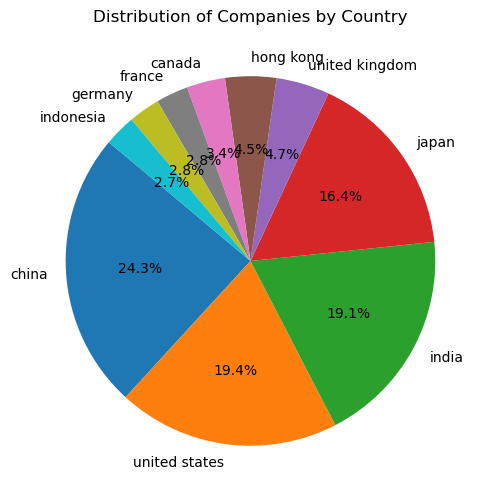

In [41]:
companies_per_country = df_final['country'].value_counts().head(10)  

plt.figure(figsize=(10, 6))

companies_per_country.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Companies by Country')

plt.ylabel('')

plt.show()


## Distribution of industry types within the dataset
- The industry with the highest presence in our dataset is "banks-regional," referring to the inclusion of several regional bank companies from each region that offer their banking services not nationally or internationally but regionally.
- Although there is no marked trend of a specific industry, the "banks-regional" industry does have a significantly high number of records to visually stand out compared to the second-ranked "specialty industrial machinery" ("banks-regional" with an 18.9% appearance within the dataset and "specialty industrial machinery" with a 13.7%), representing a difference of 5.2% between the first and second positions.

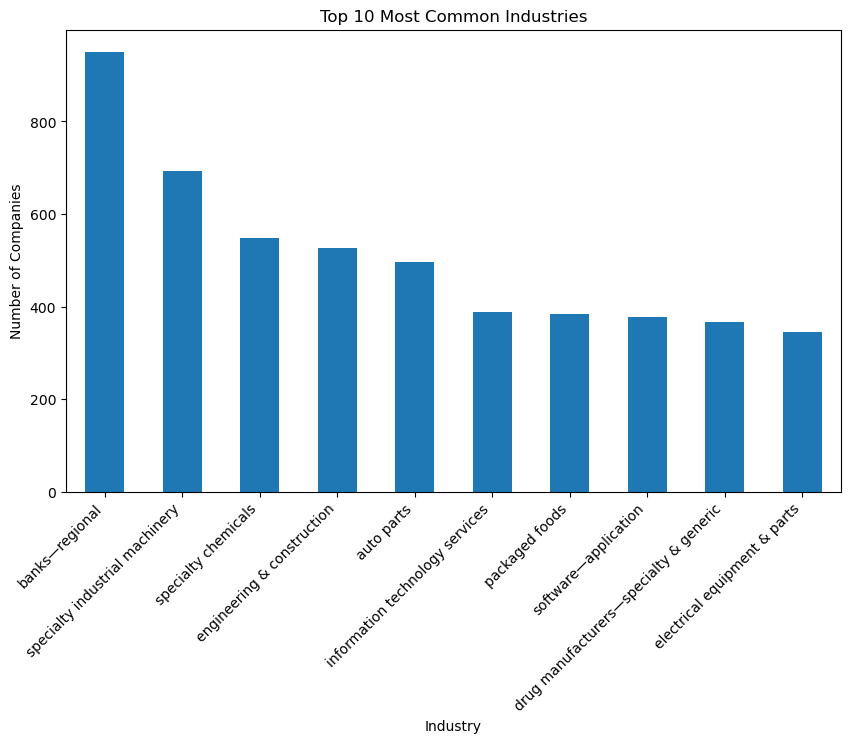

In [40]:
companies_per_industry = df_final['industry'].value_counts().head(10)  # Select only the top 10 most common industries

plt.figure(figsize=(10, 6))

companies_per_industry.plot(kind='bar')

plt.title('Top 10 Most Common Industries')

plt.xlabel('Industry')

plt.ylabel('Number of Companies')

plt.xticks(rotation=45, ha='right')

plt.show()



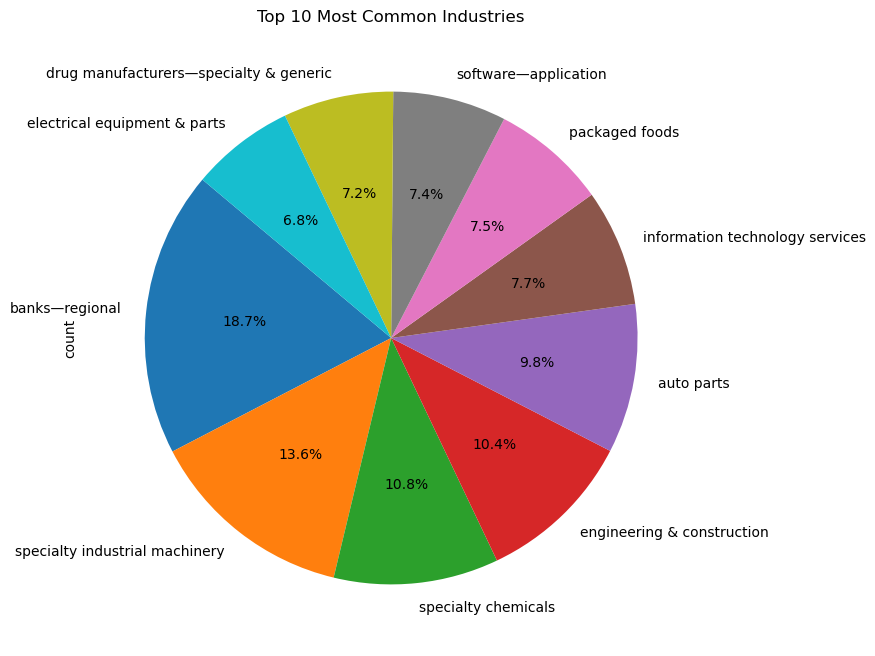

In [38]:
companies_per_industry = df_final['industry'].value_counts().head(10)

plt.figure(figsize=(8, 8))

companies_per_industry.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Top 10 Most Common Industries')

plt.show()




## Industries with less presence within the dataset
- In this graph, we find several industries referring to subcategories within the real estate sector, representing specific sectors within the investment real estate market, each with its particular focus on the type of property and associated business operations.
- The subcategories we are referring to are as follows: "REIT-Office," "REIT-Specialty," "REIT-Healthcare Facilities," and "REIT-HOTEL-MOTEL."

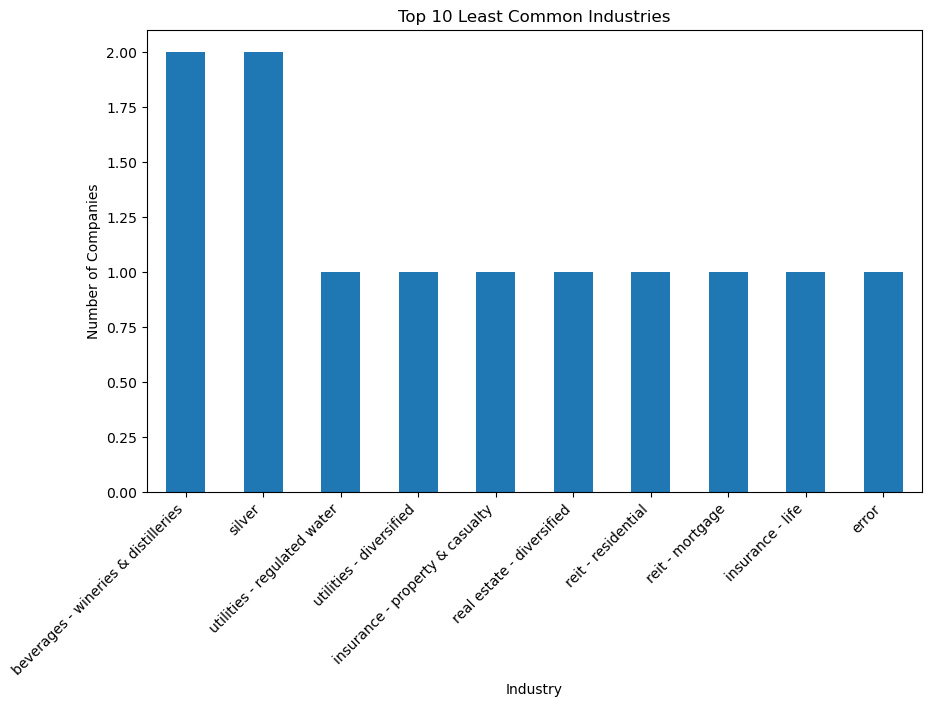

In [37]:
less_common_companies_by_industry = df_final['industry'].value_counts().tail(10)

plt.figure(figsize=(10, 6))

less_common_companies_by_industry.plot(kind='bar')

plt.title('Top 10 Least Common Industries')

plt.xlabel('Industry')

plt.ylabel('Number of Companies')

plt.xticks(rotation=45, ha='right')

plt.show()



## Industries with the highest average profit margin within the dataset
- We see how the "entertainment" industry has the highest profit margin in our dataset, indicating that on average, companies in this industry tend to have higher profit margins compared to other industries in our dataset.
- Thanks to the pie chart displayed in percentages, we can see that 58.3% of the profit margin of all industries in our dataset is captured by only one industry, "entertainment."
- Following the "entertainment" industry, we have the "medical instruments and supplies" industry with 11.6% and the gasoline industry with 7.3%.

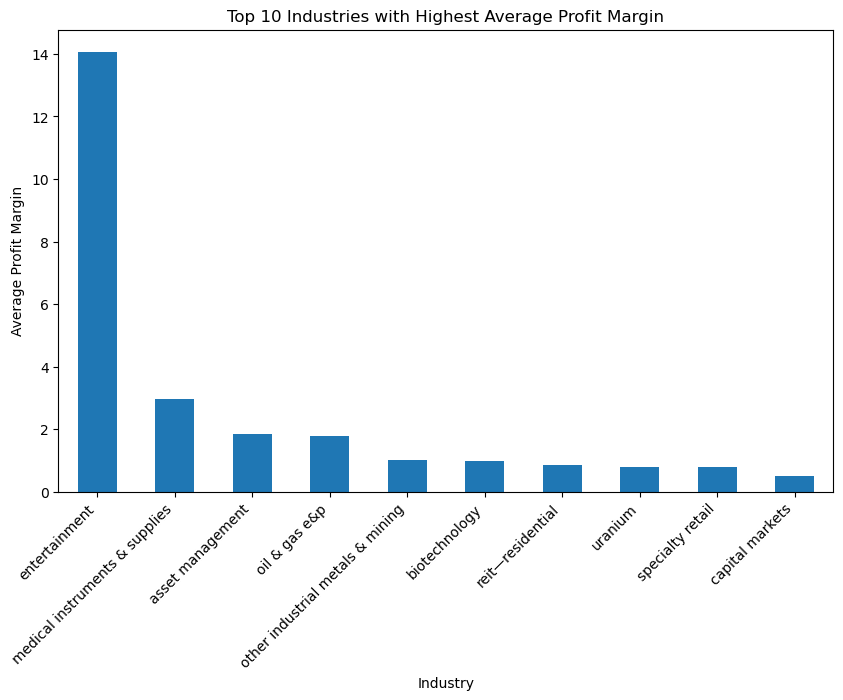

In [36]:
df_final['profit margins'] = pd.to_numeric(df_final['profit margins'], errors='coerce')

average_profit_margin_per_industry = df_final.groupby('industry')['profit margins'].mean().sort_values(ascending=False)

top_industries = average_profit_margin_per_industry.head(10)

plt.figure(figsize=(10, 6))

top_industries.plot(kind='bar')

plt.title('Top 10 Industries with Highest Average Profit Margin')

plt.xlabel('Industry')

plt.ylabel('Average Profit Margin')

plt.xticks(rotation=45, ha='right')

plt.show()



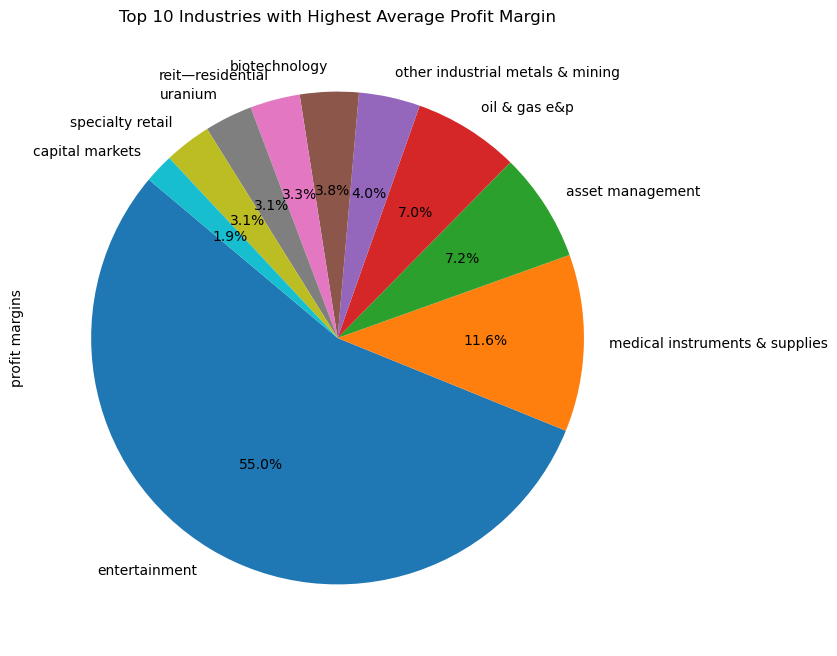

In [35]:
df_final['profit margins'] = pd.to_numeric(df_final['profit margins'], errors='coerce')

average_profit_margin_per_industry = df_final.groupby('industry')['profit margins'].mean().sort_values(ascending=False)

top_industries = average_profit_margin_per_industry.head(10)

plt.figure(figsize=(8, 8))

top_industries.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Top 10 Industries with Highest Average Profit Margin')
plt.show()



## Number of full-time employees by country
- We see how the "United States" takes the top spot as the country with the most full-time employees, with a percentage difference of 13.4% over the second country with the most employees, which is "China."
- It's not surprising to find these countries at the top, as both the "United States" and "China" represent giant economies, each handling a variety of international businesses and commerce.
- We have "Japan" as the third country with the most full-time employees, which aligns with what several news sources and anime depict regarding the long working hours to which the Japanese population is exposed.

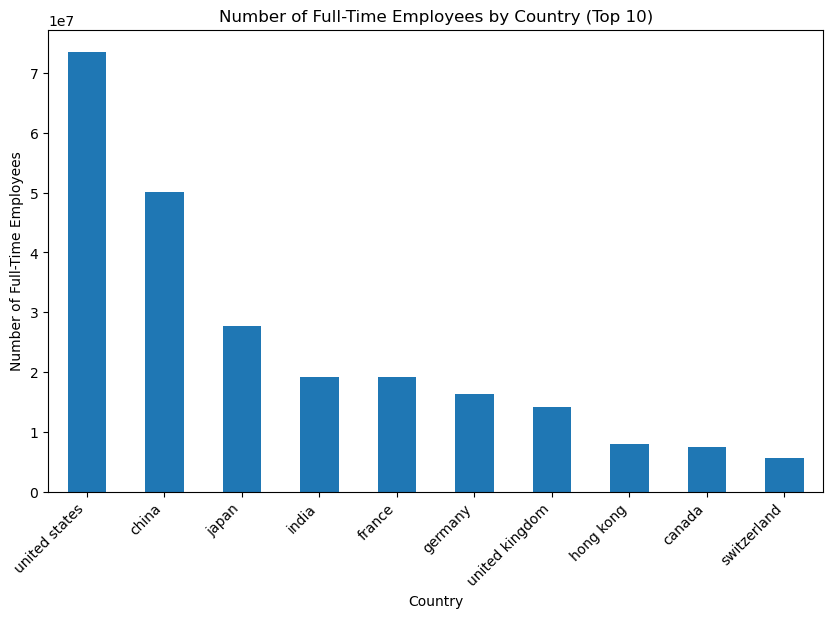

In [34]:
df_final['full time employees'] = pd.to_numeric(df_final['full time employees'], errors='coerce')

employees_per_country = df_final.groupby('country')['full time employees'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

employees_per_country.plot(kind='bar')

plt.title('Number of Full-Time Employees by Country (Top 10)')

plt.xlabel('Country')

plt.ylabel('Number of Full-Time Employees')

plt.xticks(rotation=45, ha='right')
plt.show()



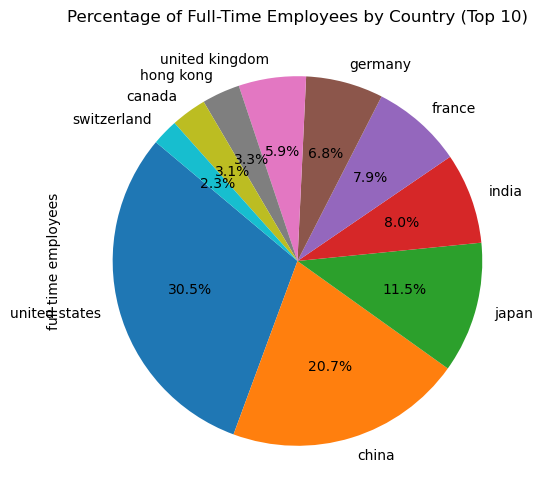

In [33]:
df_final['full time employees'] = pd.to_numeric(df_final['full time employees'], errors='coerce')

employees_per_country = df_final.groupby('country')['full time employees'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

employees_per_country.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Percentage of Full-Time Employees by Country (Top 10)')

plt.show()




## Percentage of full-time employees by industry
- We have industries that we've seen before as the ones with the most records in our dataset, referring to the industries with the most companies in this dataset.
- These industries are "banks-regional" and "specialty industrial machinery."
- It's interesting to note that the industry with the highest percentage of full-time employees per industry is "banks-diversified," likely due to its wide range of services offered to a large number of clients, requiring full-time transactions and operations. This could also explain the presence of the "banks-regional" industry, as the services provided by both are essential for a 24-hour economy and society.





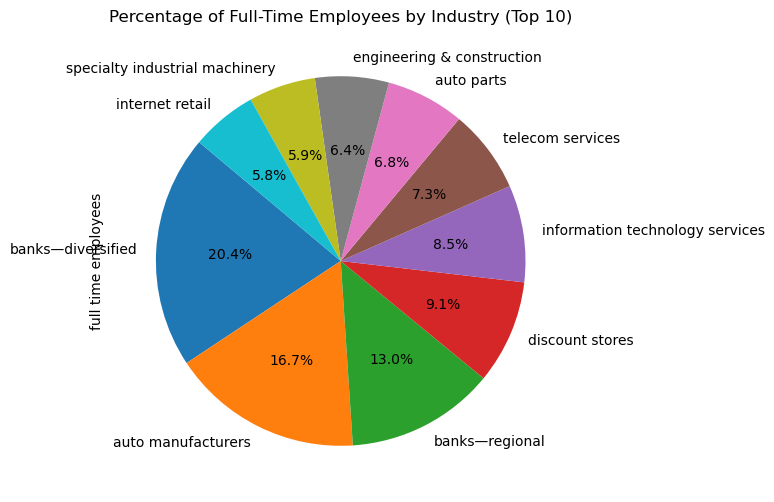

In [32]:
df_final['full time employees'] = pd.to_numeric(df_final['full time employees'], errors='coerce')

employees_per_industry = df_final.groupby('industry')['full time employees'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

employees_per_industry.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Percentage of Full-Time Employees by Industry (Top 10)')

plt.show()



## General overview of the distribution of full-time employees by industry
- This graph provides a more comprehensive view of the distribution of full-time employees by industry.
- From this graph, we can observe that besides banking services, the technology and entertainment sectors also maintain a high volume of employees. This is likely due to the nature of the services they offer, which are essential and widely used in daily life by the population.

C:\Users\fedeg\AppData\Local\Temp\ipykernel_18264\1524486162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_top_30['full time employees'] = pd.to_numeric(data_filtered_top_30['full time employees'], errors='coerce')


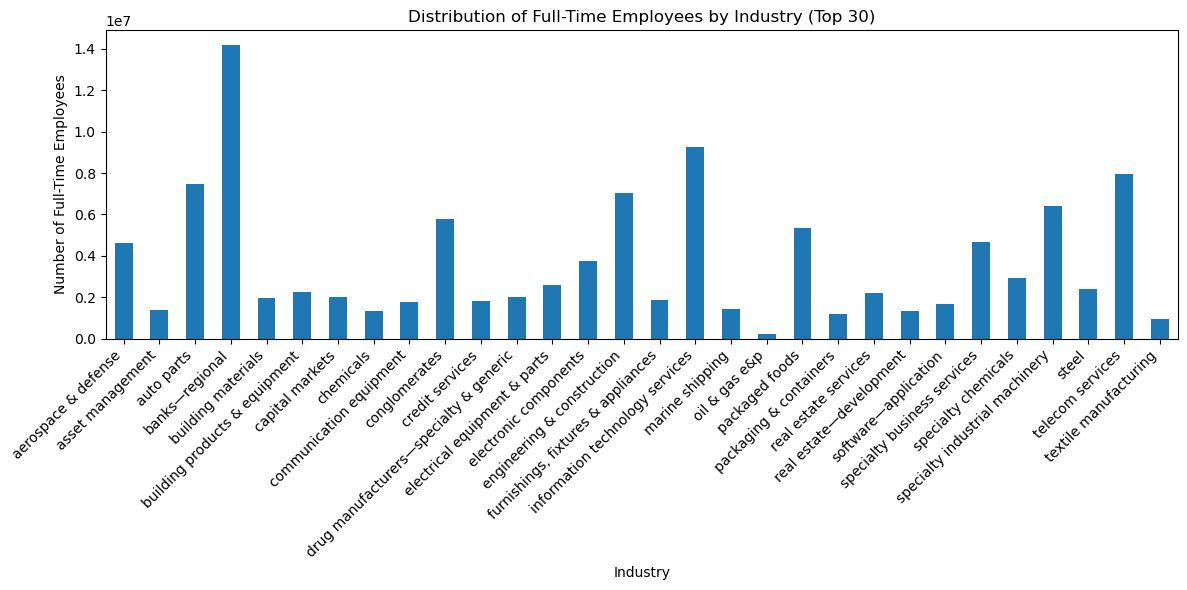

In [30]:
top_30_industries = df_final['industry'].value_counts().head(30).index

data_filtered_top_30 = df_final[df_final['industry'].isin(top_30_industries)]

data_filtered_top_30['full time employees'] = pd.to_numeric(data_filtered_top_30['full time employees'], errors='coerce')

employees_per_industry = data_filtered_top_30.groupby('industry')['full time employees'].sum()

plt.figure(figsize=(12, 6))

employees_per_industry.plot(kind='bar')

plt.title('Distribution of Full-Time Employees by Industry (Top 30)')

plt.xlabel('Industry')

plt.ylabel('Number of Full-Time Employees')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()
